In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pingouin as pg
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np
import os


In [4]:
# Load data
accuracy_df = pd.read_csv("All_partis_accuracy.csv")
confidence_df = pd.read_csv("All_partis_confidence.csv")
decision_rt_df = pd.read_csv("All_partis_decRT.csv")

mratio_df = pd.read_excel(r"All_partis_mratio.xlsx")
dprime_df = pd.read_excel(r"All_partis_dprime.xlsx")
logmratio_df = pd.read_excel(r"All_partis_logMratio.xlsx")
metadprime_df = pd.read_excel(r"All_partis_metad'.xlsx")
dti_df = pd.read_csv(r"mratio - DTI data.csv")


In [5]:
mratio_allemotions = mratio_df[['Name', 'ID', 'All_emotions']]
dprime_allemotions = dprime_df[['Name', 'ID', 'All_emotions']]  
logmratio_allemotions = logmratio_df[['Name', 'ID', 'All_emotions']]
metadprime_allemotions = metadprime_df[['Name', 'ID', 'All_emotions']]
# print head just to see
print(mratio_allemotions.head())



  Name  ID  All_emotions
0  王少刚   1      1.130565
1  王梦宣  10      1.478303
2  姚林林  11      1.785660
3  赵冰冰  12      0.282675
4  李思璇  13      2.368859


In [6]:
mratio_df = mratio_df.drop(columns=['All_emotions'])
dprime_df = dprime_df.drop(columns=['All_emotions'])
logmratio_df = logmratio_df.drop(columns=['All_emotions'])
metadprime_df = metadprime_df.drop(columns=['All_emotions'])

In [7]:
metadprime_df.head()

Name  ID   Disgust     Happy      Fear
0  王少刚   1  0.240886  3.062654  0.750421
1  王梦宣  10  2.693680  4.098778  2.229741
2  姚林林  11  3.332291  4.262904  2.780194
3  赵冰冰  12  2.358013  4.434778  1.766753
4  李思璇  13  2.493037  4.630475  2.281403

In [8]:
# melt mratio_df, dprime_df, logmratio_df, and meta_dprime_df
mratio_df = pd.melt(mratio_df, id_vars=['Name', 'ID'], var_name='Emotion', value_name='MRatio')
dprime_df = pd.melt(dprime_df, id_vars=['Name', 'ID'], var_name='Emotion', value_name='dprime')
logmratio_df = pd.melt(logmratio_df, id_vars=['Name', 'ID'], var_name='Emotion', value_name='logMRatio')
metadprime_df = pd.melt(metadprime_df, id_vars=['Name', 'ID'], var_name='Emotion', value_name='metadprime')
# same with mratio_allemotions, dprime_allemotions, logmratio_allemotions, and metadprime_allemotions
mratio_allemotions = pd.melt(mratio_allemotions, id_vars=['Name', 'ID'], var_name='Emotion', value_name='MRatio')
dprime_allemotions = pd.melt(dprime_allemotions, id_vars=['Name', 'ID'], var_name='Emotion', value_name='dprime')   
logmratio_allemotions = pd.melt(logmratio_allemotions, id_vars=['Name', 'ID'], var_name='Emotion', value_name='logMRatio')
metadprime_allemotions = pd.melt(metadprime_allemotions, id_vars=['Name', 'ID'], var_name='Emotion', value_name='metadprime')


In [9]:
mratio_df.head()
dprime_df.head()
accuracy_df.head()
decision_rt_df.head()

Name  ID  Emotion  Decision_RT
0  王少刚   1  Disgust     1.274849
1  王少刚   1     Fear     1.334447
2  王少刚   1    Happy     0.870779
3   王辉   3  Disgust     1.770416
4   王辉   3     Fear     1.501141

In [10]:
# let's merge all the dataframes on name, id, and emotion

behavioral_df = pd.merge(accuracy_df, decision_rt_df, on=['Name', 'ID', 'Emotion'])
behavioral_df = pd.merge(behavioral_df, confidence_df, on=['Name', 'ID', 'Emotion'])
behavioral_df = pd.merge(behavioral_df, mratio_df, on=['Name', 'ID', 'Emotion'])
behavioral_df = pd.merge(behavioral_df, dprime_df, on=['Name', 'ID', 'Emotion'])
behavioral_df = pd.merge(behavioral_df, logmratio_df, on=['Name', 'ID', 'Emotion'])
behavioral_df = pd.merge(behavioral_df, metadprime_df, on=['Name', 'ID', 'Emotion'])

behavioral_df.head()

Name  ID  Emotion  Accuracy  Decision_RT  Confidence    MRatio    dprime  \
0  王少刚   1  Disgust  0.617021     1.274849    3.170213  0.370712  0.666007   
1  王少刚   1     Fear  0.500000     1.334447    3.104167  2.468977  0.303940   
2  王少刚   1    Happy  0.812500     0.870779    3.625000  2.245553  1.363875   
3   王辉   3  Disgust  0.812500     1.770416    3.354167  1.827291  1.622655   
4   王辉   3     Fear  0.577778     1.501141    3.422222  0.995792  1.624436   

   logMRatio  metadprime  
0  -0.430963    0.240886  
1   0.392517    0.750421  
2   0.351323    3.062654  
3   0.261808    2.965064  
4  -0.001831    1.617600

In [11]:
id_to_gender = {
    1: 'Male', 10: 'Female', 11: 'Female', 12: 'Female', 13: 'Female', 
    14: 'Male', 17: 'Male', 18: 'Female', 19: 'Female', 20: 'Male',
    21: 'Male', 22: 'Male', 23: 'Female', 24: 'Female', 25: 'Female',
    27: 'Male', 28: 'Male', 3: 'Male', 31: 'Female', 32: 'Male',
    34: 'Female', 36: 'Male', 39: 'Female', 4: 'Female', 5: 'Female',
    6: 'Male', 7: 'Male', 8: 'Female', 9: 'Female'
}

In [12]:
# add a column for gender 

behavioral_df['Gender'] = behavioral_df['ID'].map(id_to_gender)
behavioral_df.head()

Name  ID  Emotion  Accuracy  Decision_RT  Confidence    MRatio    dprime  \
0  王少刚   1  Disgust  0.617021     1.274849    3.170213  0.370712  0.666007   
1  王少刚   1     Fear  0.500000     1.334447    3.104167  2.468977  0.303940   
2  王少刚   1    Happy  0.812500     0.870779    3.625000  2.245553  1.363875   
3   王辉   3  Disgust  0.812500     1.770416    3.354167  1.827291  1.622655   
4   王辉   3     Fear  0.577778     1.501141    3.422222  0.995792  1.624436   

   logMRatio  metadprime Gender  
0  -0.430963    0.240886   Male  
1   0.392517    0.750421   Male  
2   0.351323    3.062654   Male  
3   0.261808    2.965064   Male  
4  -0.001831    1.617600   Male

In [13]:
# Set academic-style theme
sns.set_theme(style="whitegrid", context="paper", font_scale=1.5)  # 'paper' context optimizes for print

# Ensure high-quality plots
plt.rcParams['figure.dpi'] = 300  # Set resolution to 300 DPI for publication
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.linewidth'] = 1.2  # Thicker axes
plt.rcParams['legend.frameon'] = False  # Remove legend border
plt.rcParams['font.family'] = "Times New Roman"  # Academic journal font

In [14]:
#Define the behavioral measures
measures = ['Accuracy', 'Confidence', 'Decision_RT', 'MRatio', 'dprime', 'metadprime', 'logMRatio']


In [15]:
path_paper_results = r"SW_Graphs"
if not os.path.exists(path_paper_results):
    os.makedirs(path_paper_results)

# Uncomment when we are ready

C:\Users\Nabiya\AppData\Local\Temp\ipykernel_8636\1868012491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Emotion", y=measure, data=behavioral_df,


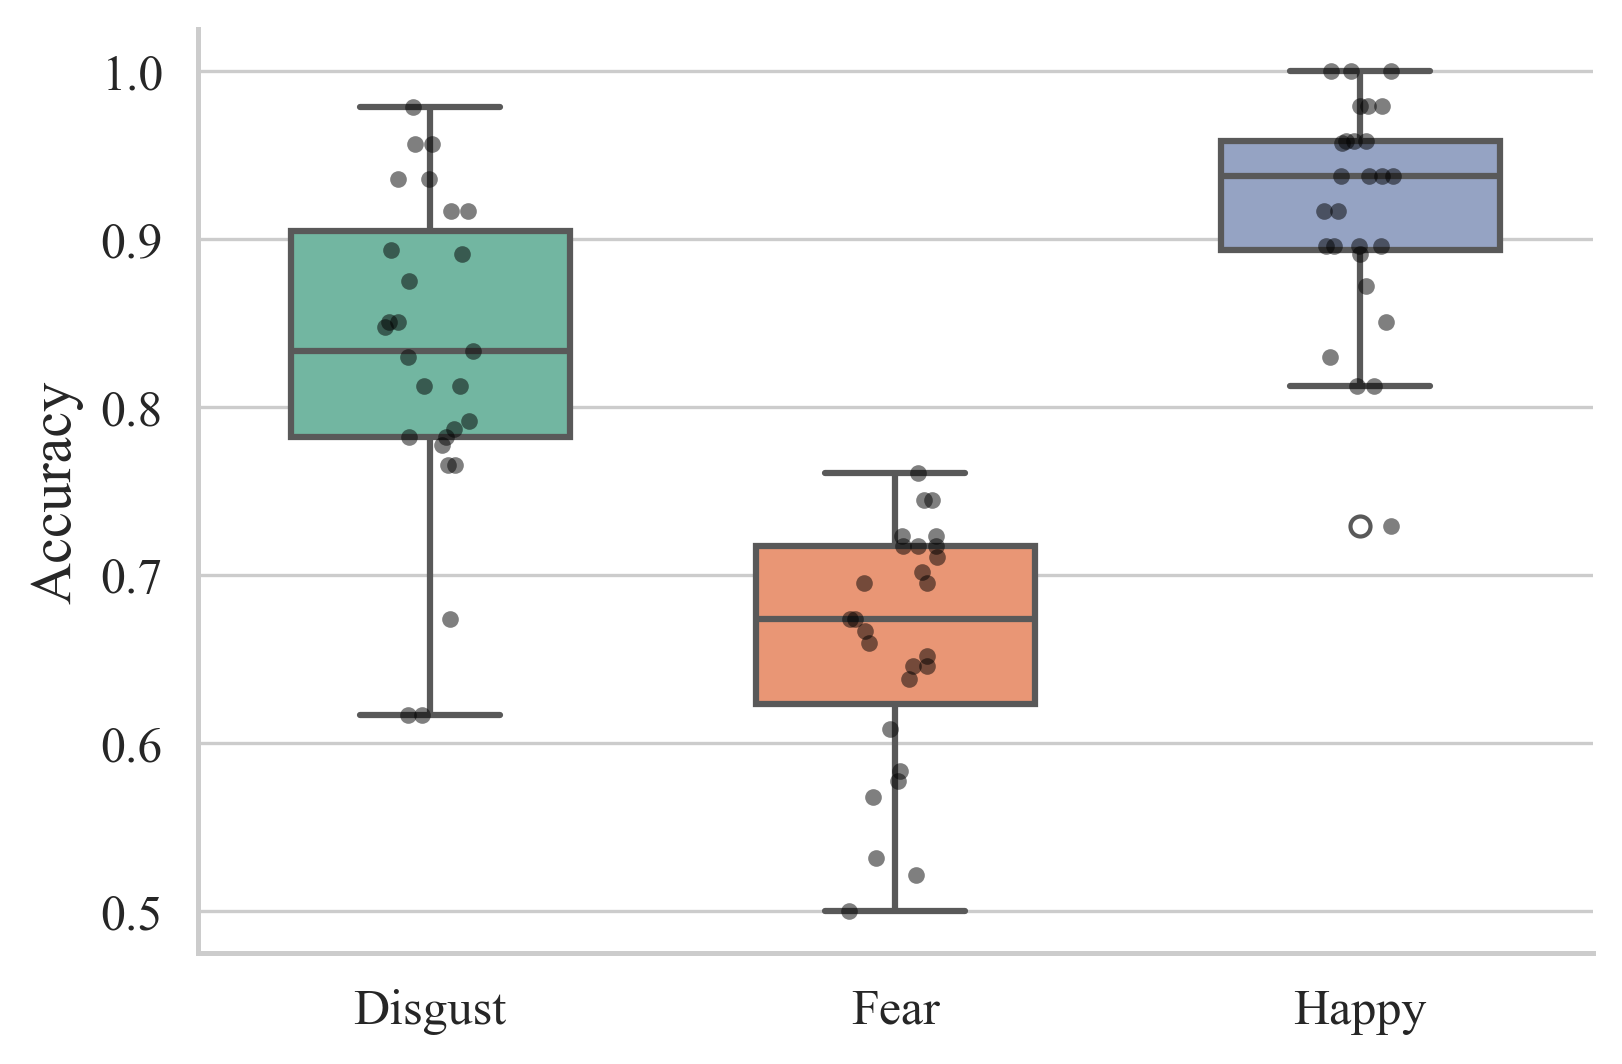

C:\Users\Nabiya\AppData\Local\Temp\ipykernel_8636\1868012491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Emotion", y=measure, data=behavioral_df,


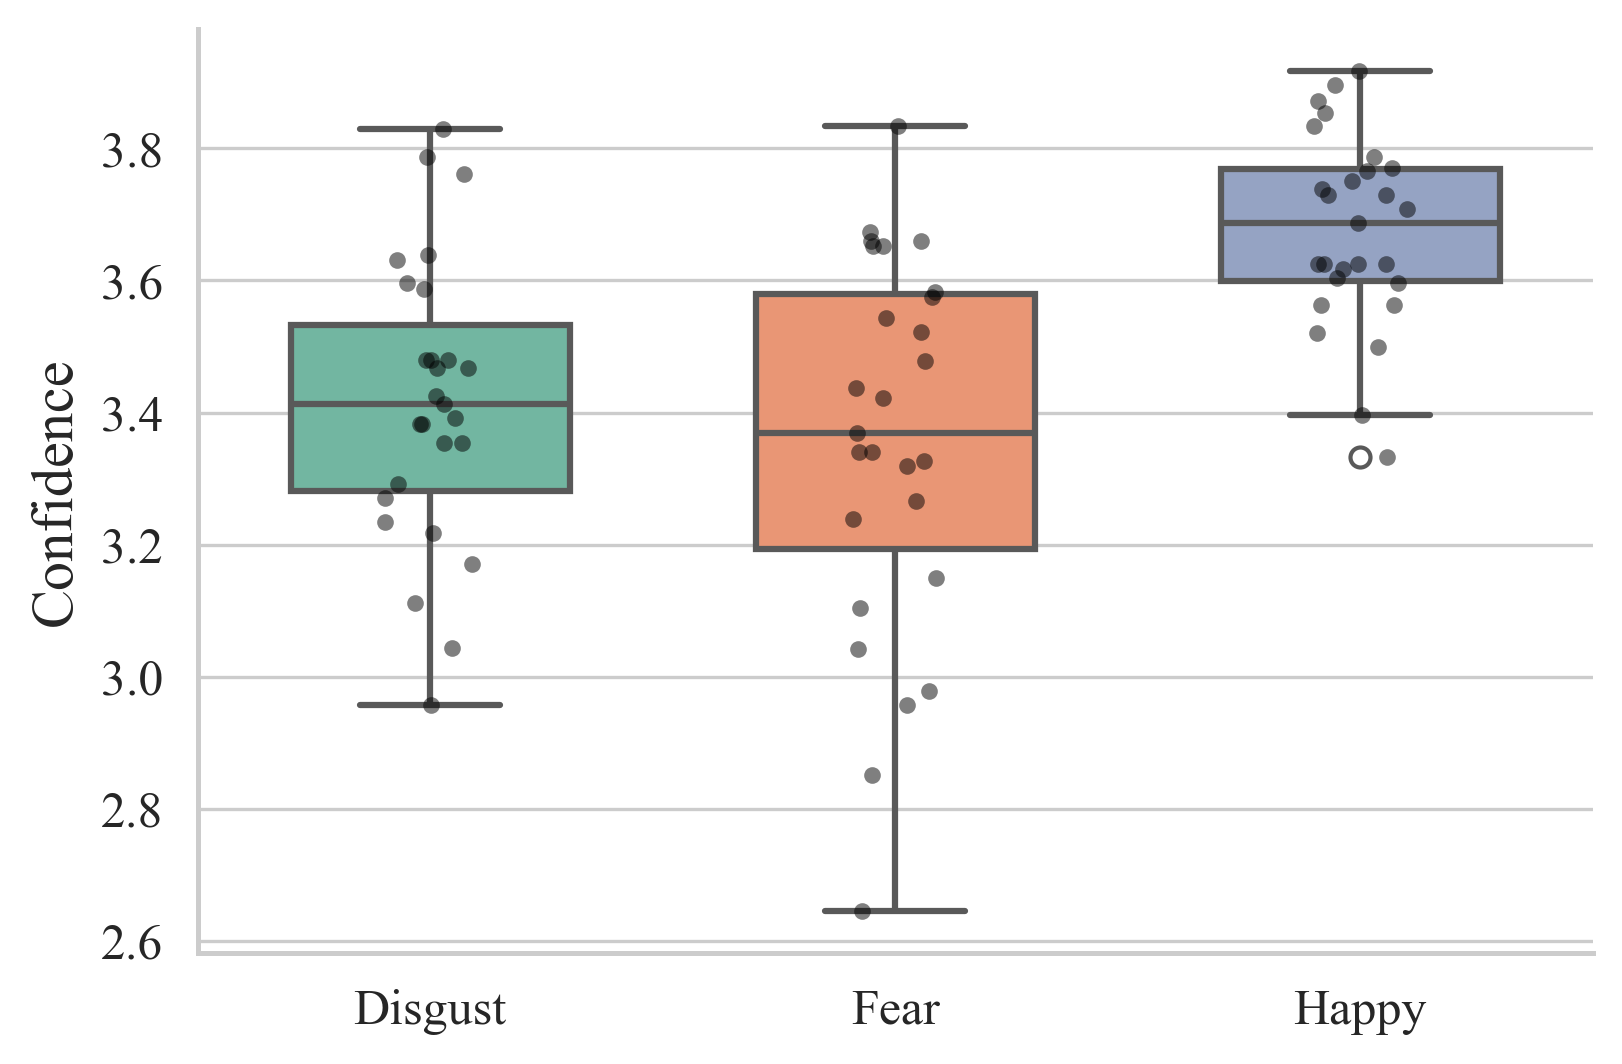

C:\Users\Nabiya\AppData\Local\Temp\ipykernel_8636\1868012491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Emotion", y=measure, data=behavioral_df,


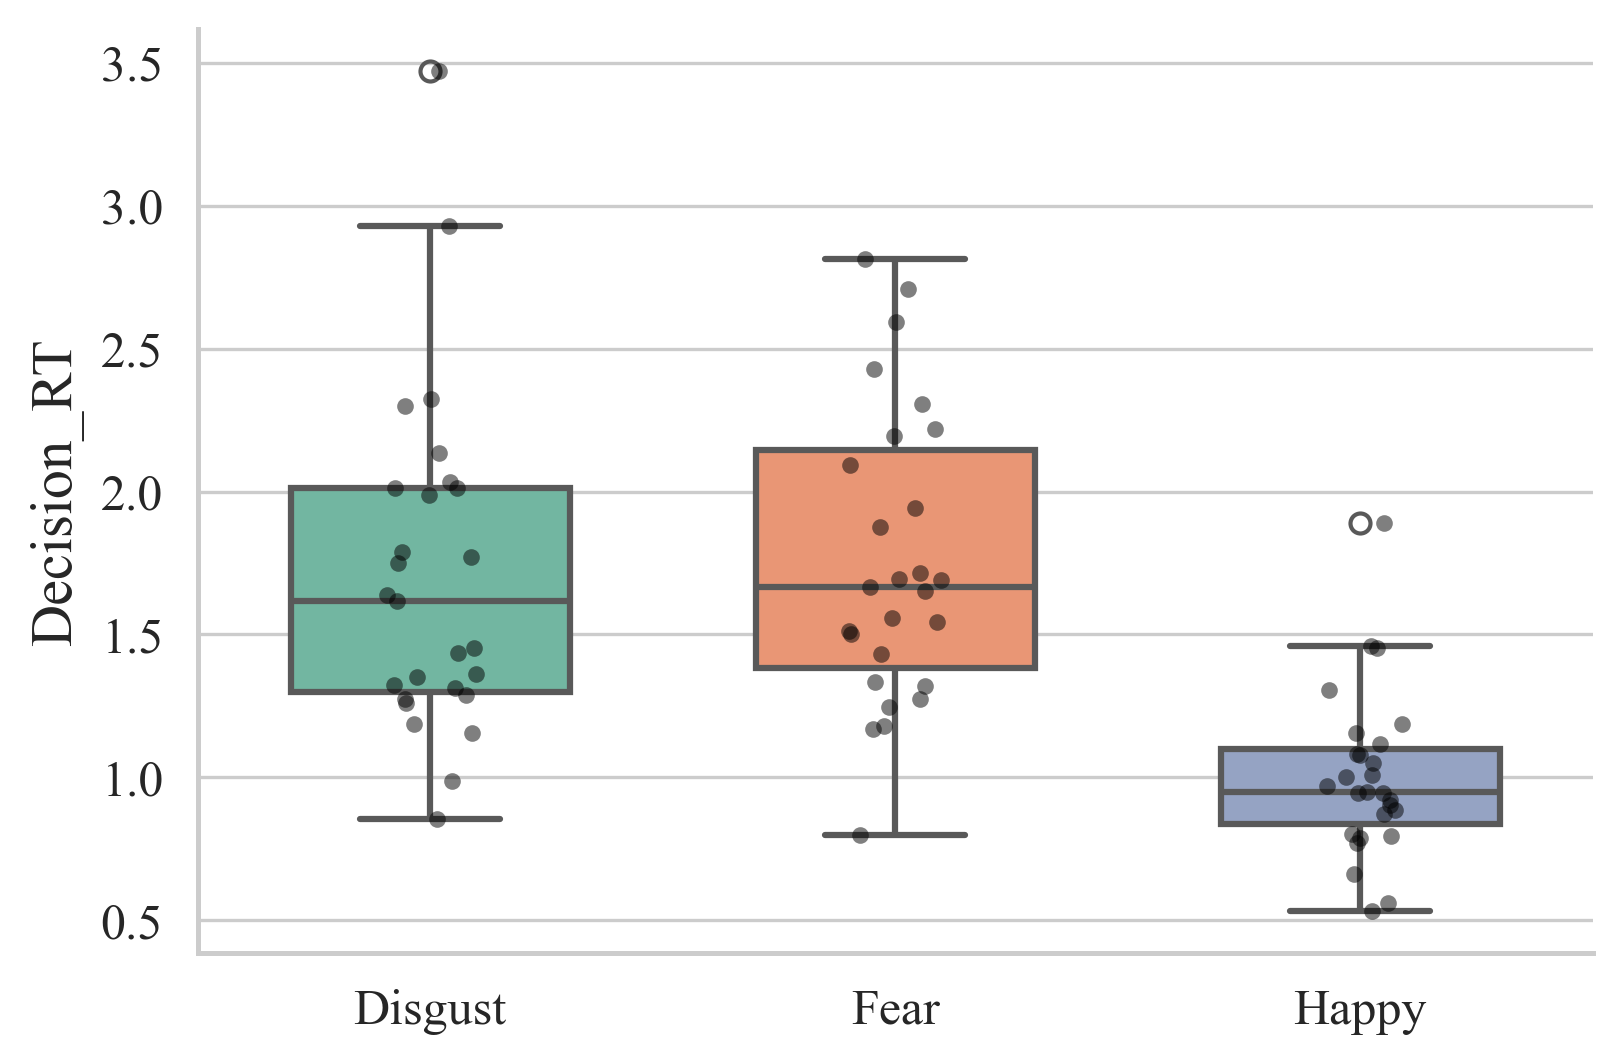

C:\Users\Nabiya\AppData\Local\Temp\ipykernel_8636\1868012491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Emotion", y=measure, data=behavioral_df,


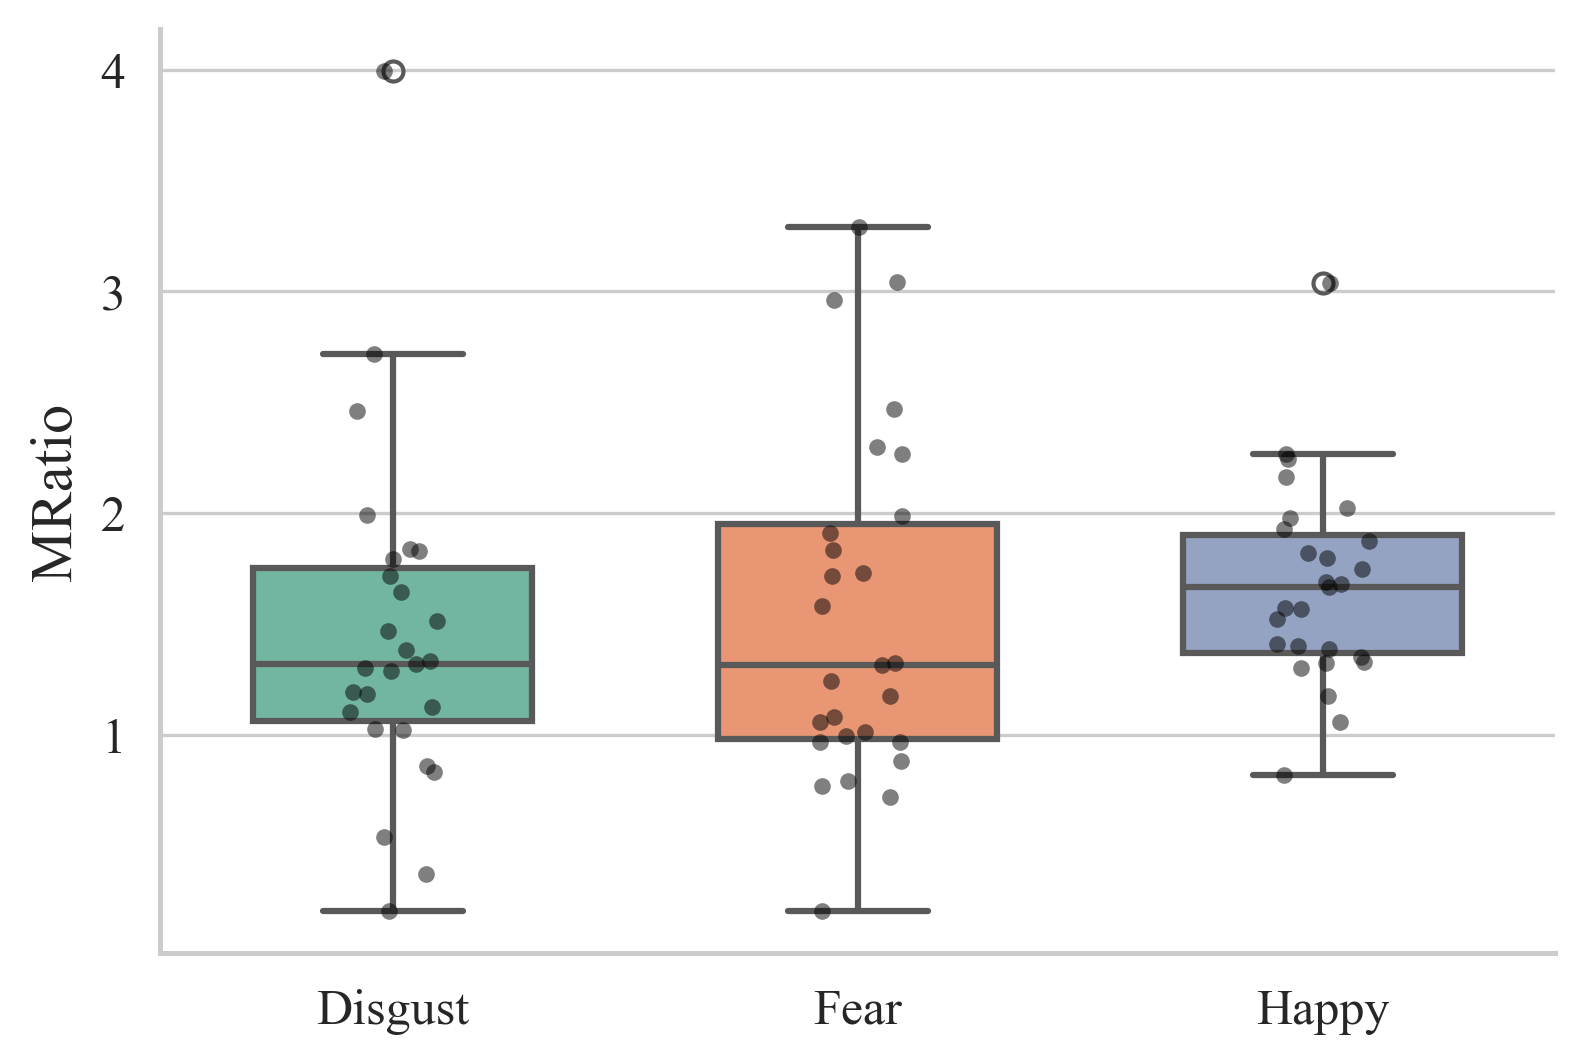

C:\Users\Nabiya\AppData\Local\Temp\ipykernel_8636\1868012491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Emotion", y=measure, data=behavioral_df,


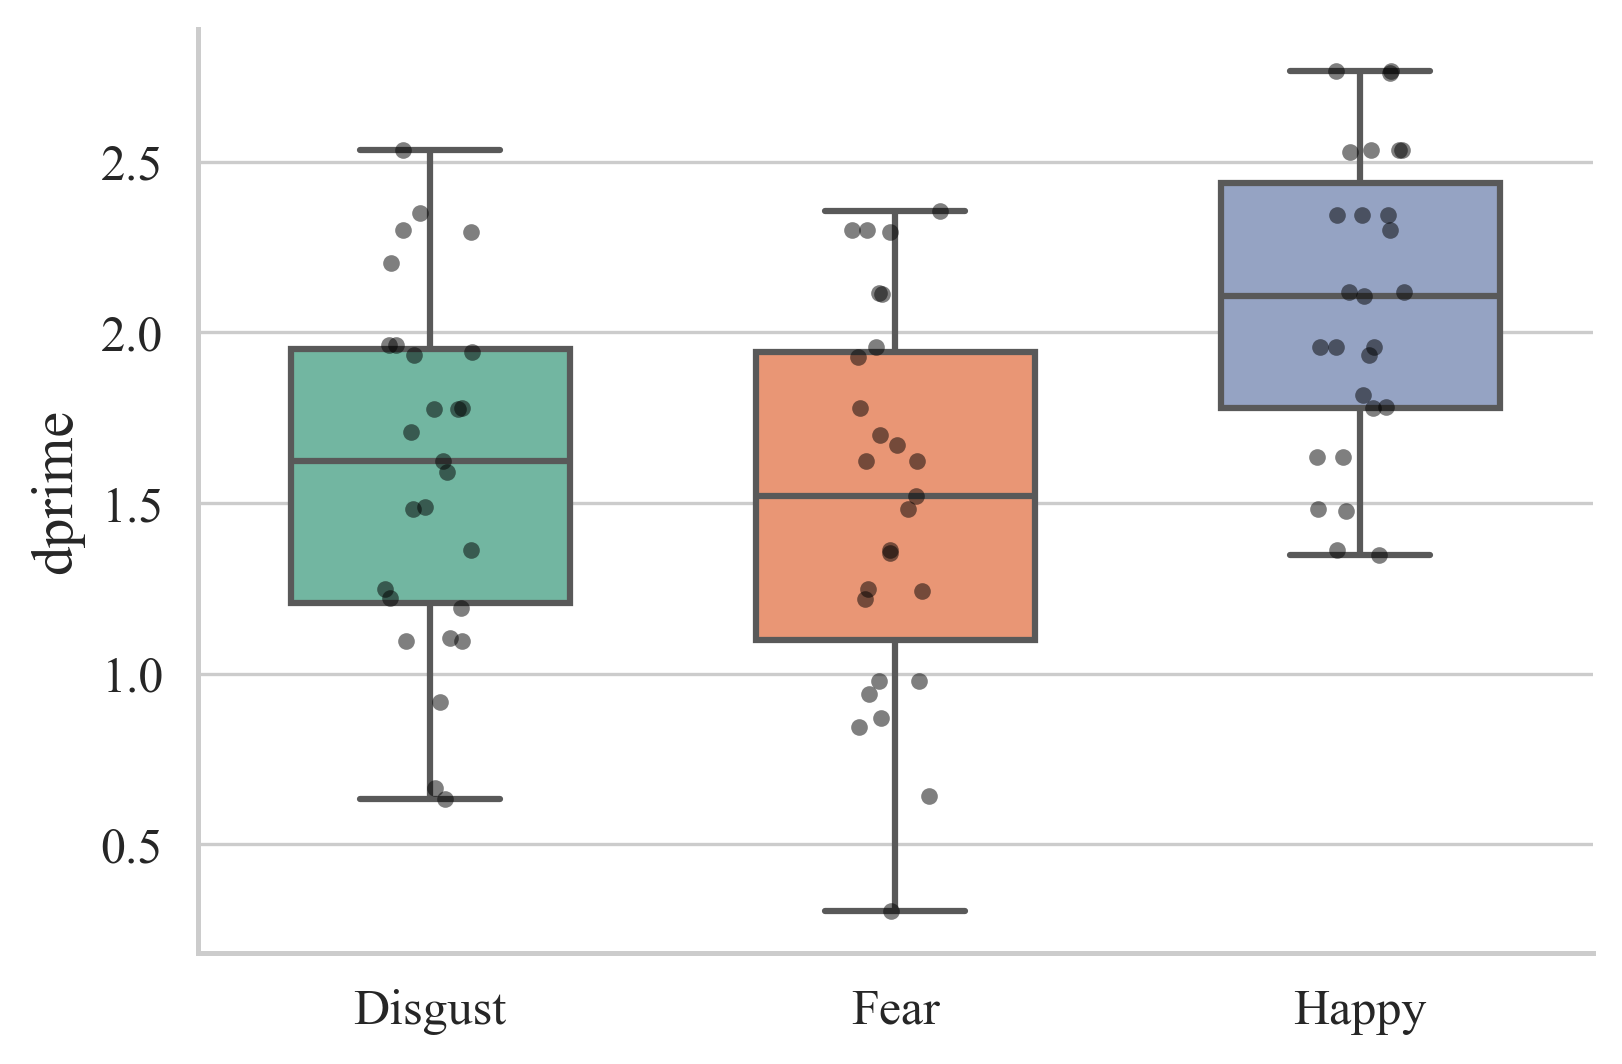

C:\Users\Nabiya\AppData\Local\Temp\ipykernel_8636\1868012491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Emotion", y=measure, data=behavioral_df,


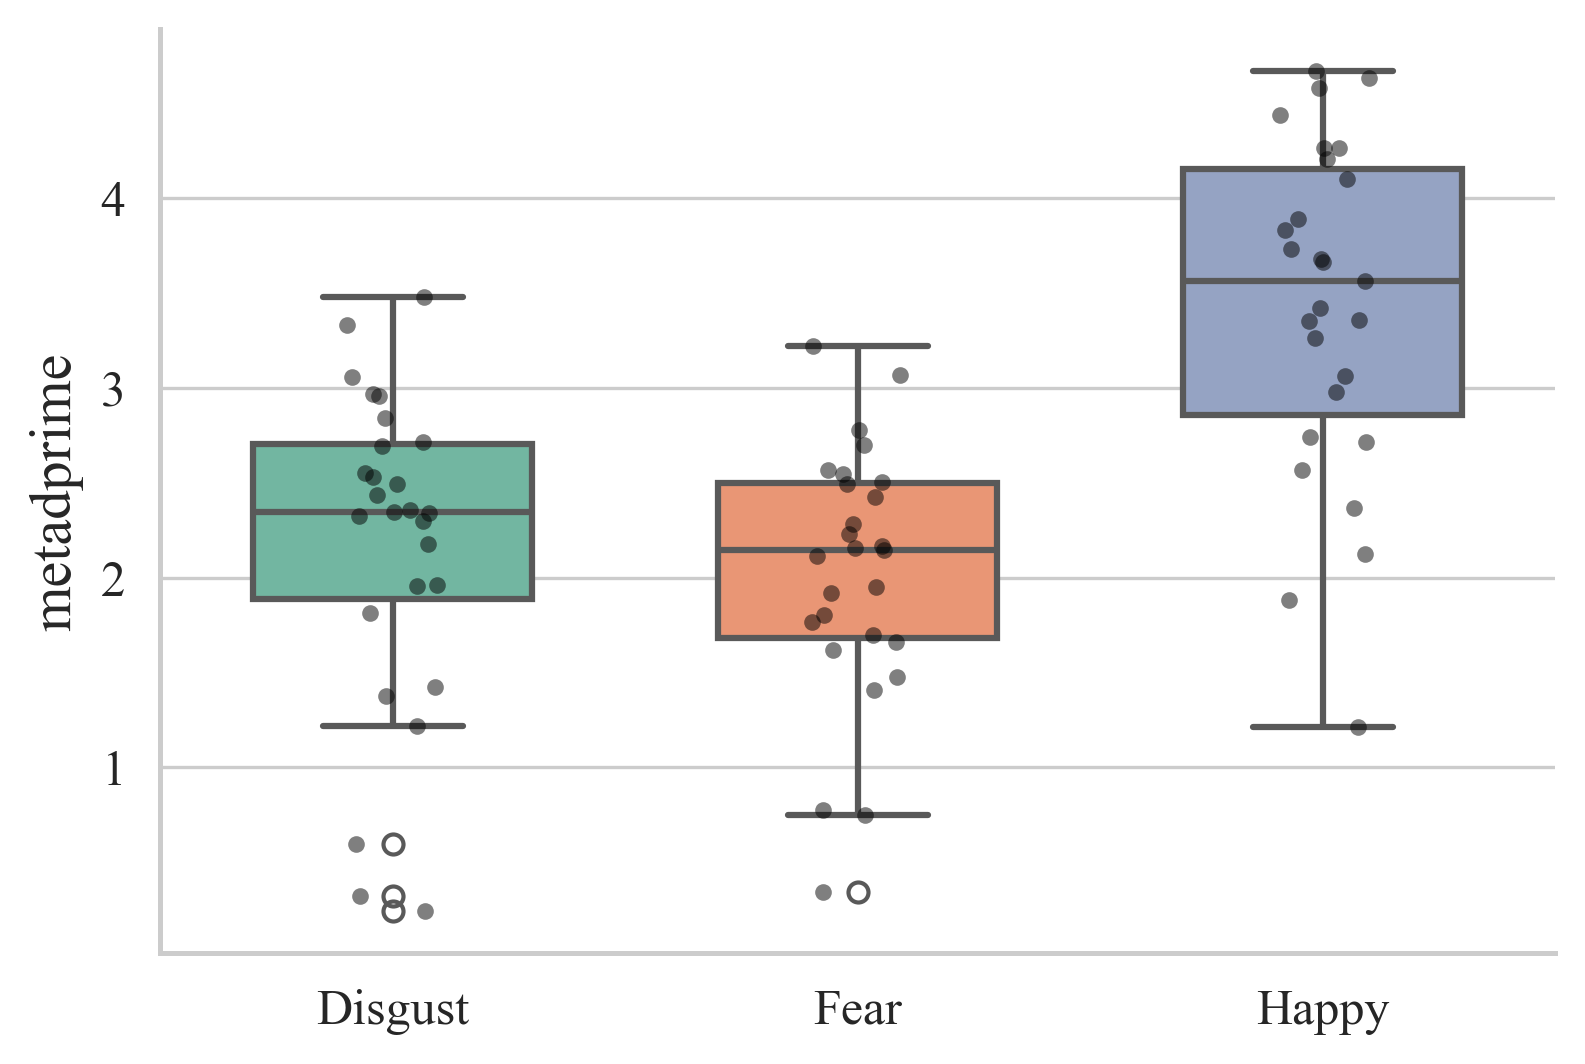

C:\Users\Nabiya\AppData\Local\Temp\ipykernel_8636\1868012491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Emotion", y=measure, data=behavioral_df,


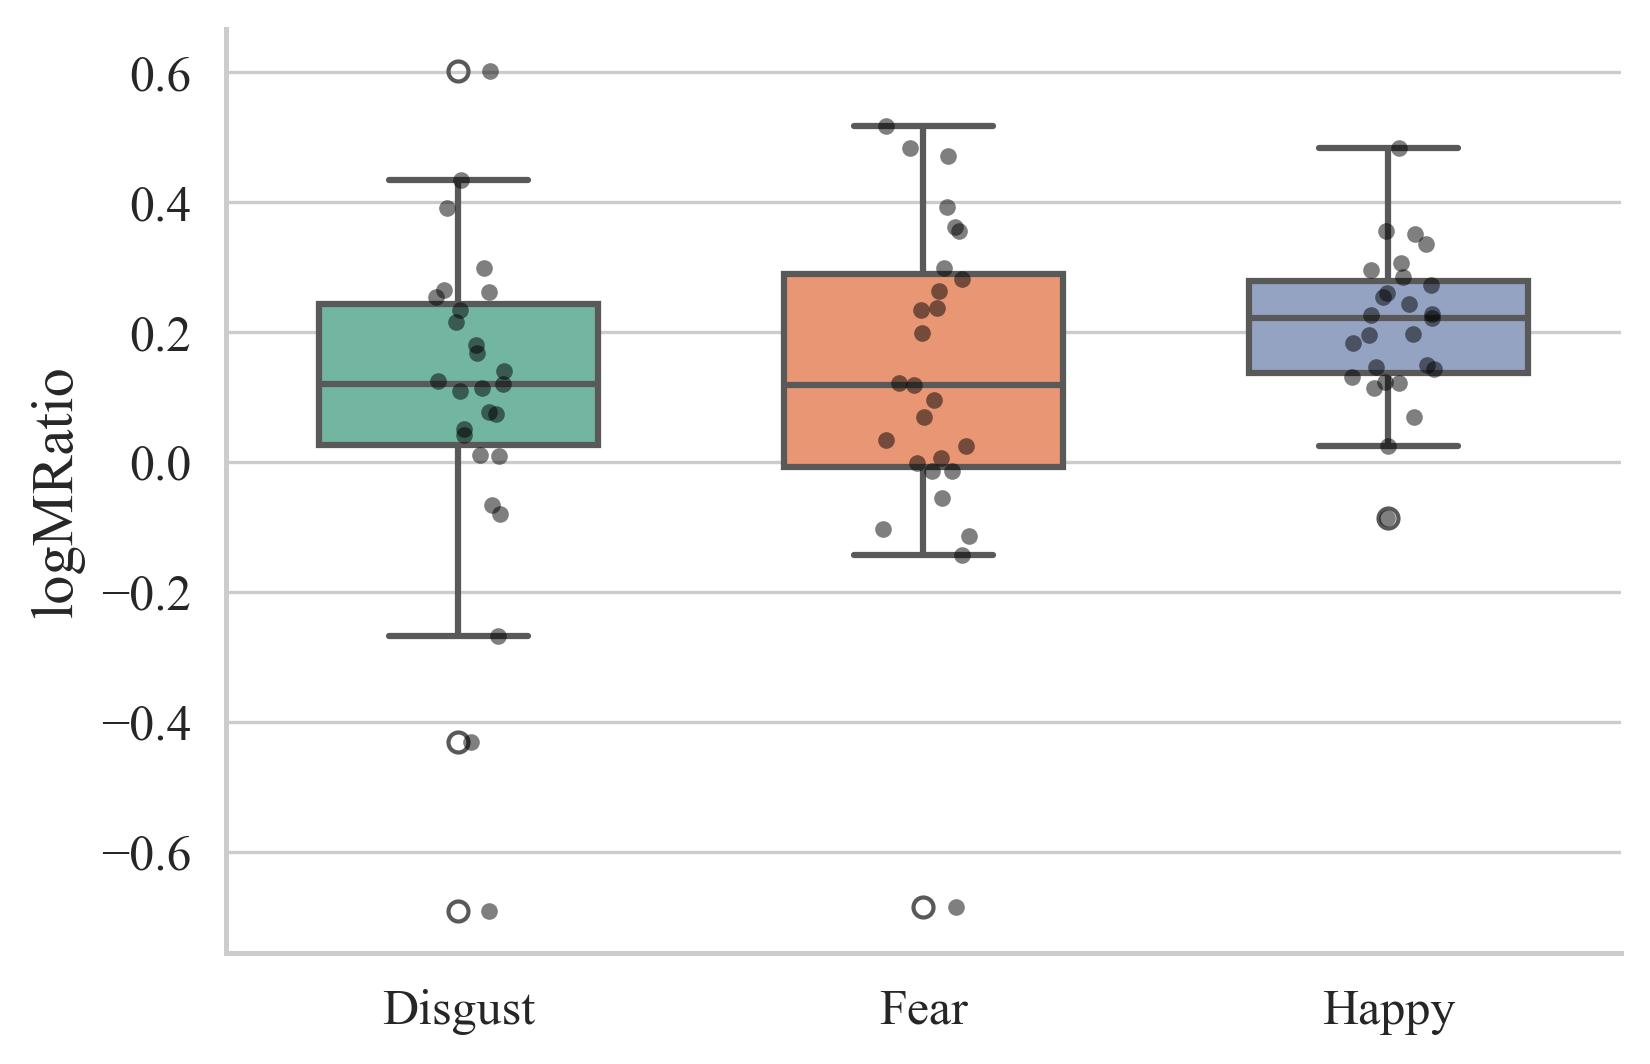

In [16]:
for measure in measures:
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x="Emotion", y=measure, data=behavioral_df, 
                     palette="Set2", width=0.6, linewidth=1.5)

    # Overlay individual points
    sns.stripplot(x="Emotion", y=measure, data=behavioral_df, 
                  color='black', alpha=0.5, jitter=True, size=4)

    # Labels & formatting
    plt.title(f"{measure} by Emotion", fontsize=16)
    plt.xlabel("", fontsize=14)
    plt.ylabel(measure, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()

    # Save high-quality figure
    plt.savefig(os.path.join(path_paper_results, f"{measure}_by_emotion.png"), dpi=300, format="tiff", bbox_inches="tight")
    plt.show()

# Heuing For Gender

In [17]:
# for measure in measures:
#     plt.figure(figsize=(6, 4))
#     ax = sns.boxplot(x="Emotion", y=measure, hue="Gender", data=behavioral_df, 
#                      palette="Set2", width=0.6, linewidth=1.5)

#     # Overlay individual points (no duplicate legend)
#     sns.stripplot(x="Emotion", y=measure, hue="Gender", data=behavioral_df, 
#                   dodge=True, jitter=True, color='black', alpha=0.5, size=4, legend=False)

#     # Labels & formatting
#     plt.xlabel("Emotion Condition", fontsize=14)
#     plt.ylabel(measure, fontsize=14)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)

#     # 🔥 FIXED LEGEND: Remove duplicates
#     handles, labels = ax.get_legend_handles_labels()
#     new_labels = list(dict.fromkeys(labels))  # Remove duplicates
#     ax.legend(handles[:len(new_labels)], new_labels, title="Gender", bbox_to_anchor=(1, 1))

#     sns.despine()
#     # Save high-quality figure
#     plt.savefig(os.path.join(path_paper_results, f"{measure}_emotion_gender_annotated_fixed.tiff"), dpi=300, format="tiff", bbox_inches="tight")
#     plt.show()

# Statisticss

In [ ]:
import os
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define measures to analyze
measures = ['Accuracy', 'Decision_RT', 'Confidence', 'MRatio', 'dprime', 'logMRatio', 'metadprime']

anova_results = {}  # Store ANOVA results
tukey_results = {}  # Store post-hoc results

results_path = os.path.join(path_paper_results, "stats_results")
if not os.path.exists(results_path):
    os.makedirs(results_path)

# 🔥 Mixed-Design ANOVA (Emotion = within-subject, Gender = between-subject)
for measure in measures:
    
    # Mixed-Design ANOVA
    model = ols(f"{measure} ~ C(Emotion) * C(Gender) + C(ID)", data=behavioral_df).fit()
    res = sm.stats.anova_lm(model, typ=2)

    anova_results[measure] = res

    # Save results to file
    with open(os.path.join(results_path, f'{measure}_anova_results.txt'), 'w') as f:
        #f.write(f"ANOVA Results for {measure}\n\n")
        #f.write(str(res))
        print(f"ANOVA Results for {measure}:\n\n{res}")

        # Extract p-values
        p_emotion = res.loc["C(Emotion)", "PR(>F)"]
        p_gender = res.loc["C(Gender)", "PR(>F)"]
        p_interaction = res.loc["C(Emotion):C(Gender)", "PR(>F)"]

        # Run Tukey tests if Emotion or Interaction significant
        if p_emotion < 0.05 or p_interaction < 0.05:
            tukey = pairwise_tukeyhsd(endog=behavioral_df[measure], groups=behavioral_df["Emotion"], alpha=0.05)
            tukey_results[measure] = tukey

            #f.write("\n\nTukey Results for Emotion:\n\n")
            #f.write(str(tukey))
            print(f"Tukey Results for {measure}:\n\n{tukey}")
        else:
            print('sldfjlsdkjf')
            #f.write("\n\nNo significant Emotion effect found.")

        # Report if Gender effect significant
        if p_gender < 0.05:
            print('sdsfdsfsfsdffsdf')
            #f.write("\n\nGender effect was significant! Consider reporting this result.")


ANOVA Results for Accuracy:

                        sum_sq    df          F        PR(>F)
C(Emotion)            0.925185   2.0  89.346265  3.111362e-17
C(Gender)             0.041660   1.0   8.046333  6.567430e-03
C(ID)                 2.413323  26.0  17.927506  2.595461e-17
C(Emotion):C(Gender)  0.006978   2.0   0.673836  5.143175e-01
Residual              0.258876  50.0        NaN           NaN
Tukey Results for Accuracy:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
Disgust   Fear  -0.1724    0.0 -0.2238 -0.1211   True
Disgust  Happy   0.0844 0.0005   0.033  0.1357   True
   Fear  Happy   0.2568    0.0  0.2054  0.3082   True
-----------------------------------------------------
ANOVA Results for Decision_RT:

                         sum_sq    df          F        PR(>F)
C(Emotion)             9.565668   2.0  63.007258  2.165399e-14
C(Gender)              0.069226   

# No Gender 

In [19]:
import os
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define measures to analyze
measures = ['Accuracy', 'Decision_RT', 'Confidence', 'MRatio', 'dprime', 'logMRatio', 'metadprime']

# Store results
anova_results = {}  
tukey_results = {}  

# Define path to save results
results_path = os.path.join(path_paper_results, "stats_results")
if not os.path.exists(results_path):
    os.makedirs(results_path)

# 🔥 Repeated-Measures ANOVA (Emotion = within-subject factor)
for measure in measures:
    
    # Ensure Emotion is categorical
    behavioral_df["Emotion"] = behavioral_df["Emotion"].astype("category")

    # Repeated-Measures ANOVA (within-subject factor: Emotion)
    aovrm = AnovaRM(behavioral_df, depvar=measure, subject='ID', within=['Emotion']).fit()
    
    # Store the ANOVA results
    anova_results[measure] = aovrm

    # Save and print results
    with open(os.path.join(results_path, f'{measure}_anova_results.txt'), 'w') as f:
        f.write(f"ANOVA Results for {measure}\n\n")
        f.write(str(aovrm))
        print(f"ANOVA Results for {measure}:\n\n{aovrm}")

        # Extract p-value for Emotion effect
        p_emotion = aovrm.anova_table["Pr > F"]["Emotion"]

        # If Emotion effect is significant, perform Tukey post-hoc tests
        if p_emotion < 0.05:
            tukey = pairwise_tukeyhsd(endog=behavioral_df[measure], groups=behavioral_df["Emotion"], alpha=0.05)
            tukey_results[measure] = tukey

            f.write("\n\nTukey Results for Emotion:\n\n")
            f.write(str(tukey))
            print(f"Tukey Results for {measure}:\n\n{tukey}")
        else:
            f.write("\n\nNo significant Emotion effect found.")


ANOVA Results for Accuracy:

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
Emotion 90.4813 2.0000 52.0000 0.0000

Tukey Results for Accuracy:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
Disgust   Fear  -0.1724    0.0 -0.2238 -0.1211   True
Disgust  Happy   0.0844 0.0005   0.033  0.1357   True
   Fear  Happy   0.2568    0.0  0.2054  0.3082   True
-----------------------------------------------------
ANOVA Results for Decision_RT:

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
Emotion 62.1044 2.0000 52.0000 0.0000

Tukey Results for Decision_RT:

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
Disgust   Fear   0.0534 0.912 -0.2585  0.3654  False
Disgust  Happy

# Correlation with DTI Data

In [20]:
tracts = [column for column in dti_df.columns if ('Cingulum' in column or 'IFO' in column or 'SLF' in column or 'UF' in column or 'Genu' in column)]
tractdict = {
    'IFO': ['FA_IFO_L', 'FA_IFO_R', 'MD_IFO_L', 'MD_IFO_R', 'AD_IFO_L', 'AD_IFO_R', 'RD_IFO_L', 'RD_IFO_R'],
    'SLF': ['FA_SLF_L', 'FA_SLF_R', 'MD_SLF_L', 'MD_SLF_R', 'AD_SLF_L', 'AD_SLF_R', 'RD_SLF_L', 'RD_SLF_R'],
    'UF': ['FA_UF_L', 'FA_UF_R', 'MD_UF_L', 'MD_UF_R', 'AD_UF_L', 'AD_UF_R', 'RD_UF_L', 'RD_UF_R'],
    'Cingulum': ['FA_Cingulum_L', 'FA_Cingulum_R', 'MD_Cingulum_L', 'MD_Cingulum_R', 'AD_Cingulum_L', 'AD_Cingulum_R', 'RD_Cingulum_L', 'RD_Cingulum_R'],
    'Cingulum (hippocampus)': ['FA_Cingulum (hippocampus)_L', 'FA_Cingulum (hippocampus)_R', 'MD_Cingulum (hippocampus)_L', 'MD_Cingulum (hippocampus)_R', 'AD_Cingulum (hippocampus)_L', 'AD_Cingulum (hippocampus)_R', 'RD_Cingulum (hippocampus)_L', 'RD_Cingulum (hippocampus)_R']

}

# here is the logic, we iterate over each tract and for each tract, we iterate over the FA and MD columns.
# then we perform a pearson correlation between the logmratio (for each emotion) and the FA/MD values for each tract.
# in the occasion of a significant correlation, we plot the scatter plot with a line of best fit, reporting both the correlation coefficient and the p-value.
# we will do this for each emotion.




In [21]:
import plotly.express as px
import plotly.graph_objects as go

In [22]:
# Rename domain-general measures to avoid confusion
mratio_allemotions.rename(columns={'MRatio': 'MRatio_all'}, inplace=True)
logmratio_allemotions.rename(columns={'logMRatio': 'logMRatio_all'}, inplace=True)
dprime_allemotions.rename(columns={'dprime': 'dprime_all'}, inplace=True)
metadprime_allemotions.rename(columns={'metadprime': 'metadprime_all'}, inplace=True)


In [37]:

# Define metacognitive measure DataFrames (domain-specific and domain-general)
metacog_dfs = {
    'MRatio': mratio_df,
    'logMRatio': logmratio_df,
    'dprime': dprime_df,
    'metadprime': metadprime_df,
    'MRatio_allemotions': mratio_allemotions,
    'logMRatio_allemotions': logmratio_allemotions,
    'dprime_allemotions': dprime_allemotions,
    'metadprime_allemotions': metadprime_allemotions
}

# Define DTI tracts and their metrics
tractdict = {
    'IFO': ['FA_IFO_L', 'FA_IFO_R', 'MD_IFO_L', 'MD_IFO_R', 'AD_IFO_L', 'AD_IFO_R', 'RD_IFO_L', 'RD_IFO_R'],
    'SLF': ['FA_SLF_L', 'FA_SLF_R', 'MD_SLF_L', 'MD_SLF_R', 'AD_SLF_L', 'AD_SLF_R', 'RD_SLF_L', 'RD_SLF_R'],
    'UF': ['FA_UF_L', 'FA_UF_R', 'MD_UF_L', 'MD_UF_R', 'AD_UF_L', 'AD_UF_R', 'RD_UF_L', 'RD_UF_R'],
    'Cingulum': ['FA_Cingulum_L', 'FA_Cingulum_R', 'MD_Cingulum_L', 'MD_Cingulum_R', 'AD_Cingulum_L', 'AD_Cingulum_R', 'RD_Cingulum_L', 'RD_Cingulum_R'],
    'Cingulum_Hippocampus': ['FA_Cingulum (hippocampus)_L', 'FA_Cingulum (hippocampus)_R', 'MD_Cingulum (hippocampus)_L', 'MD_Cingulum (hippocampus)_R', 'AD_Cingulum (hippocampus)_L', 'AD_Cingulum (hippocampus)_R', 'RD_Cingulum (hippocampus)_L', 'RD_Cingulum (hippocampus)_R']
}

# Store correlation results
results = []

# Iterate through each metacognitive measure DataFrame
for measure_name, meta_df in metacog_dfs.items():
    merged_df = pd.merge(meta_df, dti_df, on='ID')
    
    # If the measure is emotion-specific, iterate over each emotion separately
    if 'allemotions' in measure_name:
        col_name = f"{measure_name.replace('_allemotions', '')}_all"
        emotions = ['All_emotions']  # Single analysis for domain-general measures
    else:
        col_name = measure_name  # Use the default name for domain-specific measures
        emotions = merged_df['Emotion'].unique()
    
    for emotion in emotions:
        emotion_df = merged_df if emotion == 'All_emotions' else merged_df[merged_df['Emotion'] == emotion]
        
        if col_name not in emotion_df.columns:
            print(f"⚠️ Warning: {col_name} not found in emotion_df! Available columns: {emotion_df.columns}")
            continue  # Skip this correlation if the column doesn't exist
        
        for tract, cols in tractdict.items():
            for col in cols:
                r, p = stats.pearsonr(emotion_df[col_name], emotion_df[col])
                
                results.append({
                    'Measure': measure_name,
                    'Emotion': emotion,
                    'DTI Metric': col,
                    'Tract': tract,
                    'Correlation Coefficient': r,
                    'p-value': p
                })
                
                # Print descriptive significant results
                if p < 0.05:
                    print(f"\n🚀 Significant Correlation Found!\n")
                    print(f"- Emotion: {emotion}")
                    print(f"- Metacognitive Measure: {measure_name}")
                    print(f"- White Matter Tract: {tract}")
                    print(f"- DTI Metric: {col}")
                    print(f"- Correlation Coefficient (r): {r:.3f}")
                    print(f"- p-value: {p:.5f}\n")



🚀 Significant Correlation Found!

- Emotion: Disgust
- Metacognitive Measure: MRatio
- White Matter Tract: UF
- DTI Metric: AD_UF_L
- Correlation Coefficient (r): -0.400
- p-value: 0.03178


🚀 Significant Correlation Found!

- Emotion: Happy
- Metacognitive Measure: MRatio
- White Matter Tract: SLF
- DTI Metric: FA_SLF_L
- Correlation Coefficient (r): 0.373
- p-value: 0.04639


🚀 Significant Correlation Found!

- Emotion: Happy
- Metacognitive Measure: MRatio
- White Matter Tract: SLF
- DTI Metric: FA_SLF_R
- Correlation Coefficient (r): 0.372
- p-value: 0.04663


🚀 Significant Correlation Found!

- Emotion: Happy
- Metacognitive Measure: MRatio
- White Matter Tract: Cingulum
- DTI Metric: FA_Cingulum_L
- Correlation Coefficient (r): 0.372
- p-value: 0.04684


🚀 Significant Correlation Found!

- Emotion: Disgust
- Metacognitive Measure: logMRatio
- White Matter Tract: UF
- DTI Metric: AD_UF_L
- Correlation Coefficient (r): -0.422
- p-value: 0.02276


🚀 Significant Correlation Found!



In [29]:
results_df = pd.DataFrame(results)
results_df.head(20)
results_df.to_csv('allcorrelatins.csv', index=False)

In [27]:
sig_results = results_df[results_df['p-value'] < 0.05]
sig_results.head(20)

Measure       Emotion                   DTI Metric  \
20               MRatio       Disgust                      AD_UF_L   
48               MRatio         Happy                     FA_SLF_L   
49               MRatio         Happy                     FA_SLF_R   
64               MRatio         Happy                FA_Cingulum_L   
140           logMRatio       Disgust                      AD_UF_L   
147           logMRatio       Disgust                MD_Cingulum_R   
184           logMRatio         Happy                FA_Cingulum_L   
185           logMRatio         Happy                FA_Cingulum_R   
190           logMRatio         Happy                RD_Cingulum_L   
191           logMRatio         Happy                RD_Cingulum_R   
248              dprime       Disgust                     FA_SLF_L   
249              dprime       Disgust                     FA_SLF_R   
254              dprime       Disgust                     RD_SLF_L   
255              dprime       Disgust                     RD_SLF_R   
312              dprime         Happy  FA_Cingulum (hippocampus)_L   
318              dprime         Happy  RD_Cingulum (hippocampus)_L   
424          metadprime         Happy                FA_Cingulum_L   
425          metadprime         Happy                FA_Cingulum_R   
431          metadprime         Happy                RD_Cingulum_R   
501  MRatio_allemotions  All_emotions                      AD_UF_R   

                    Tract  Correlation Coefficient   p-value  
20                     UF                -0.399530  0.031775  
48                    SLF                 0.372823  0.046385  
49                    SLF                 0.372437  0.046630  
64               Cingulum                 0.372107  0.046840  
140                    UF                -0.421524  0.022761  
147              Cingulum                -0.386240  0.038493  
184              Cingulum                 0.424526  0.021712  
185              Cingulum                 0.378817  0.042714  
190              Cingulum                -0.392464  0.035218  
191              Cingulum                -0.388208  0.037432  
248                   SLF                -0.480222  0.008376  
249                   SLF                -0.596889  0.000631  
254                   SLF                 0.416850  0.024476  
255                   SLF                 0.420711  0.023052  
312  Cingulum_Hippocampus                -0.434255  0.018582  
318  Cingulum_Hippocampus                 0.440048  0.016902  
424              Cingulum                 0.384502  0.039451  
425              Cingulum                 0.401868  0.030698  
431              Cingulum                -0.382049  0.040833  
501                    UF                -0.372901  0.046336

In [28]:
sig_results.to_csv(os.path.join(path_paper_results, "significant_correlations.csv"), index=False)

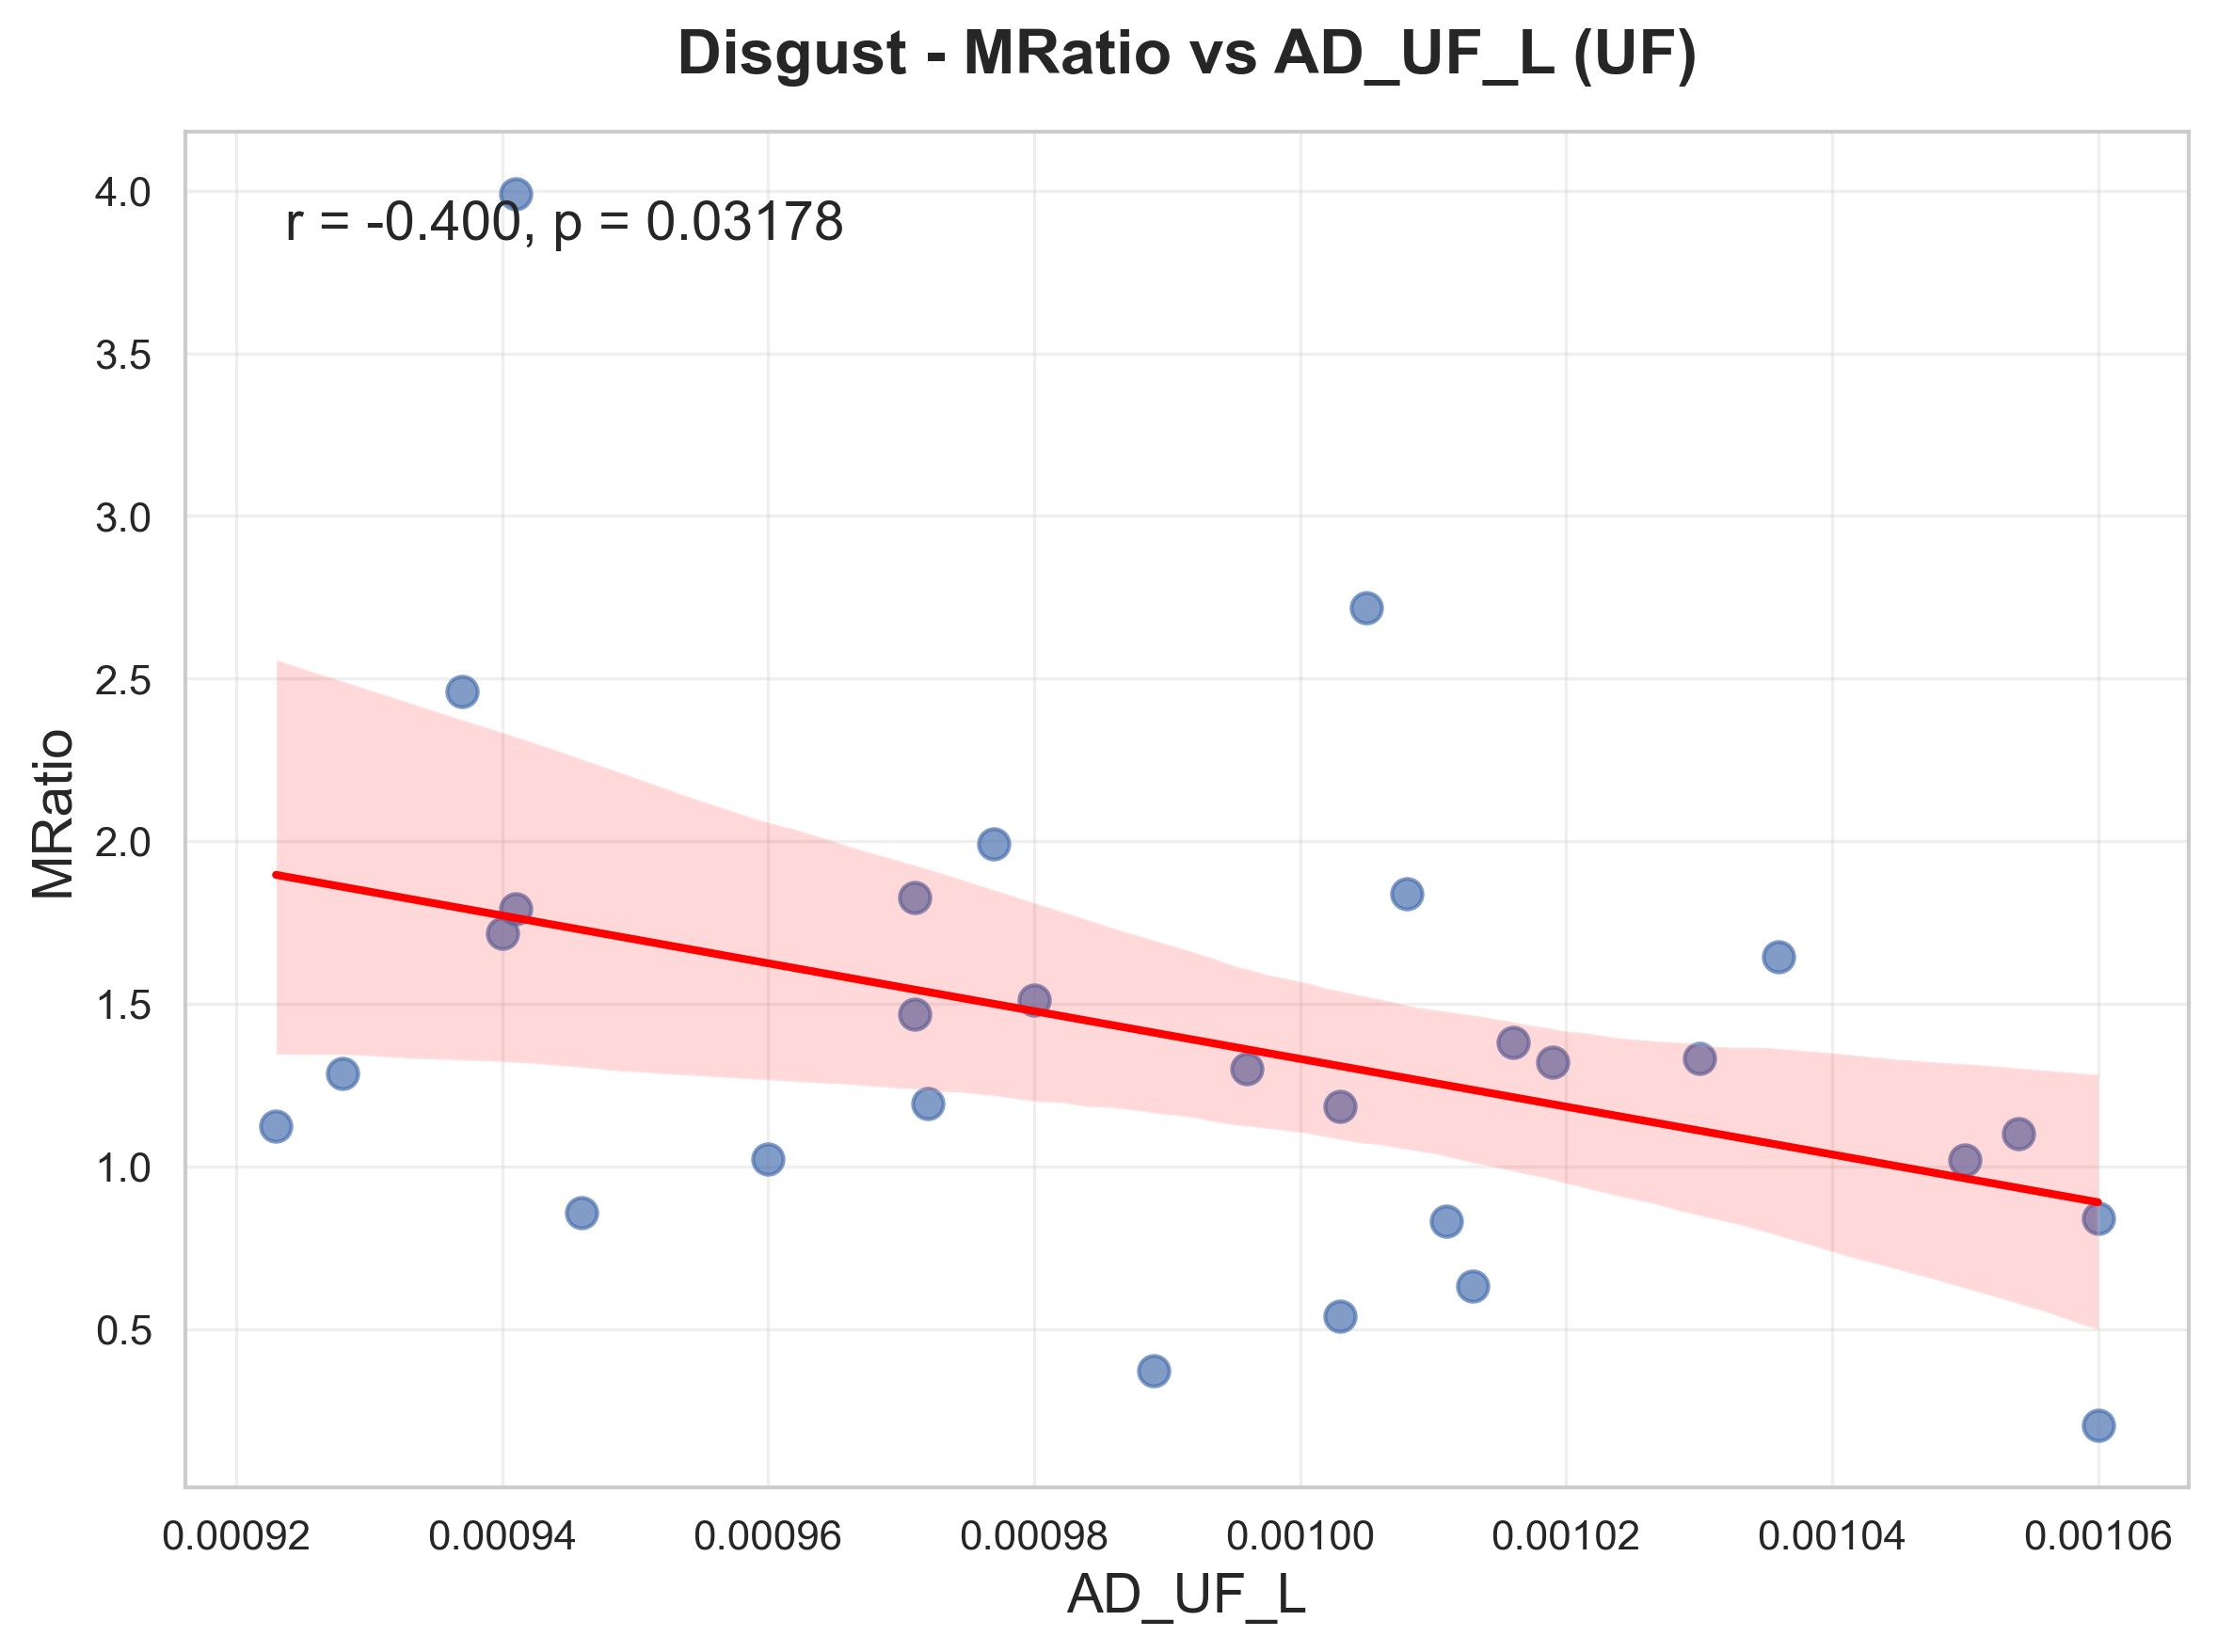

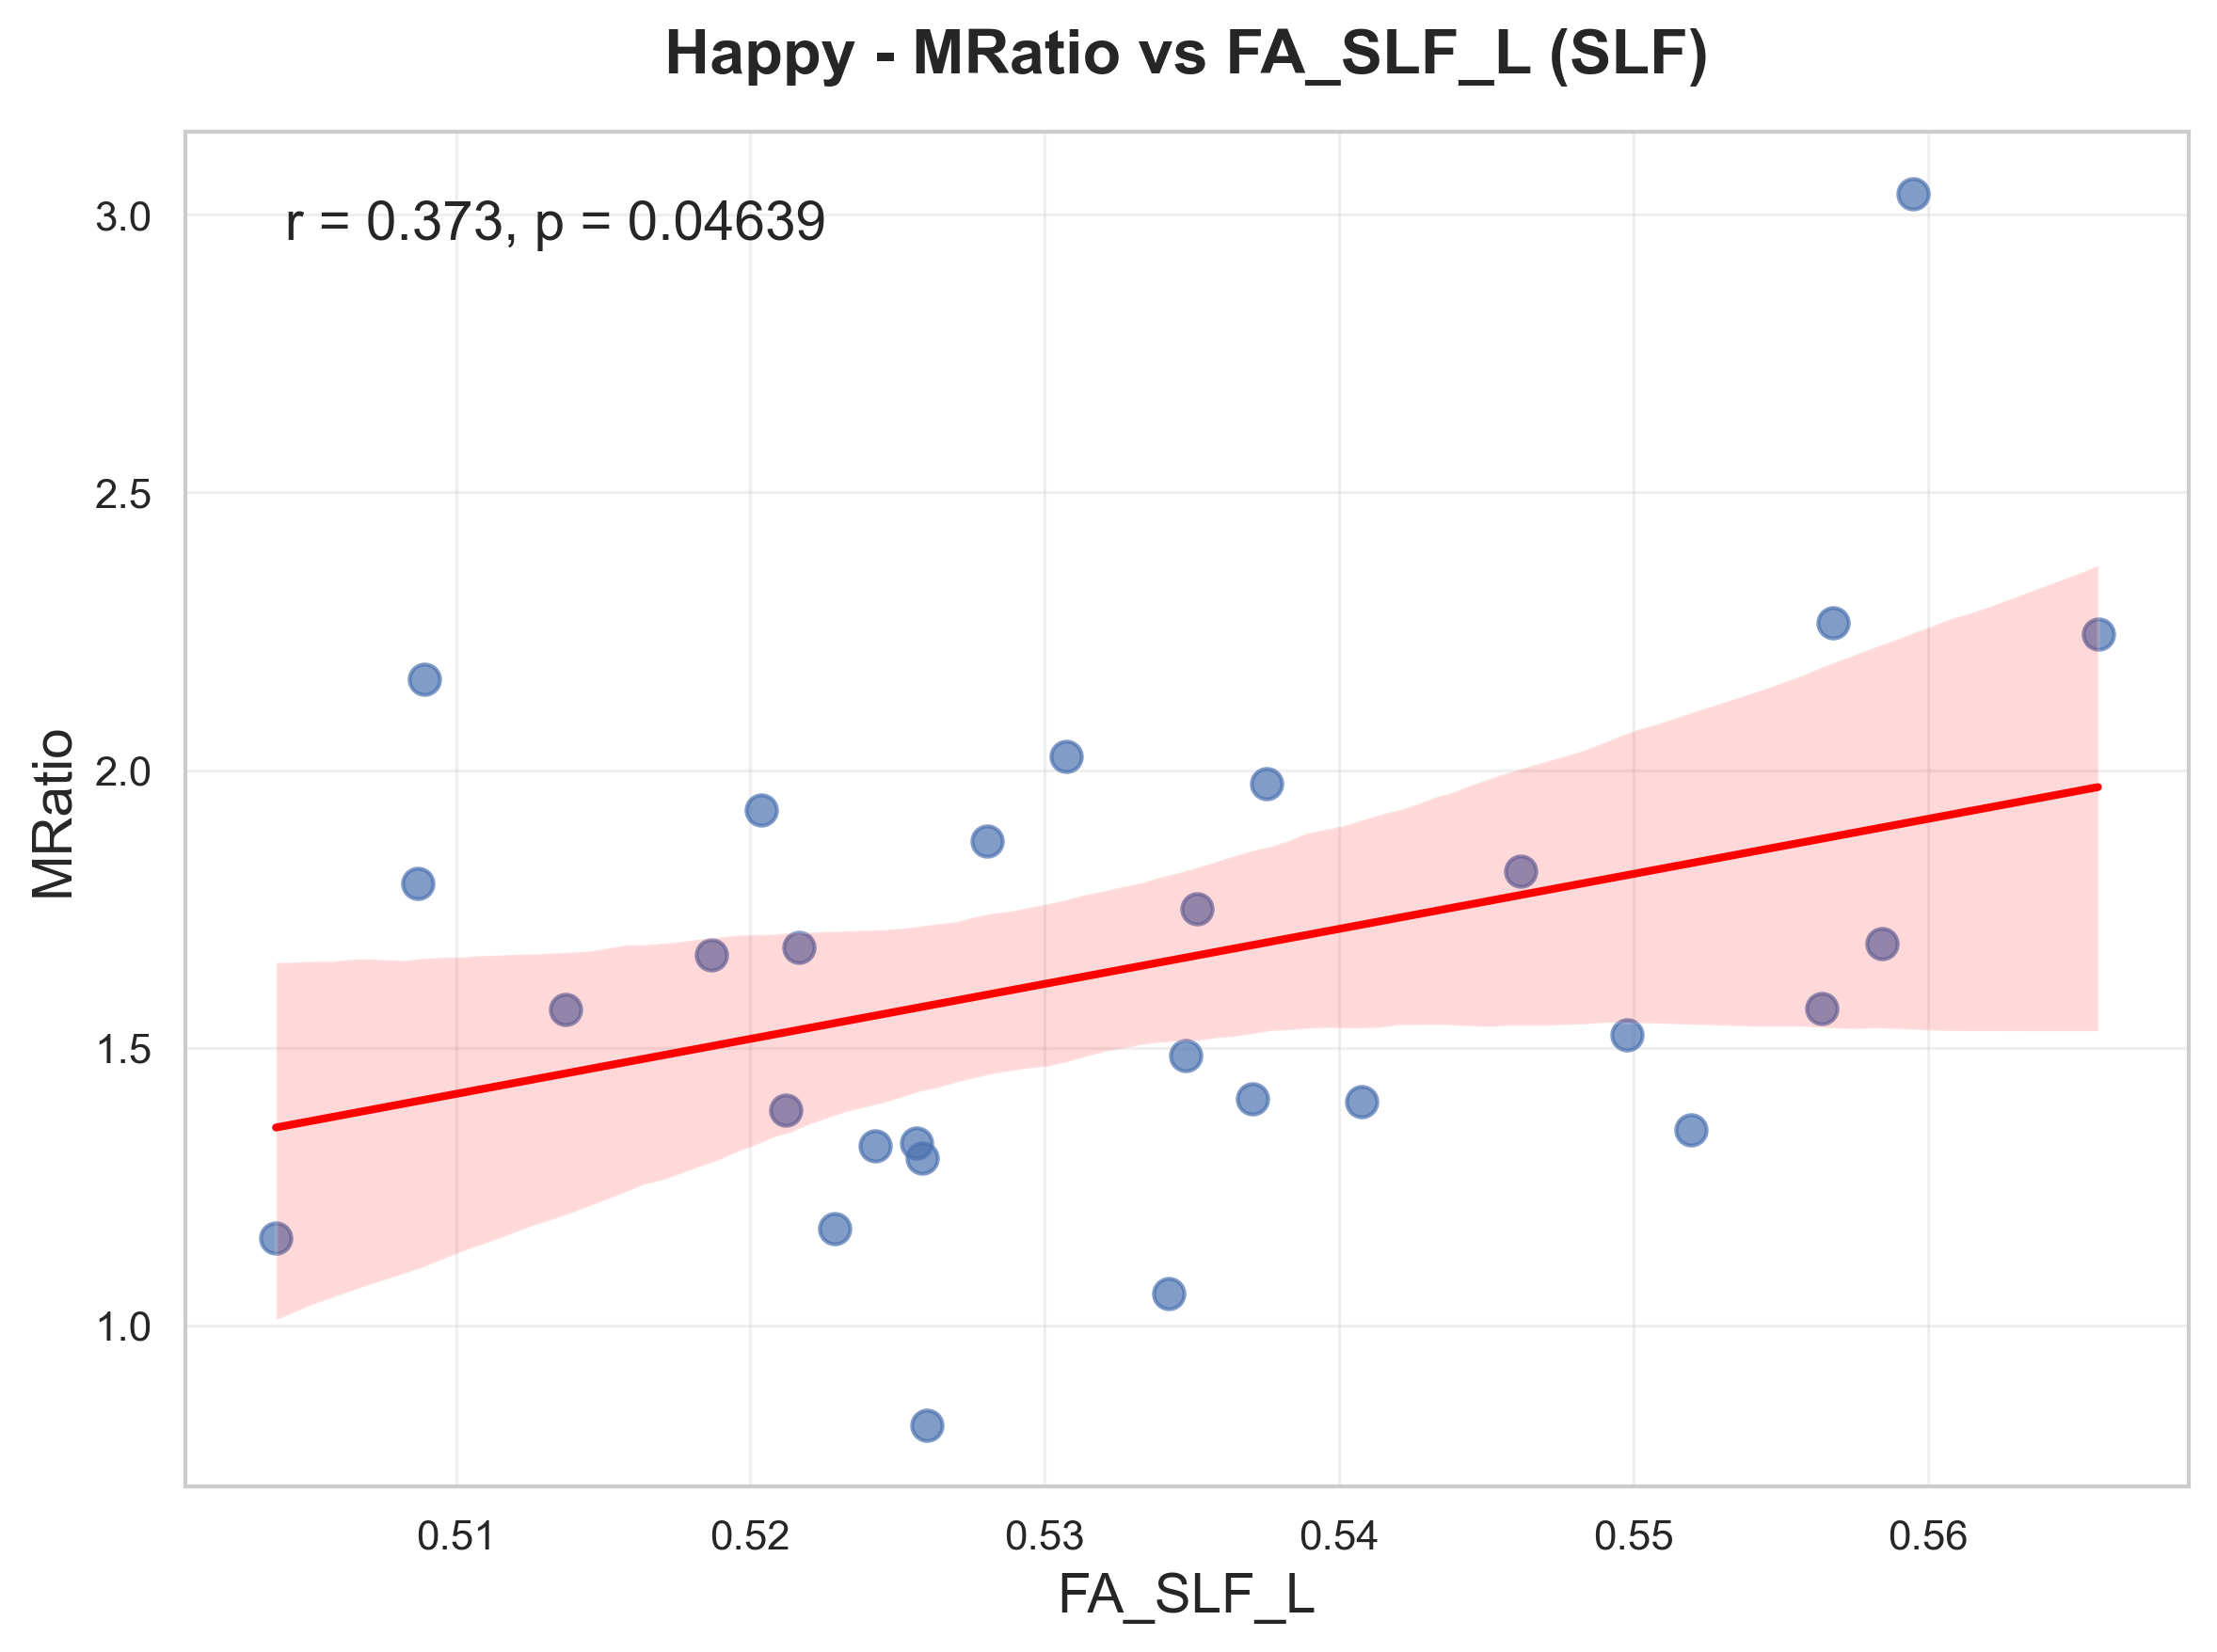

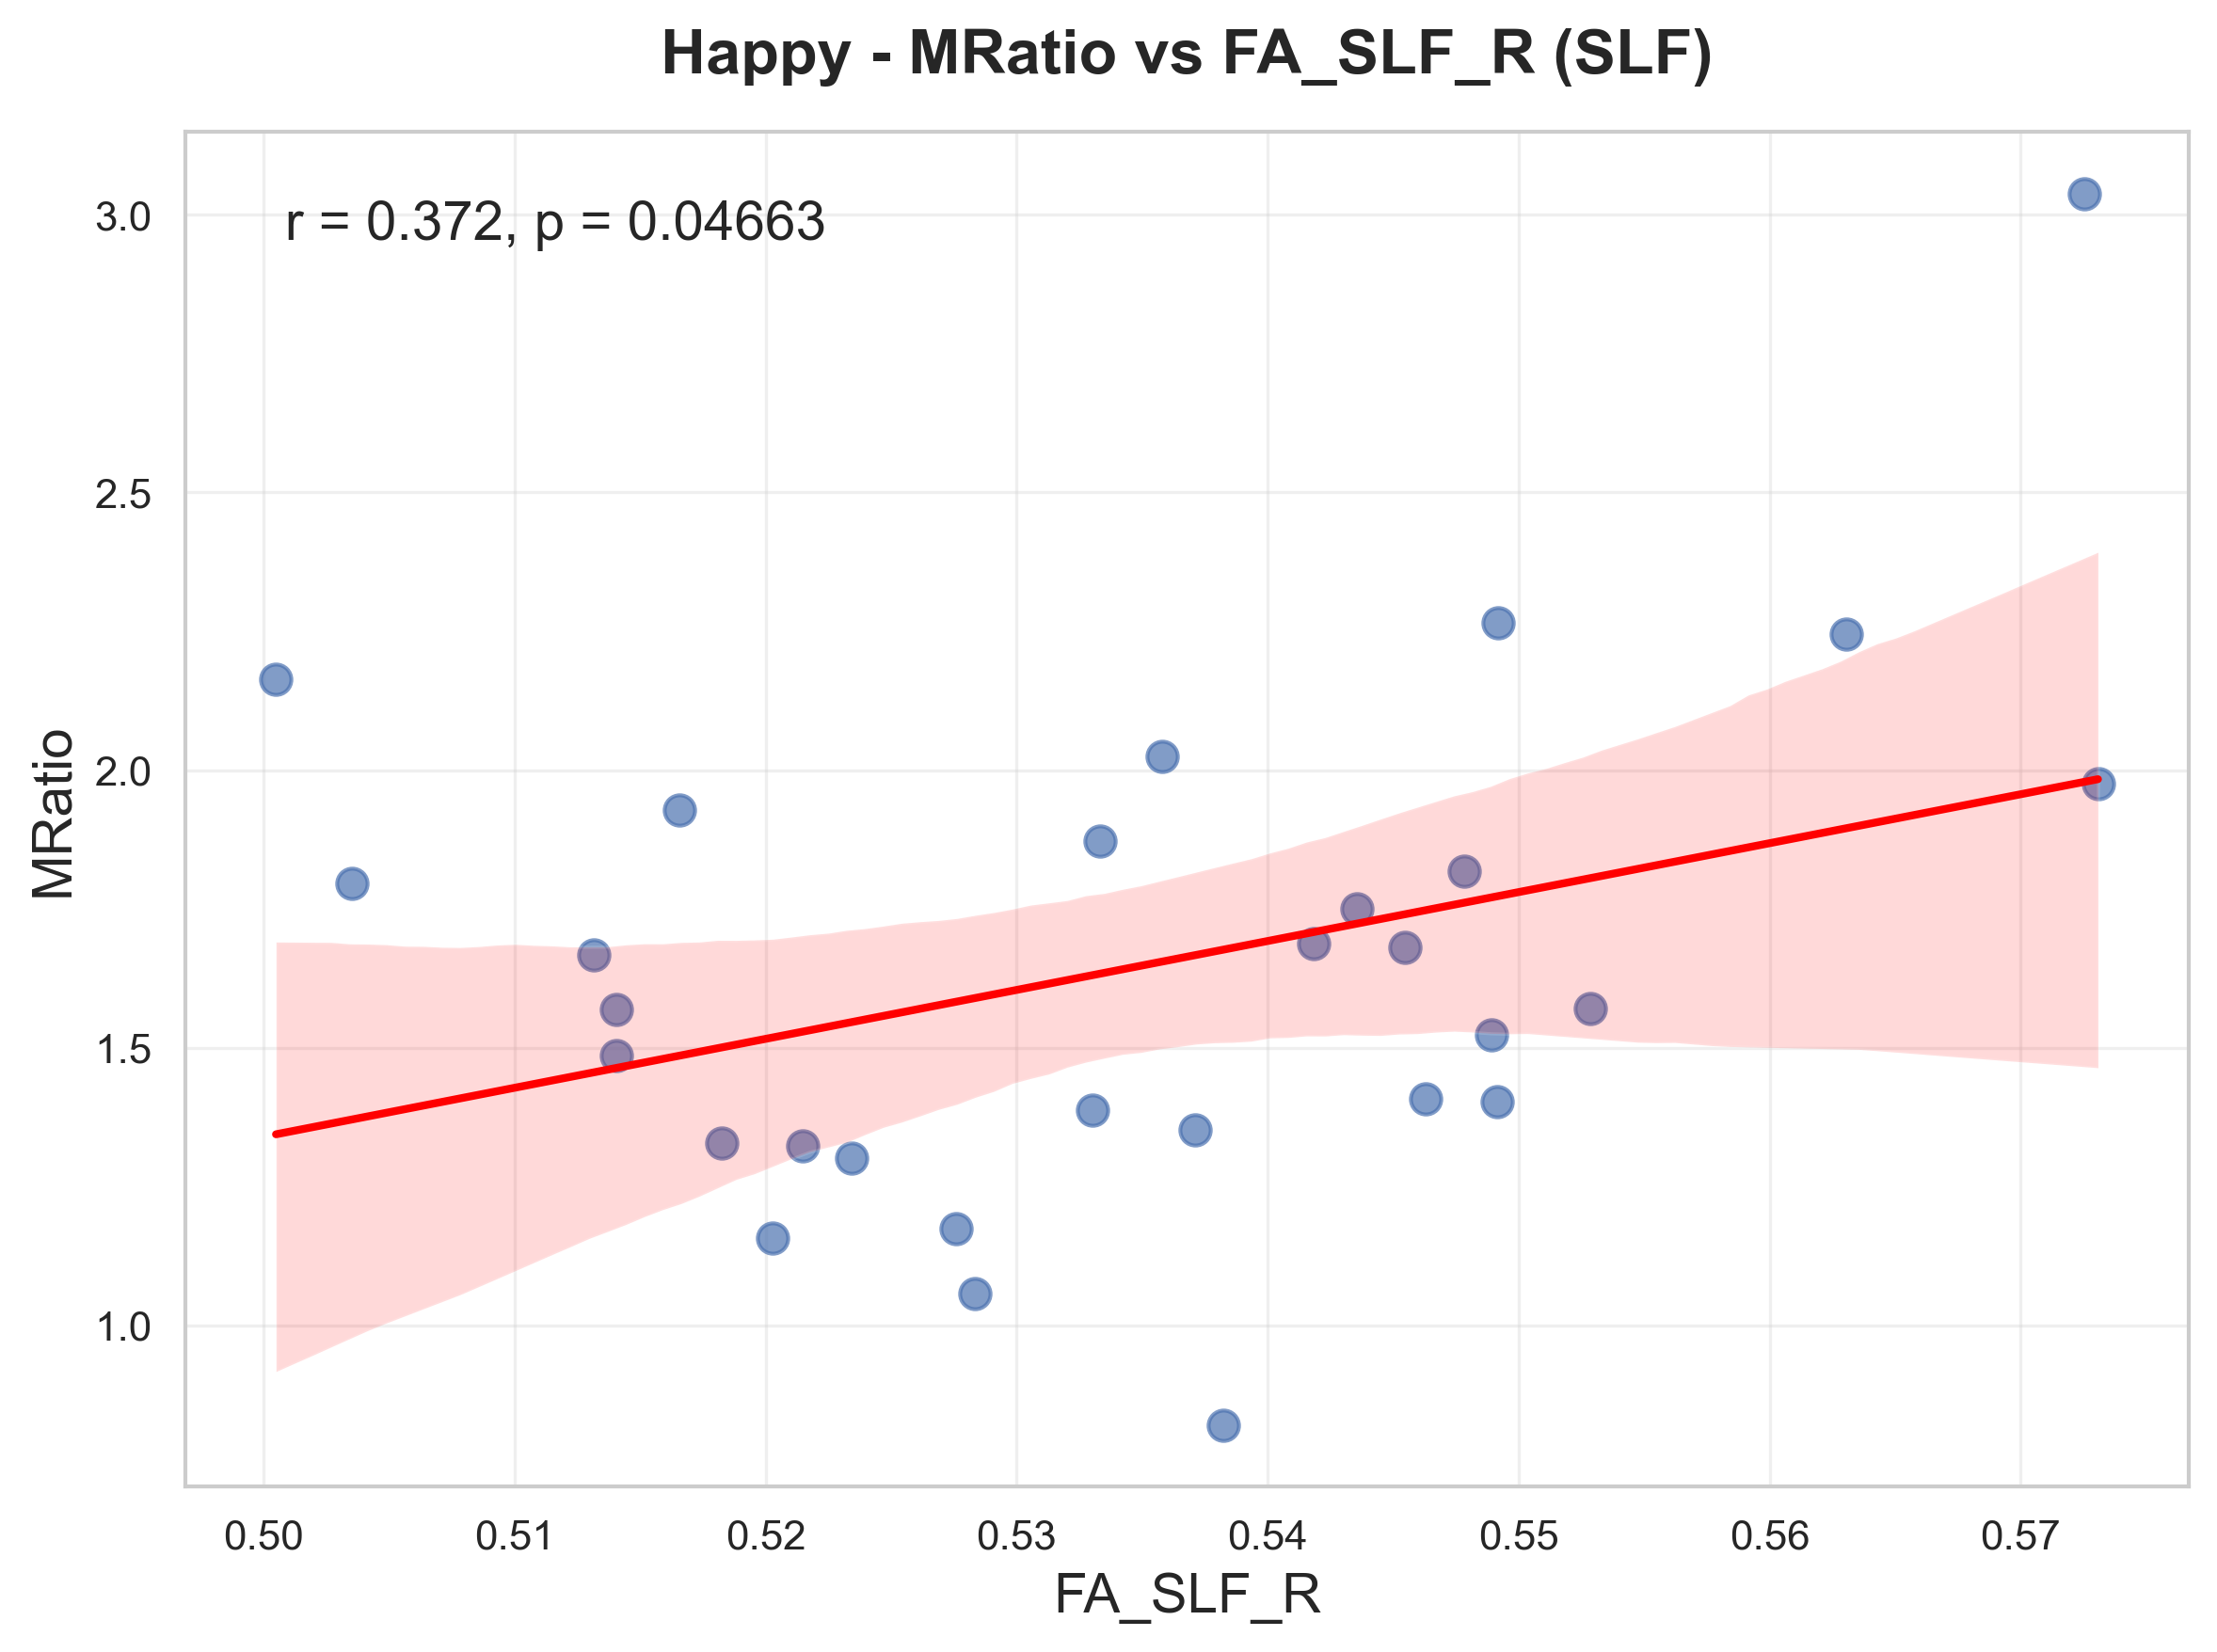

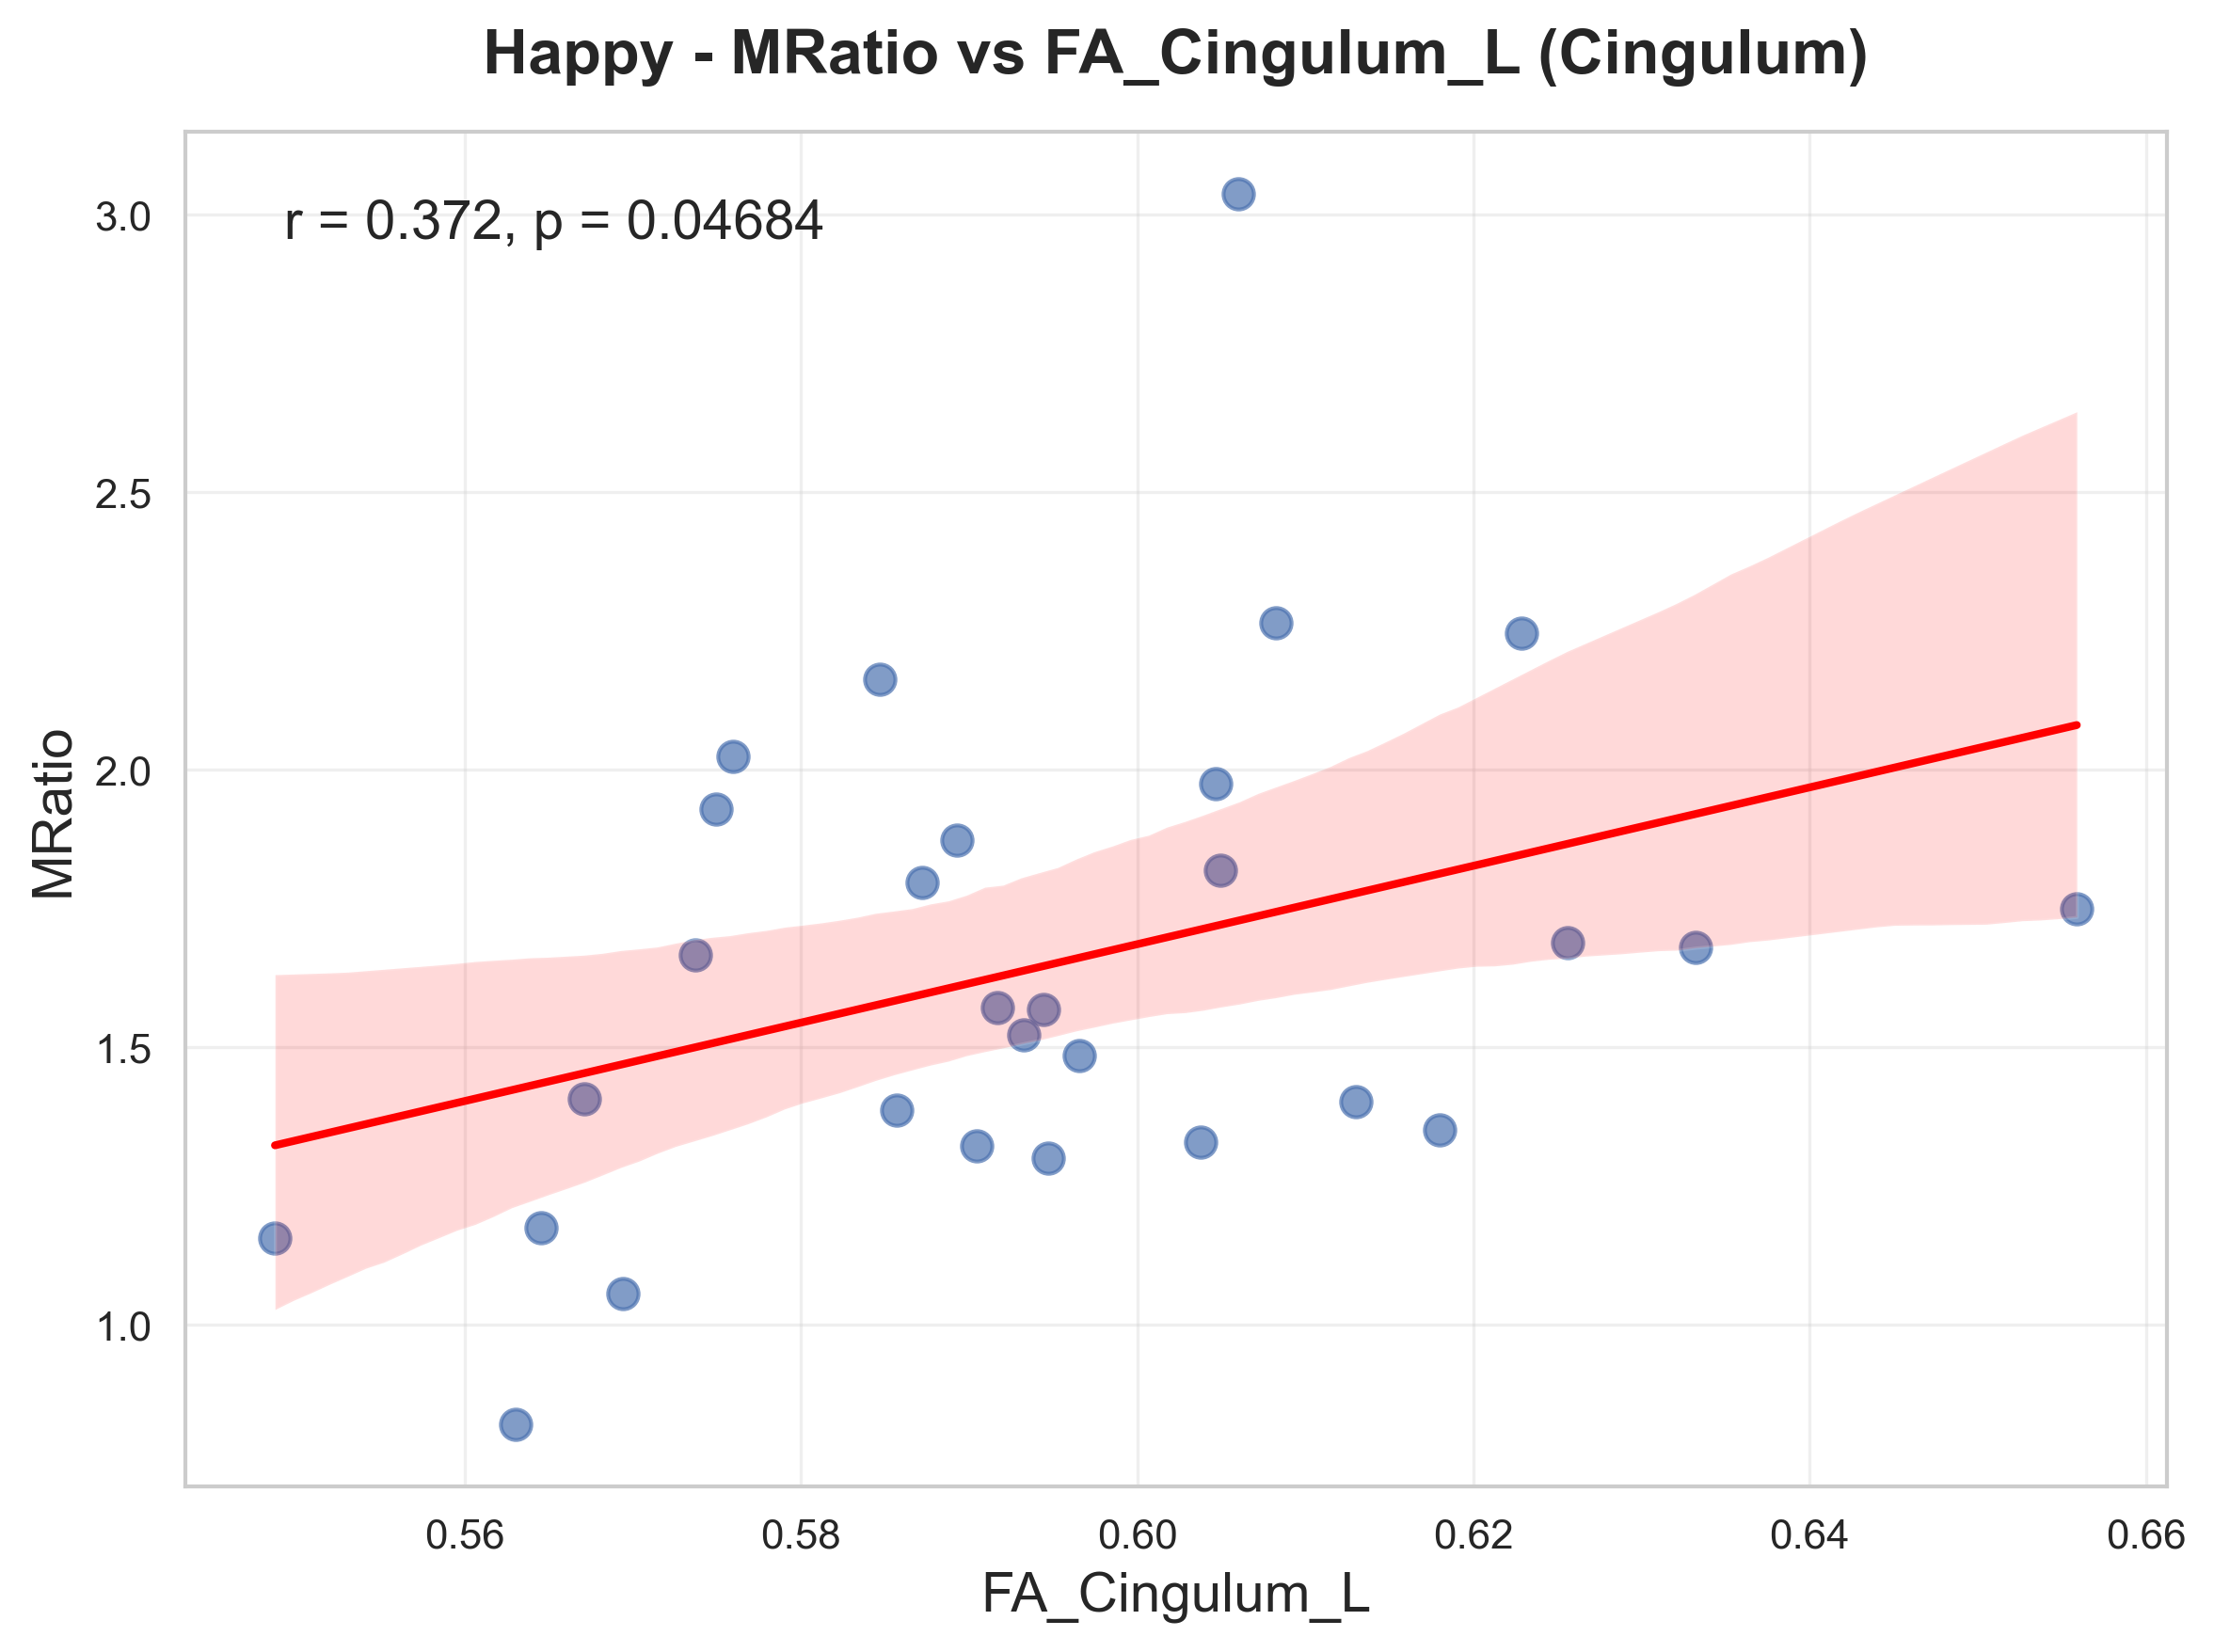

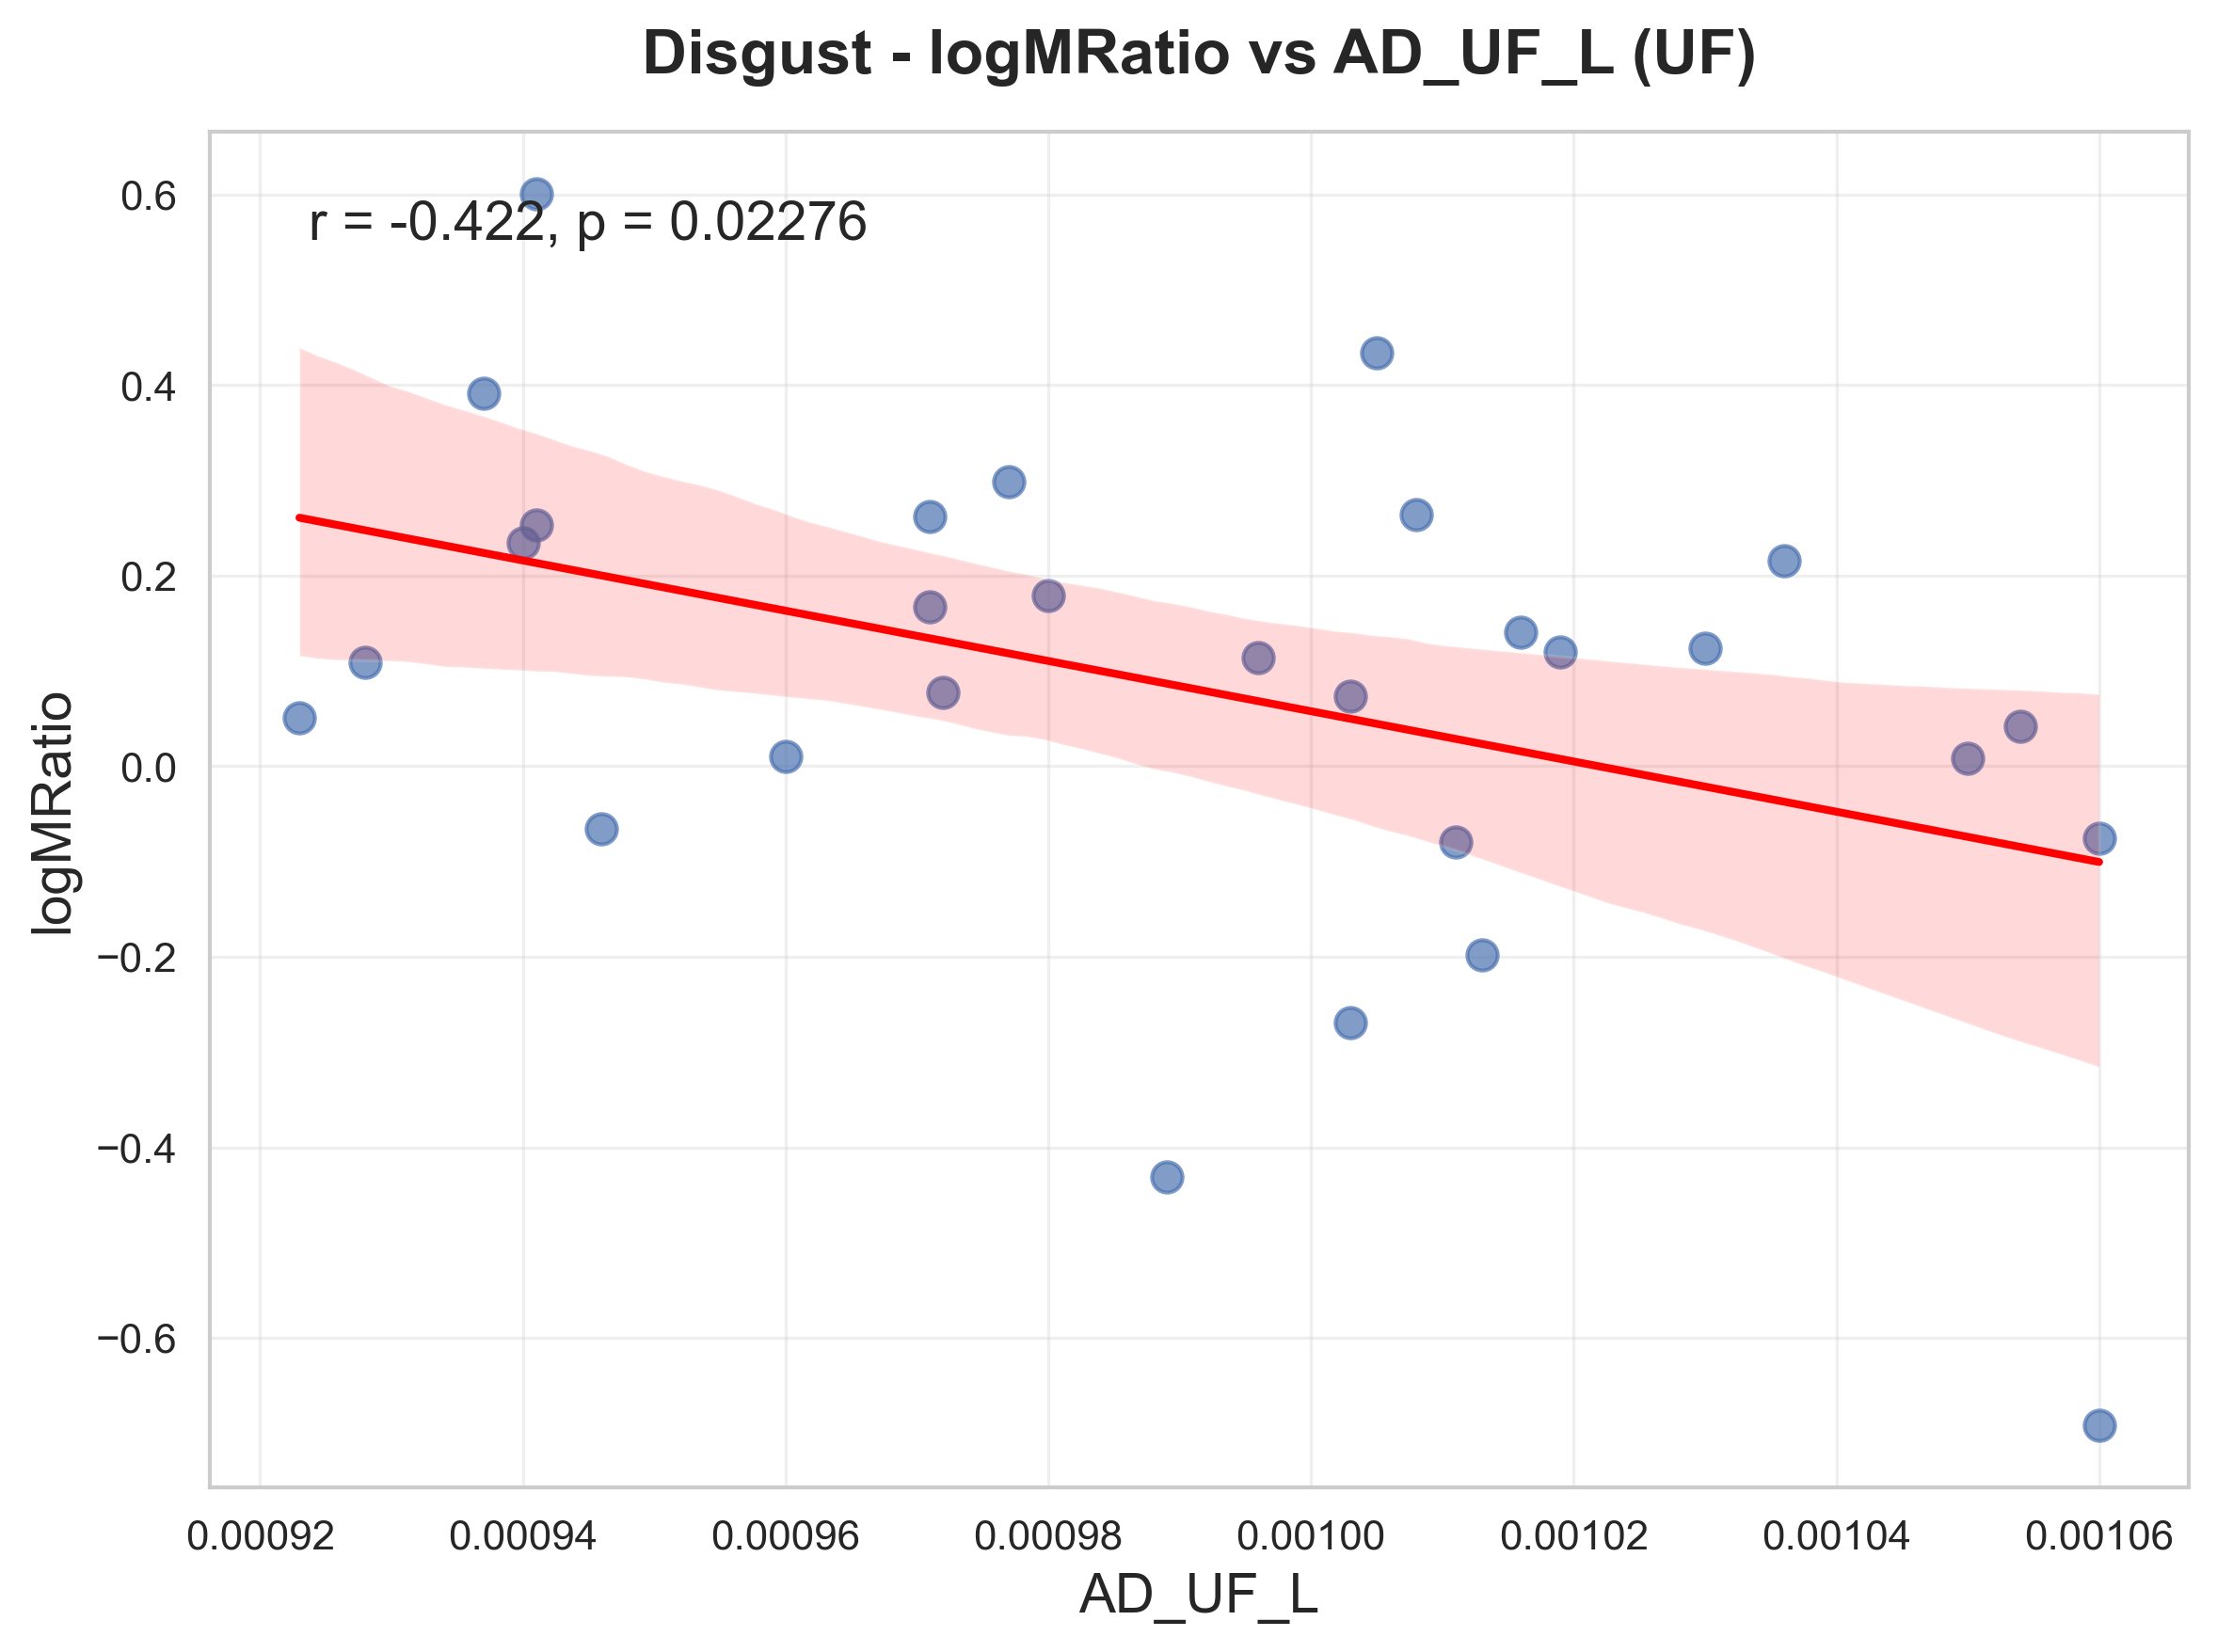

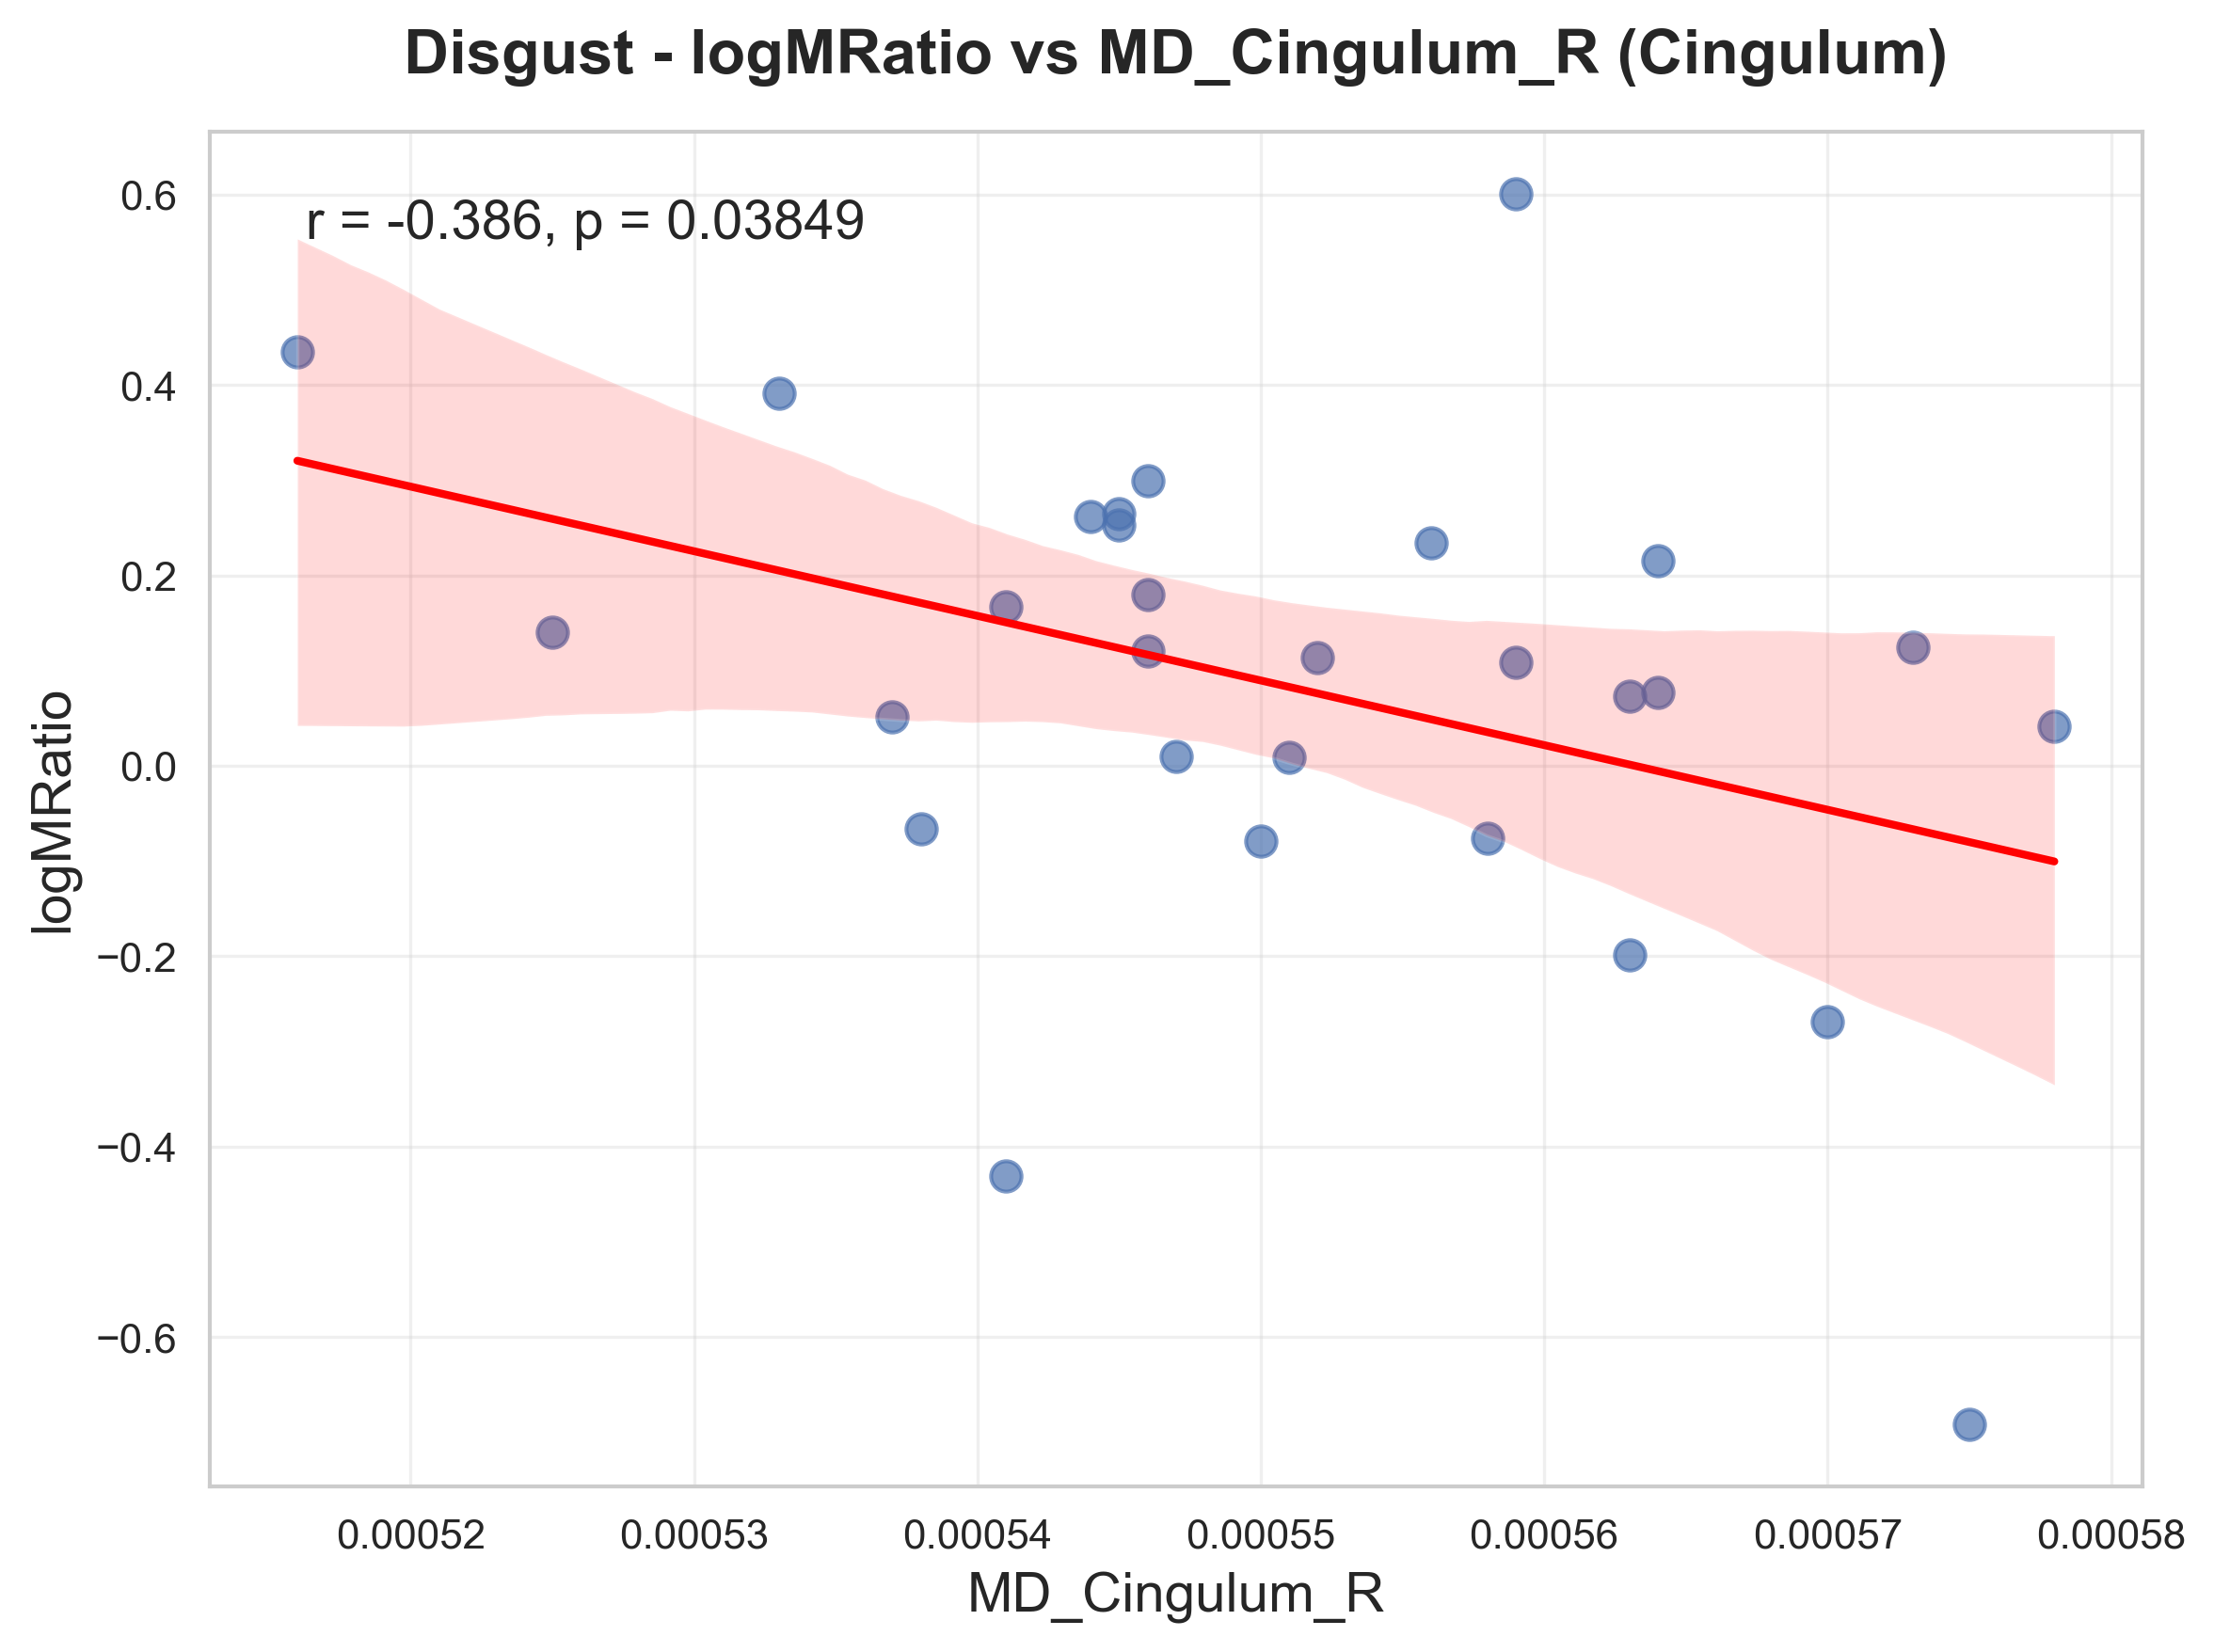

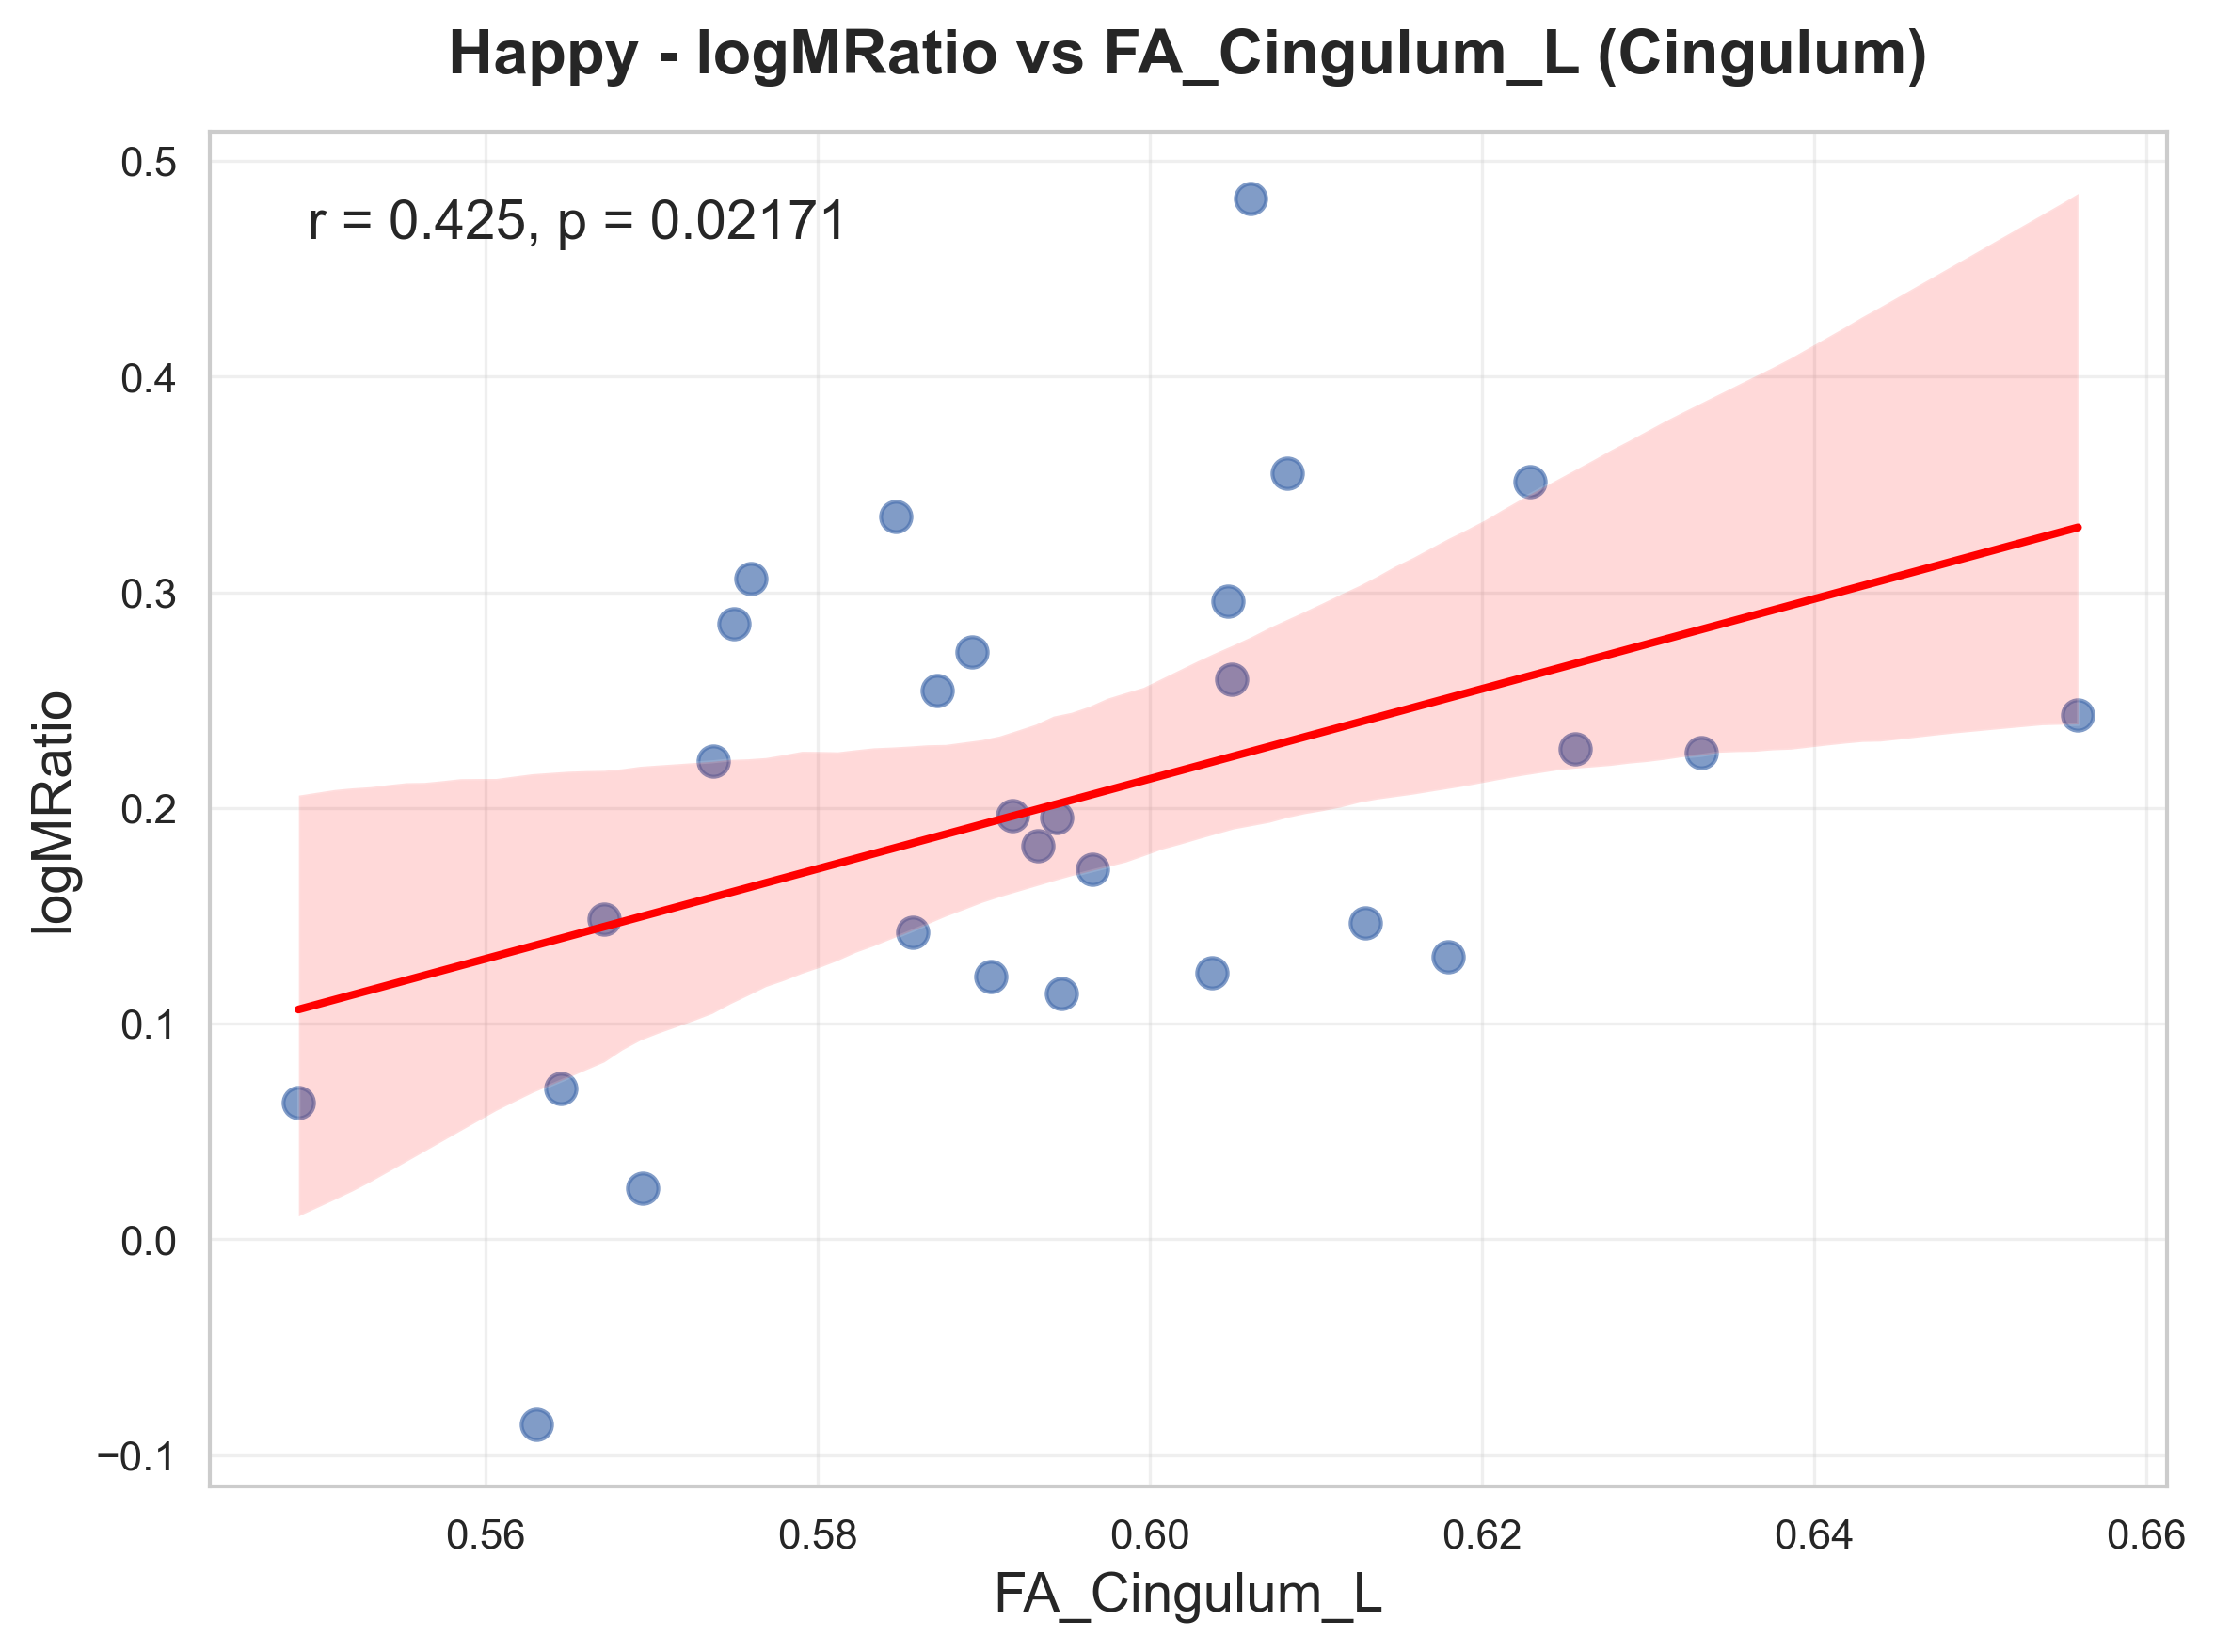

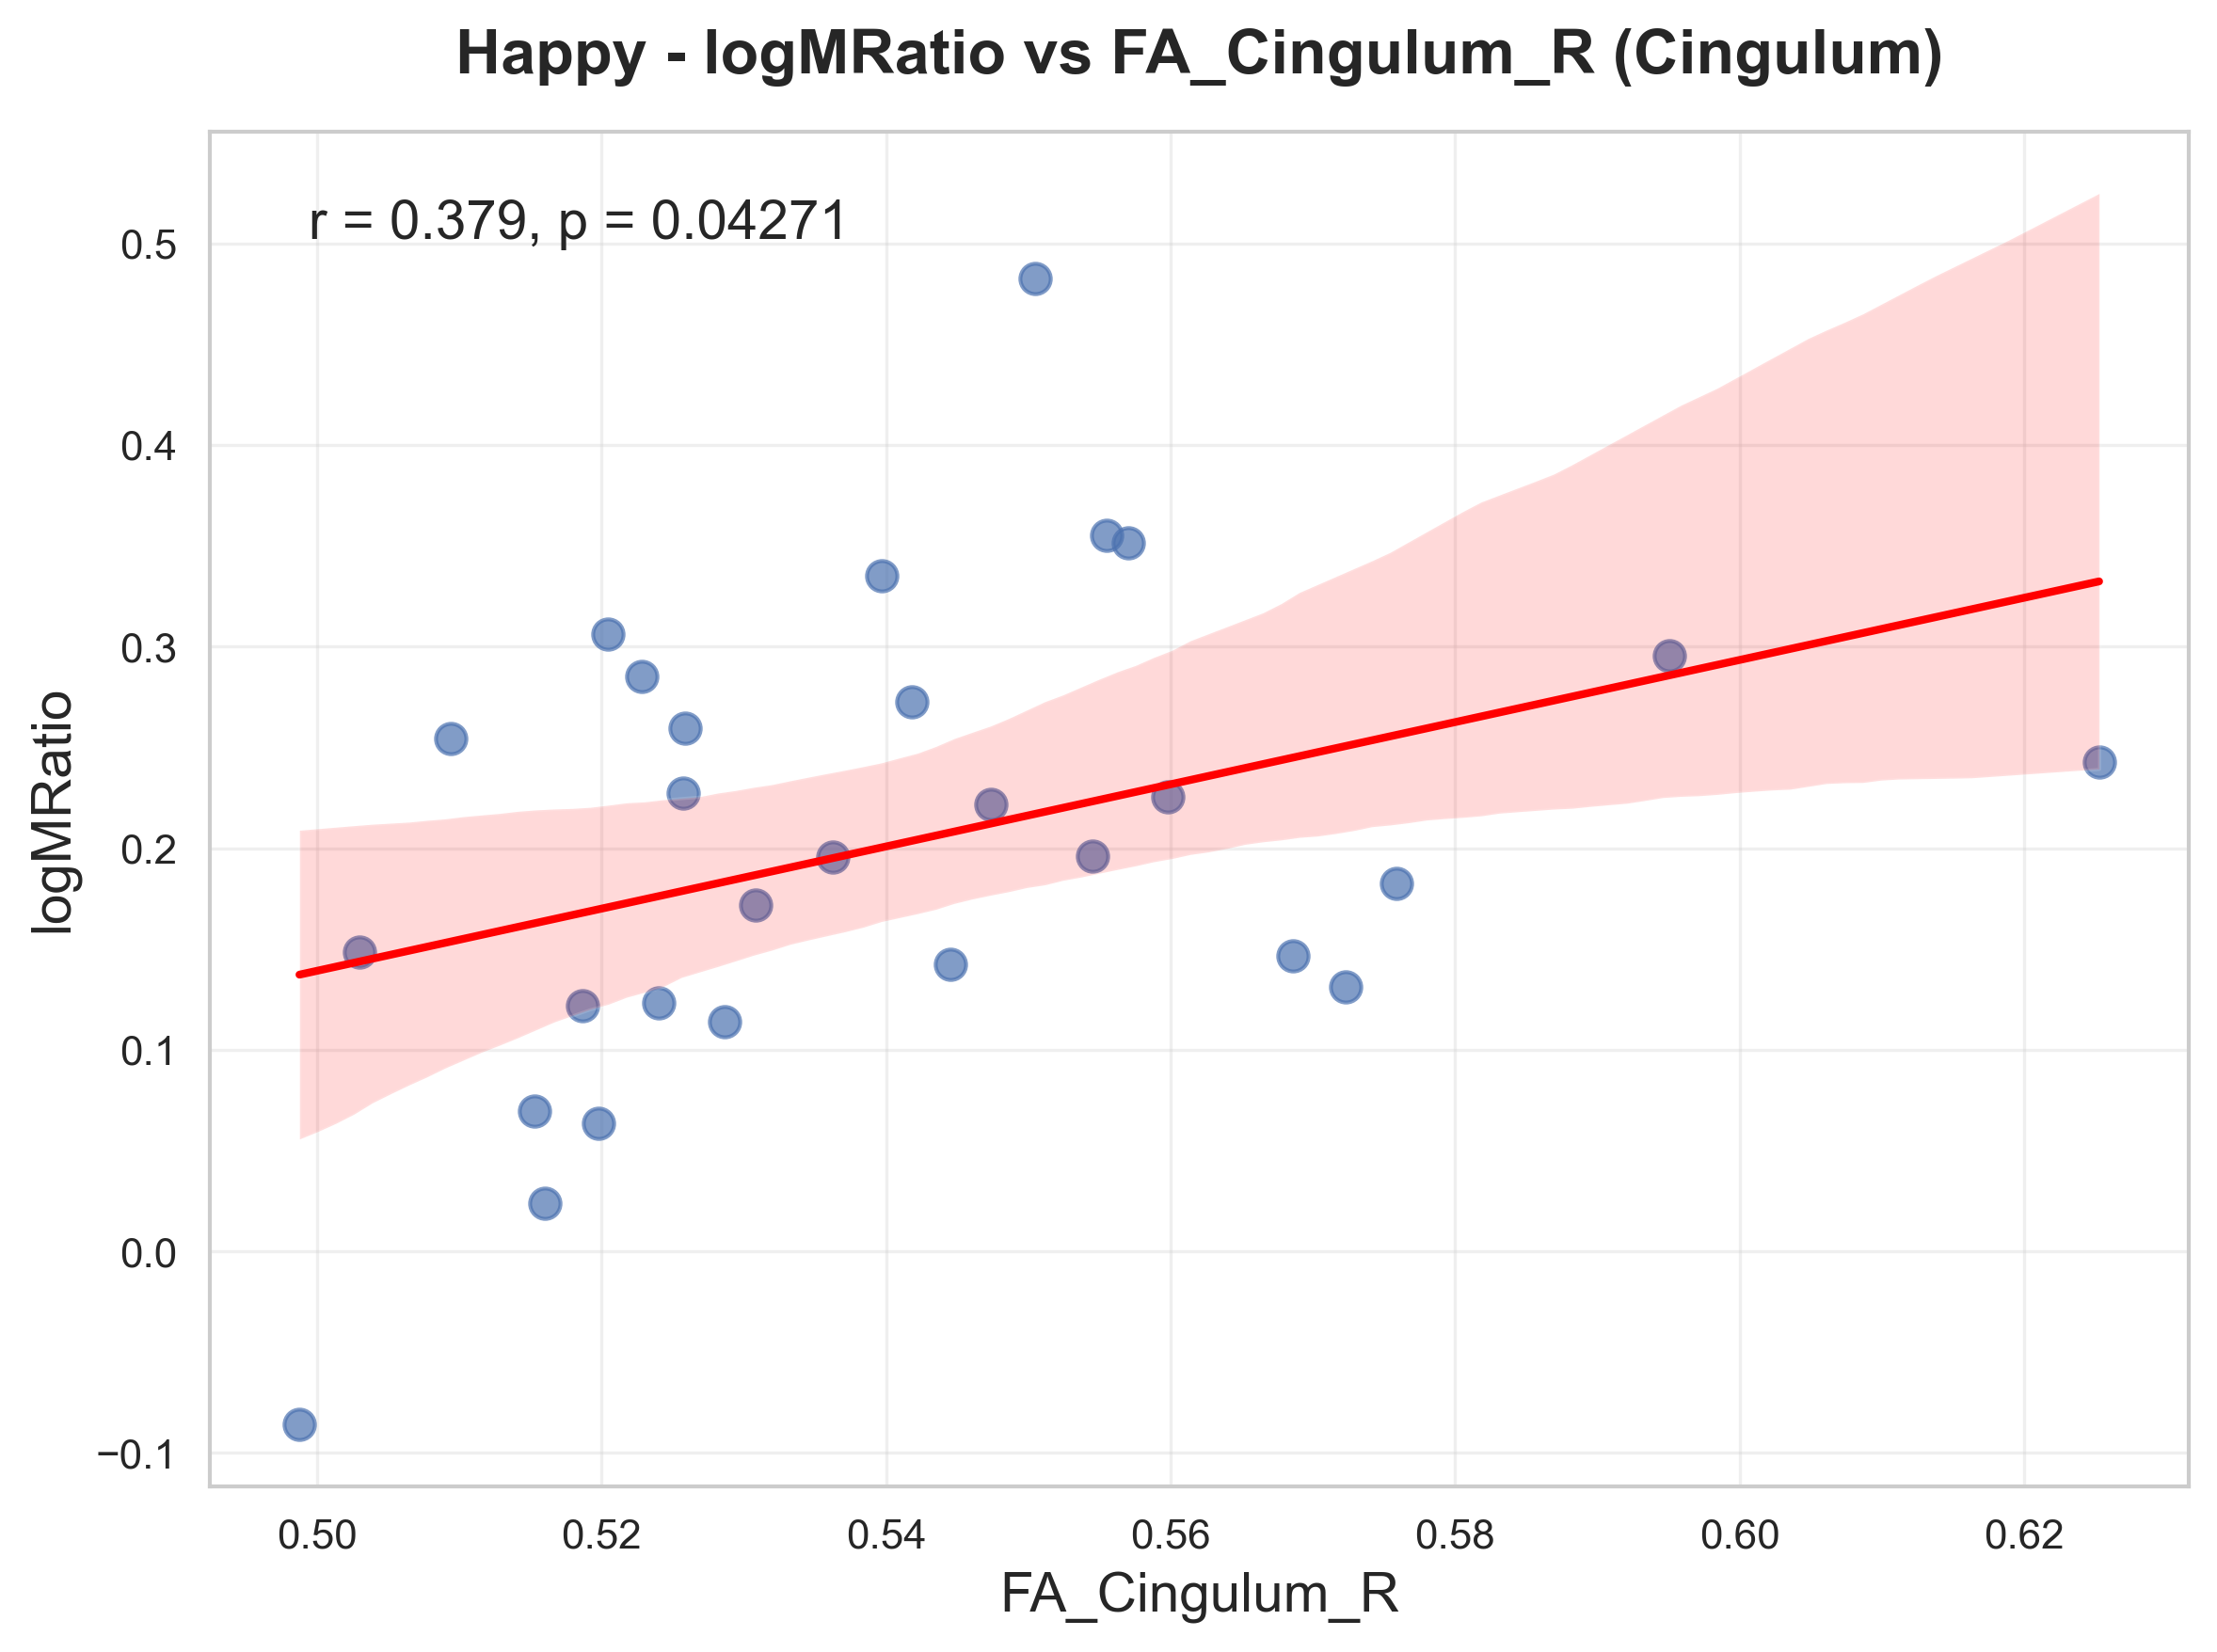

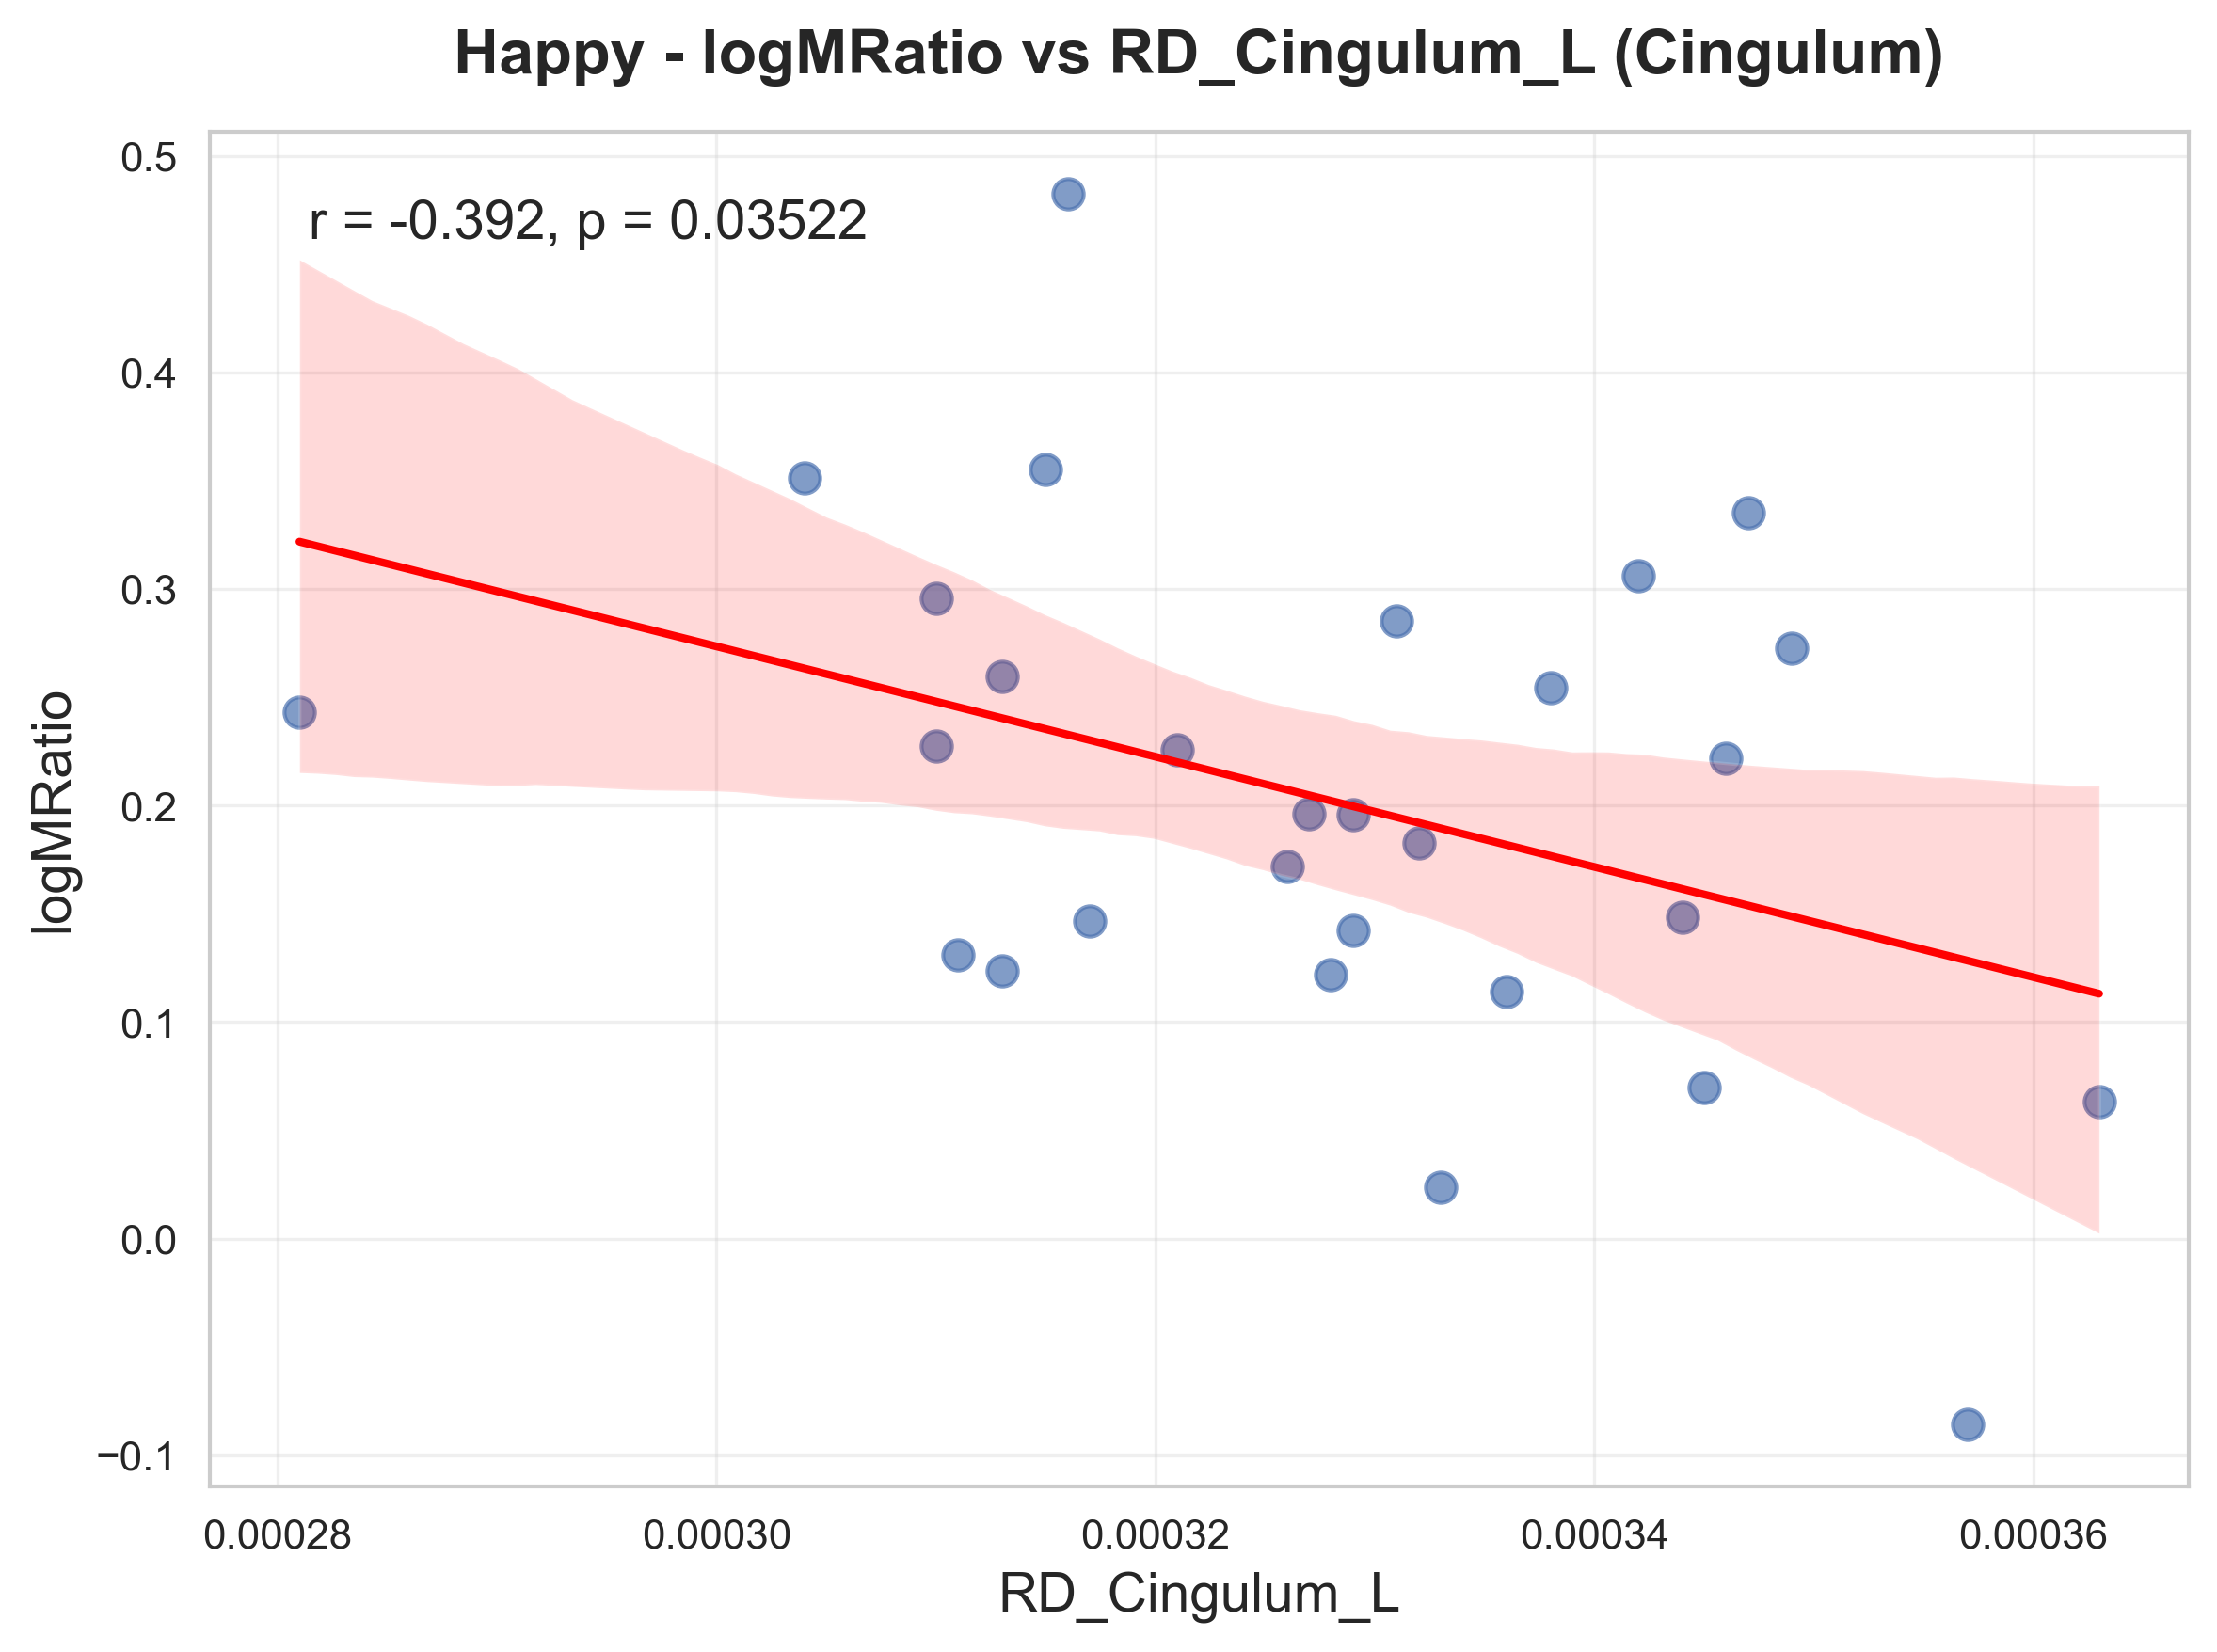

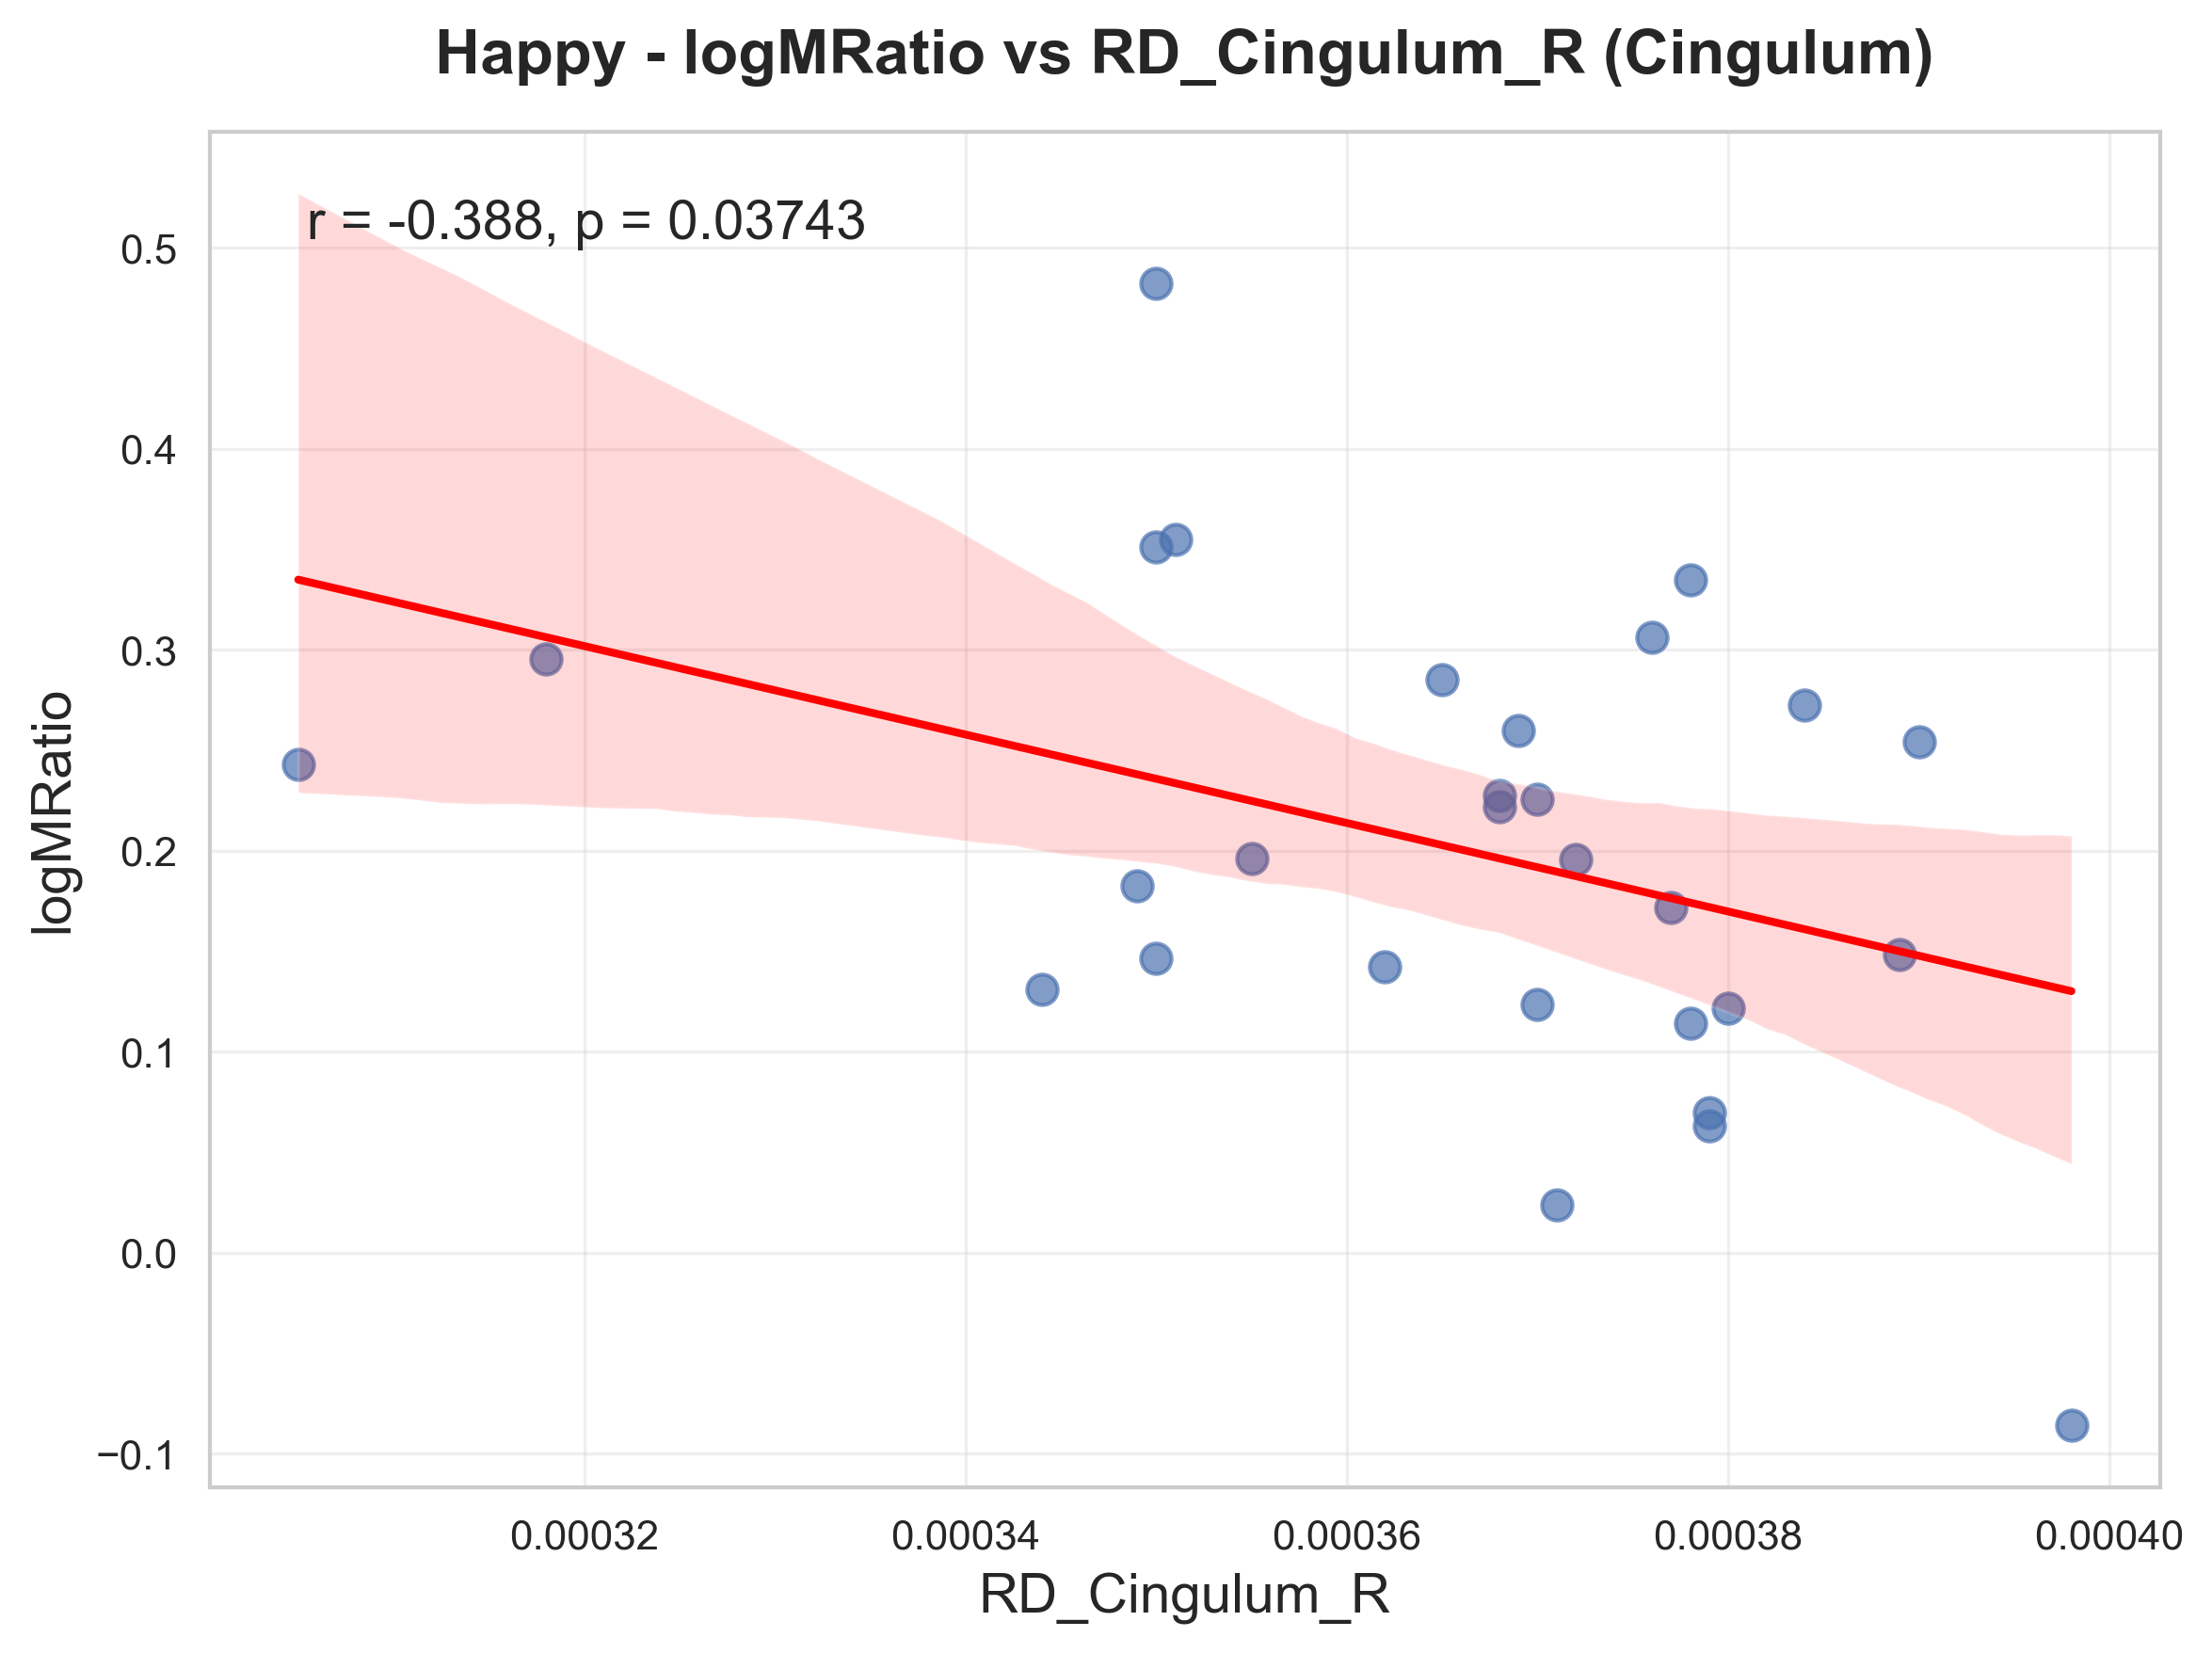

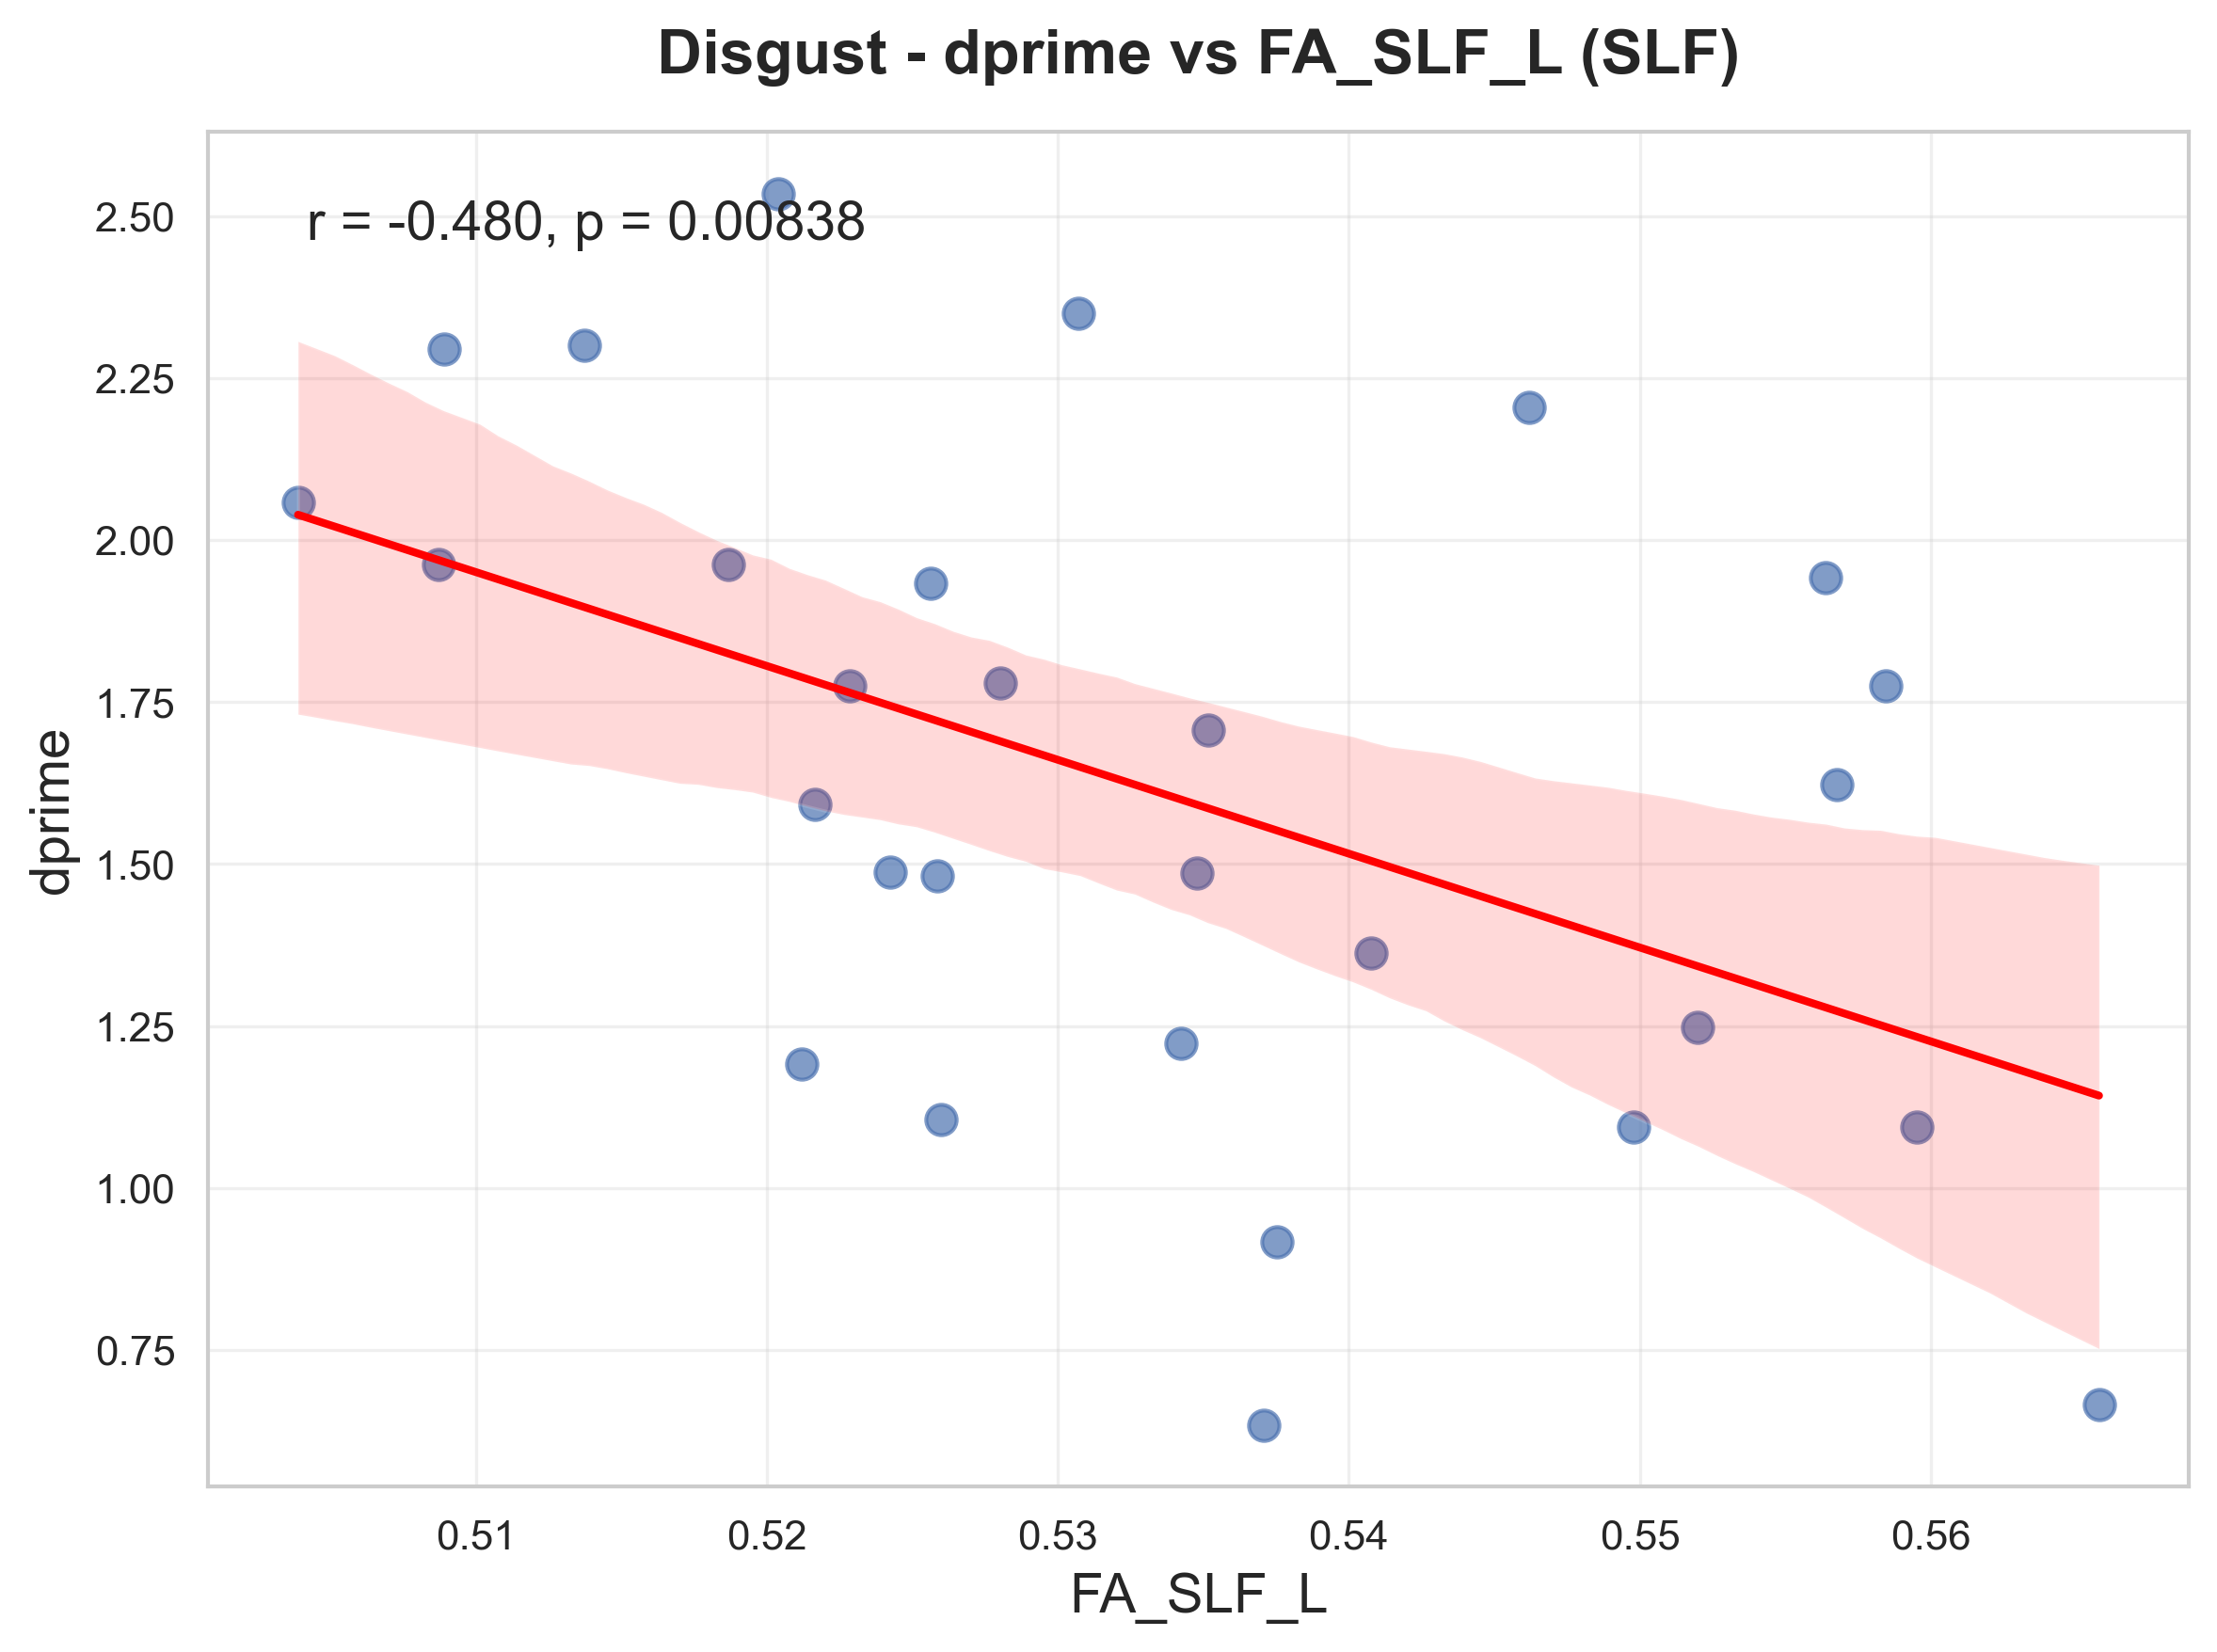

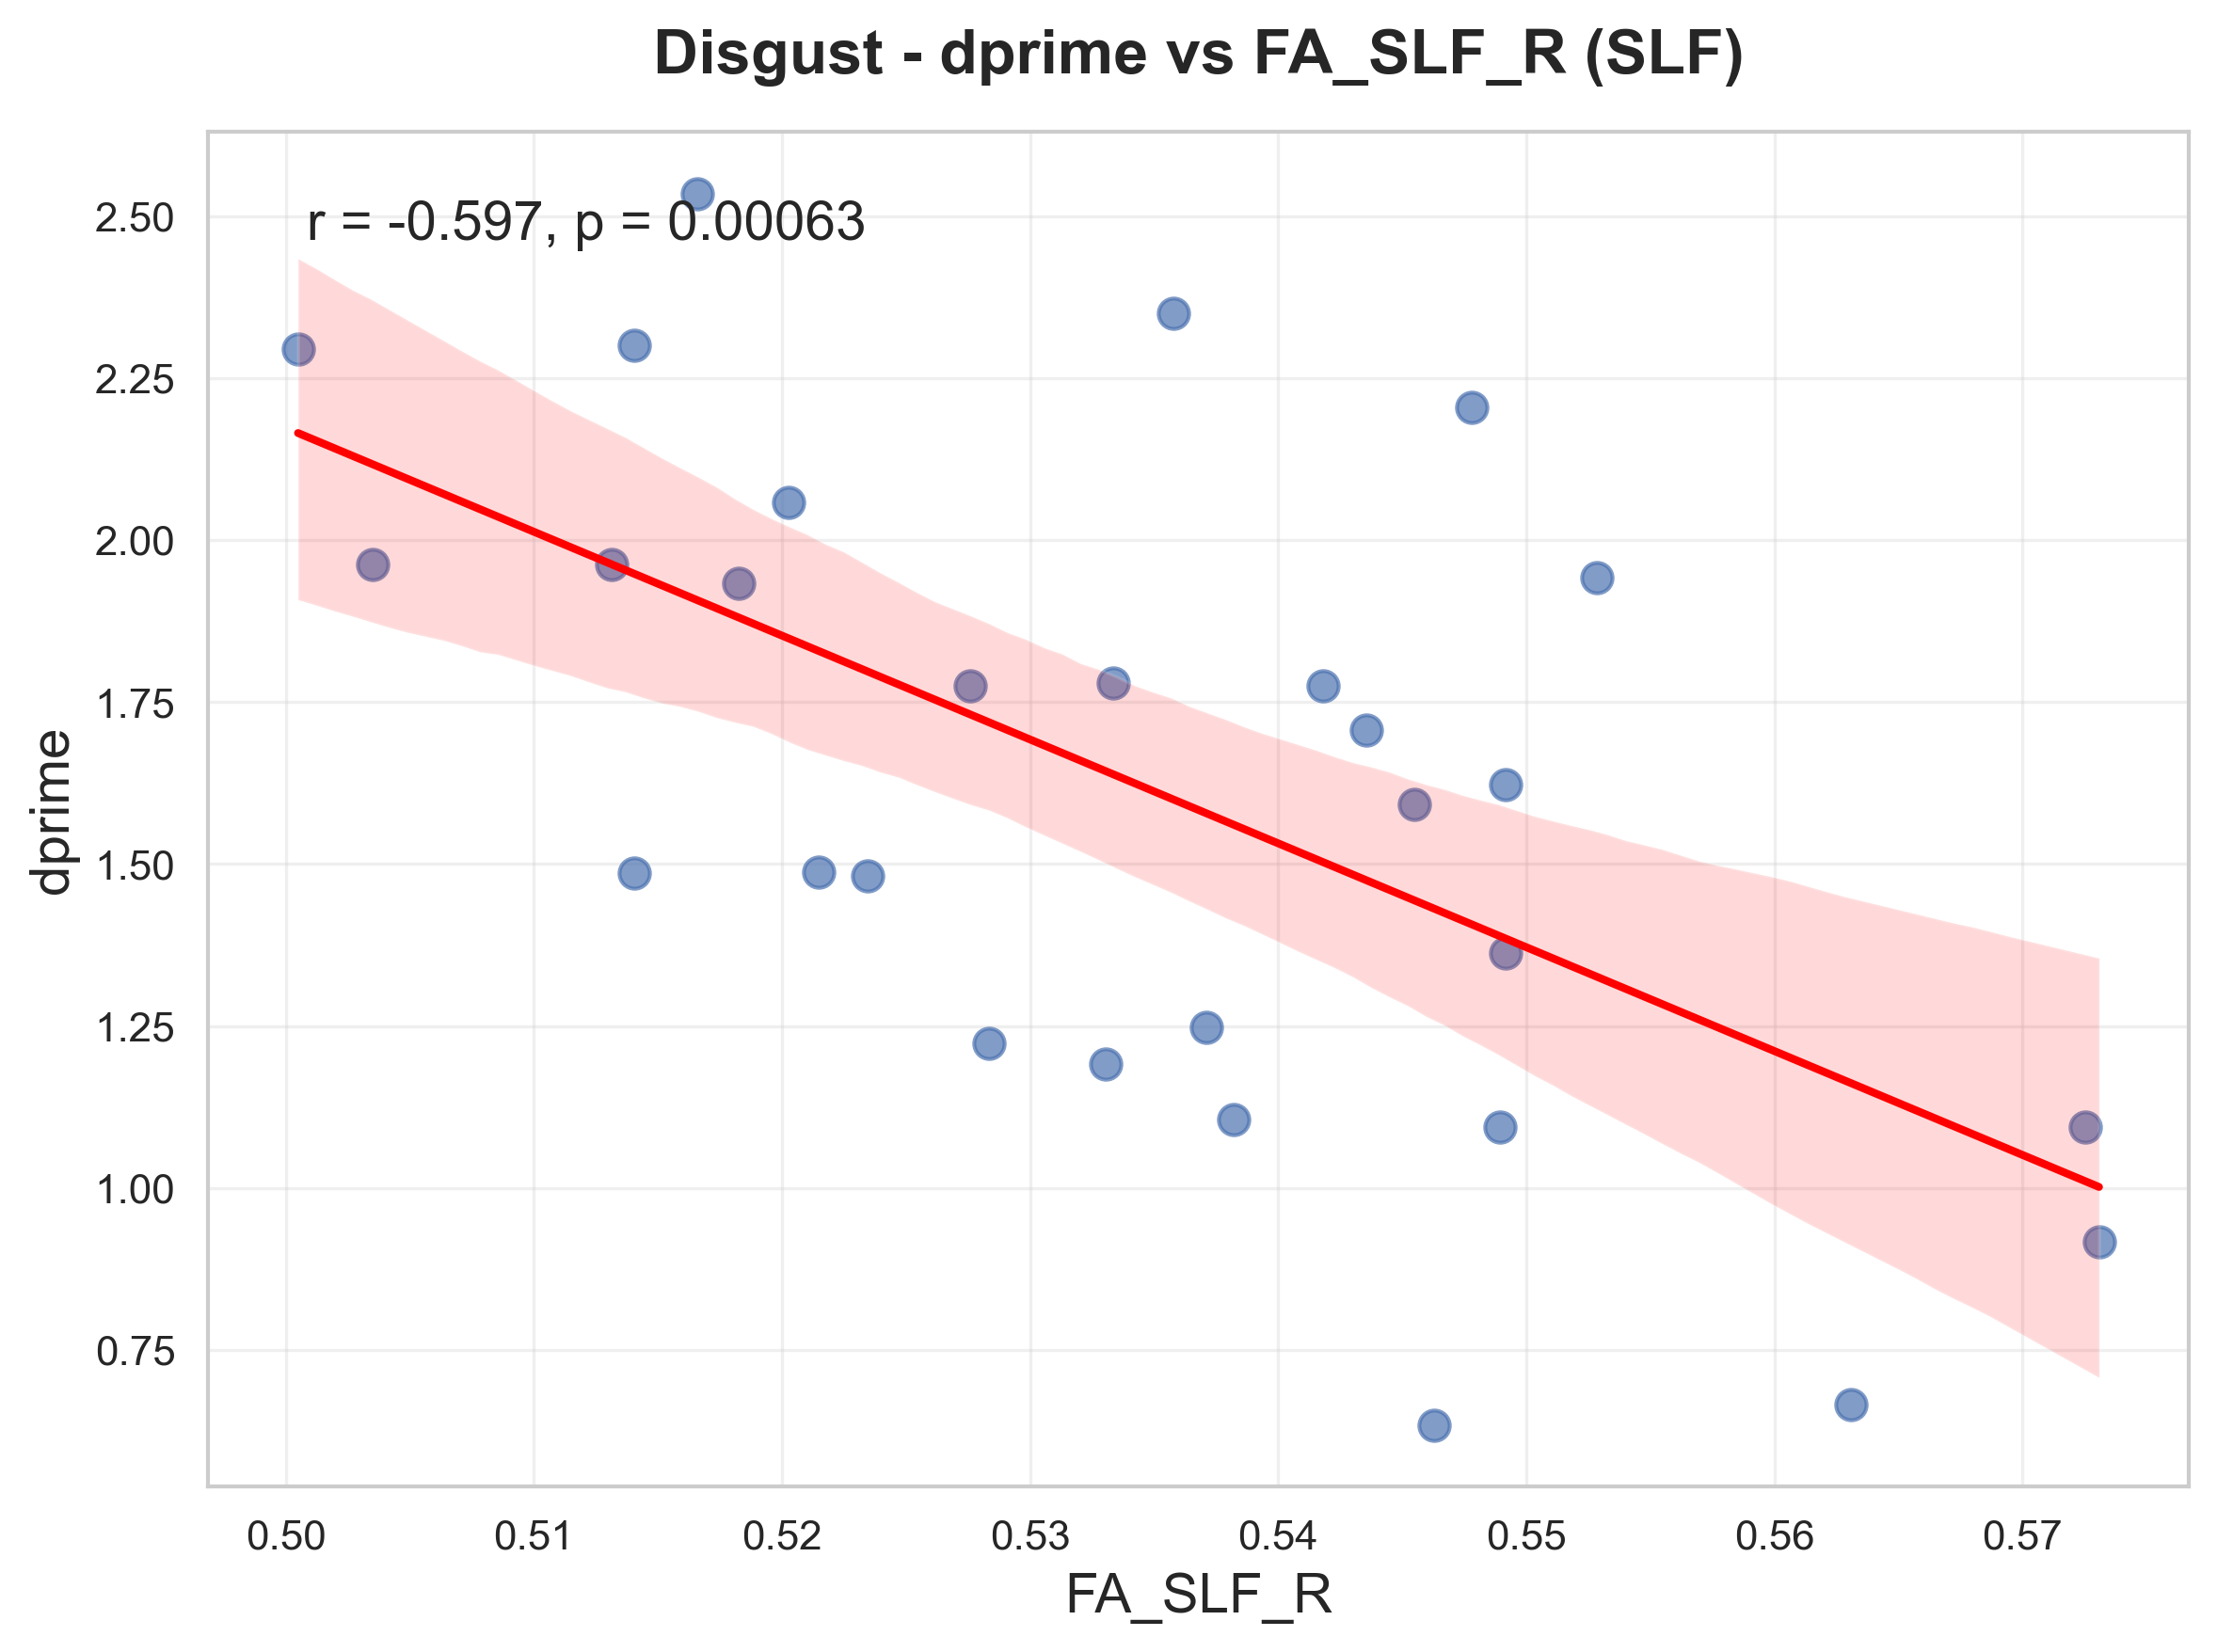

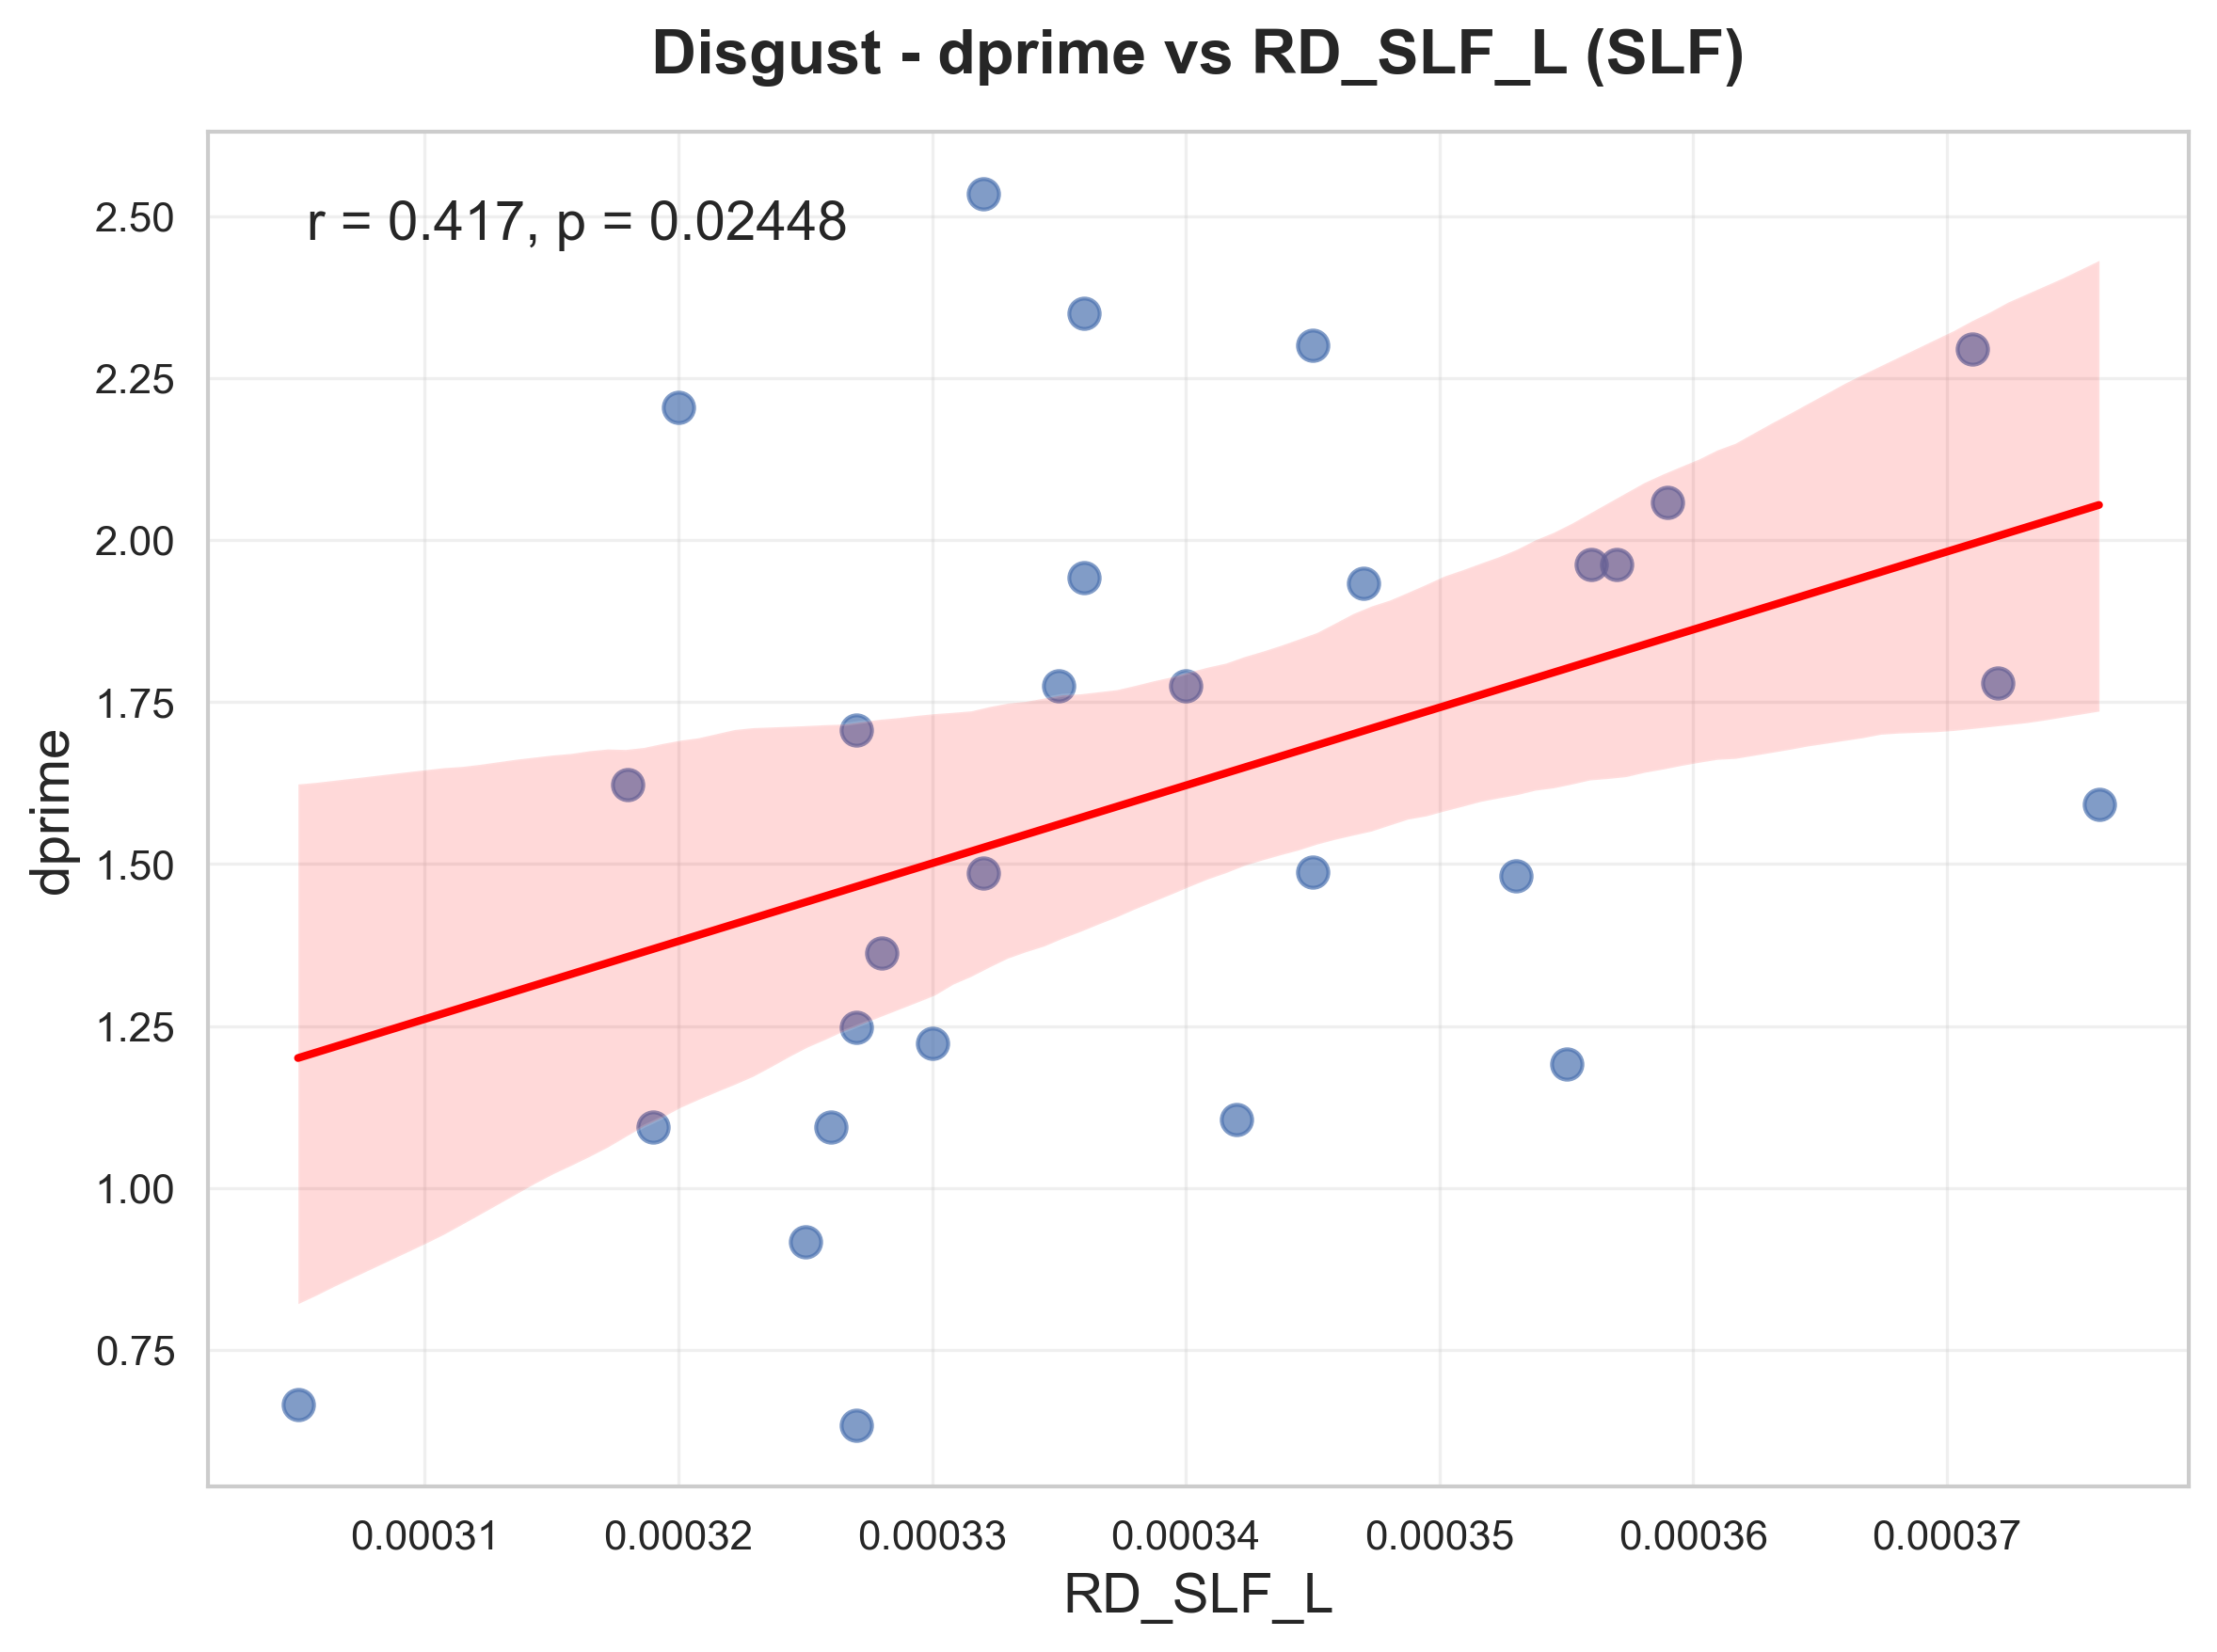

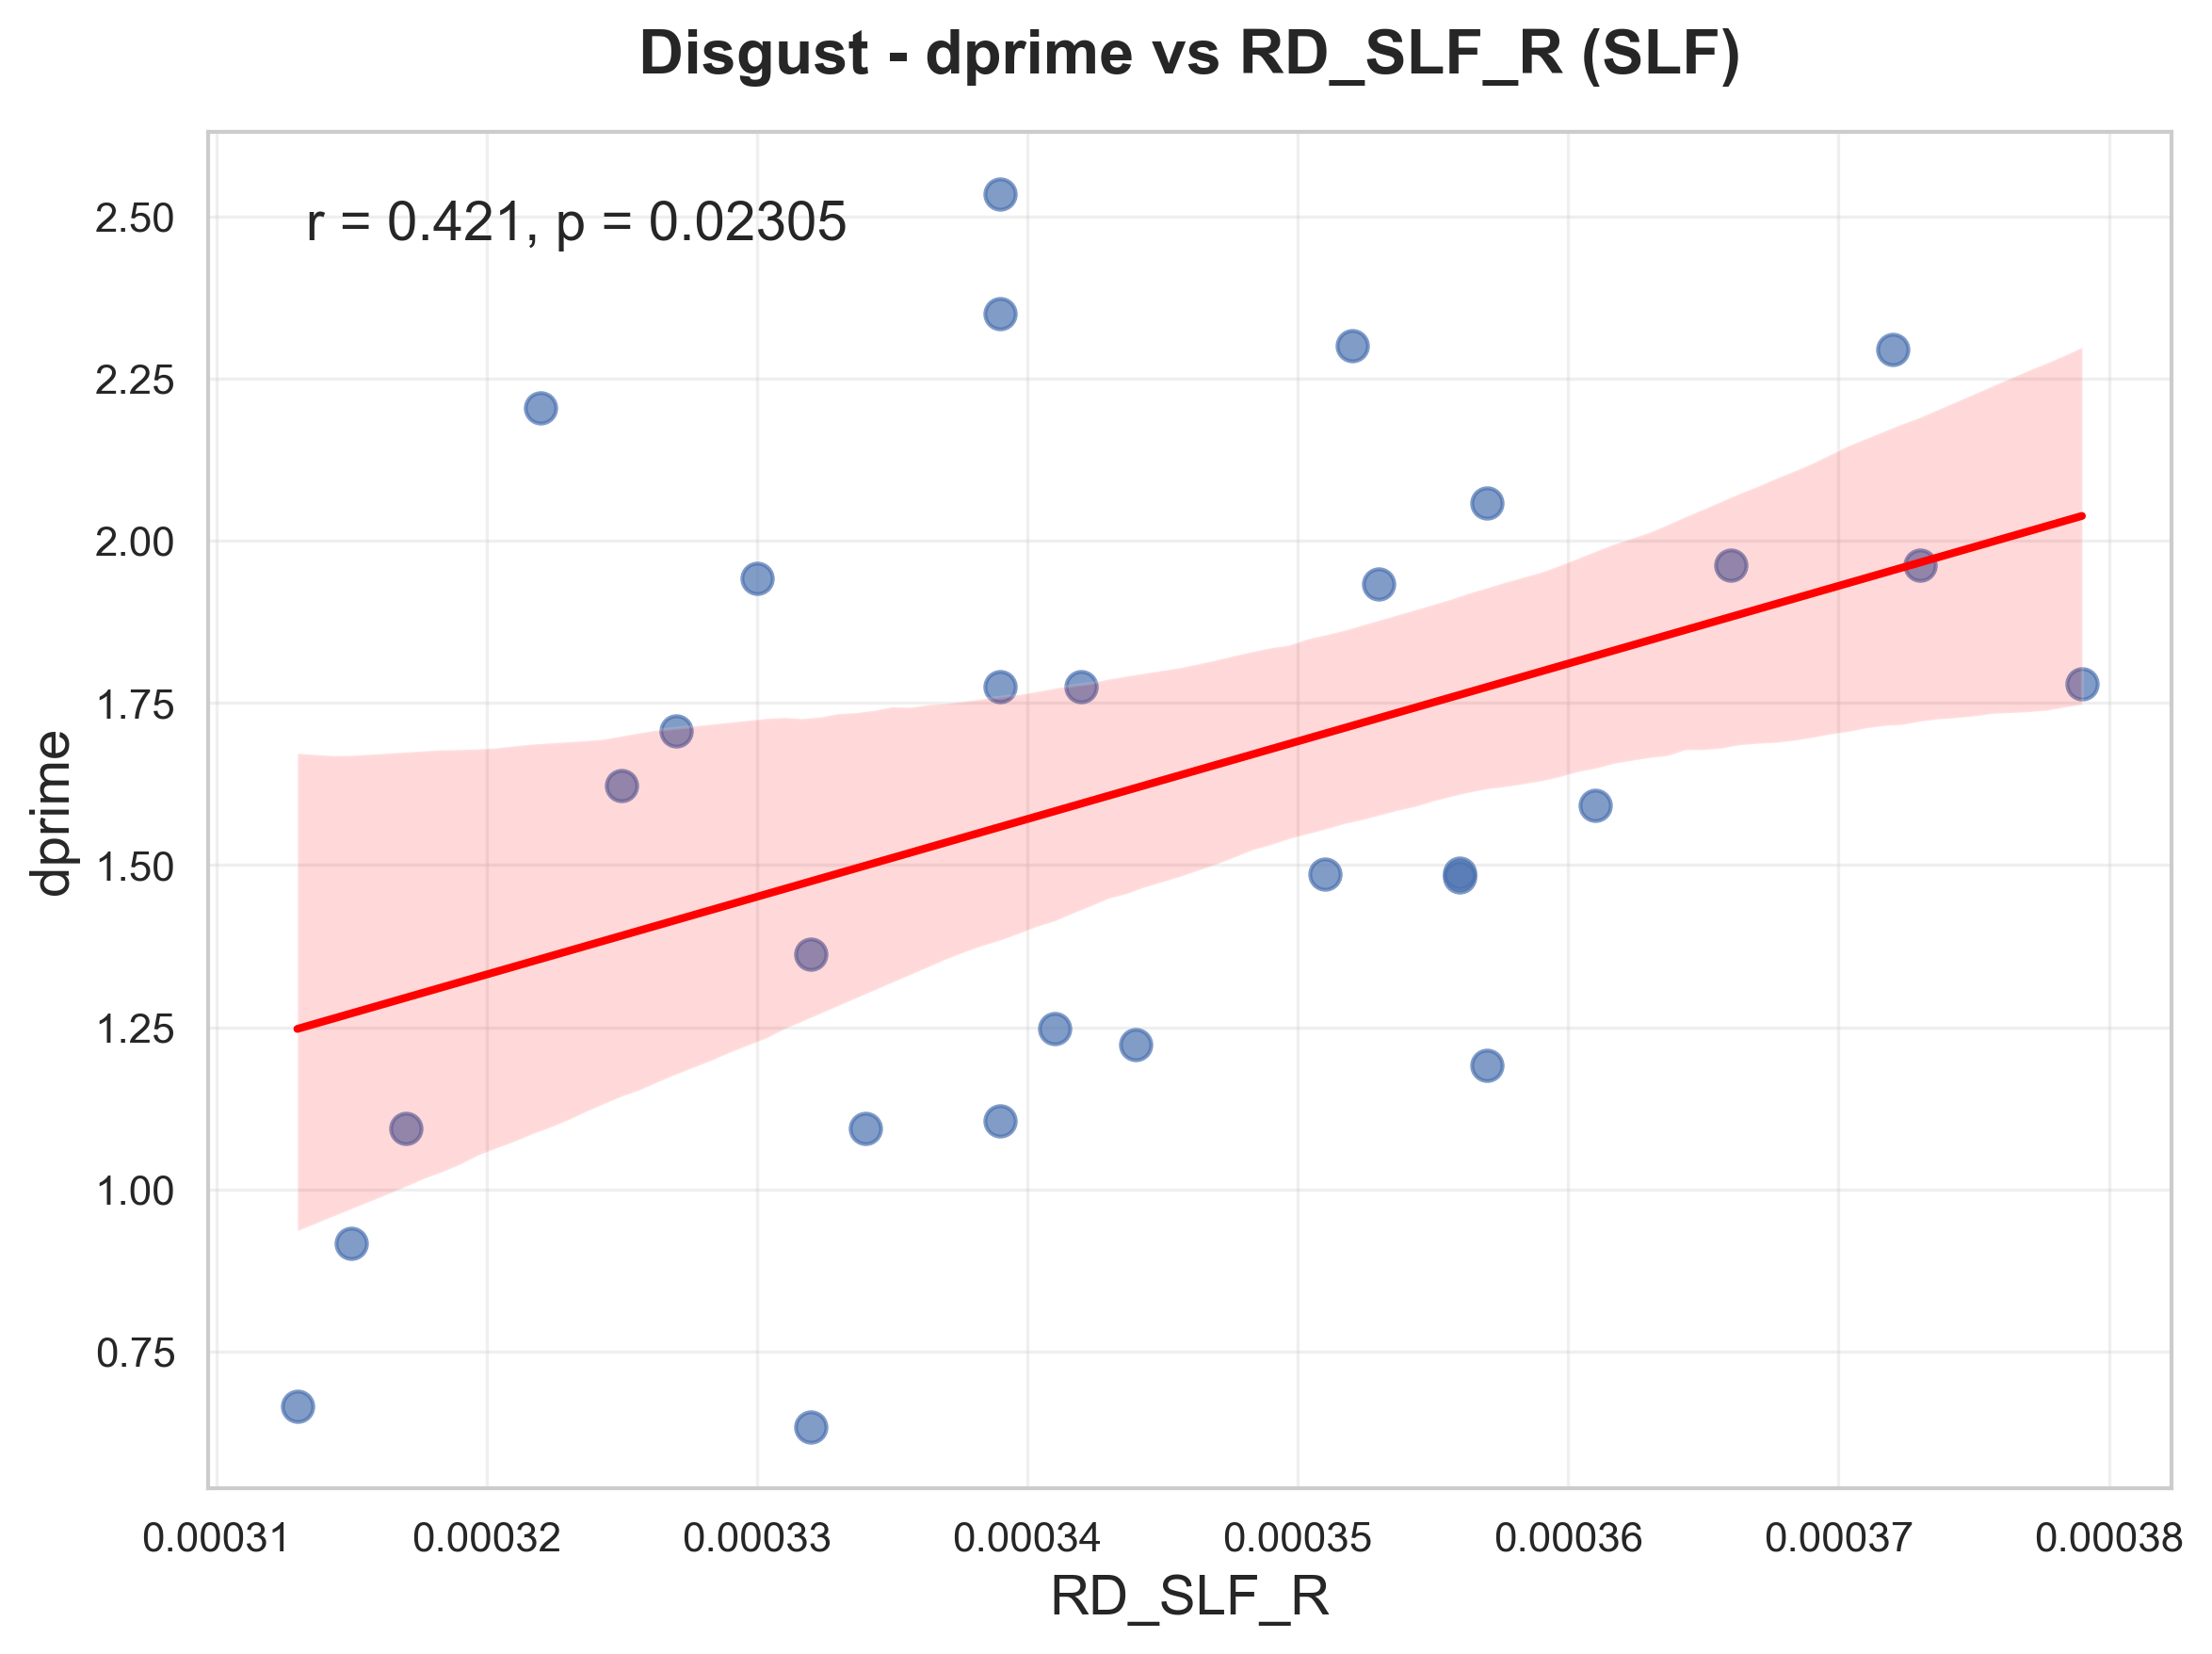

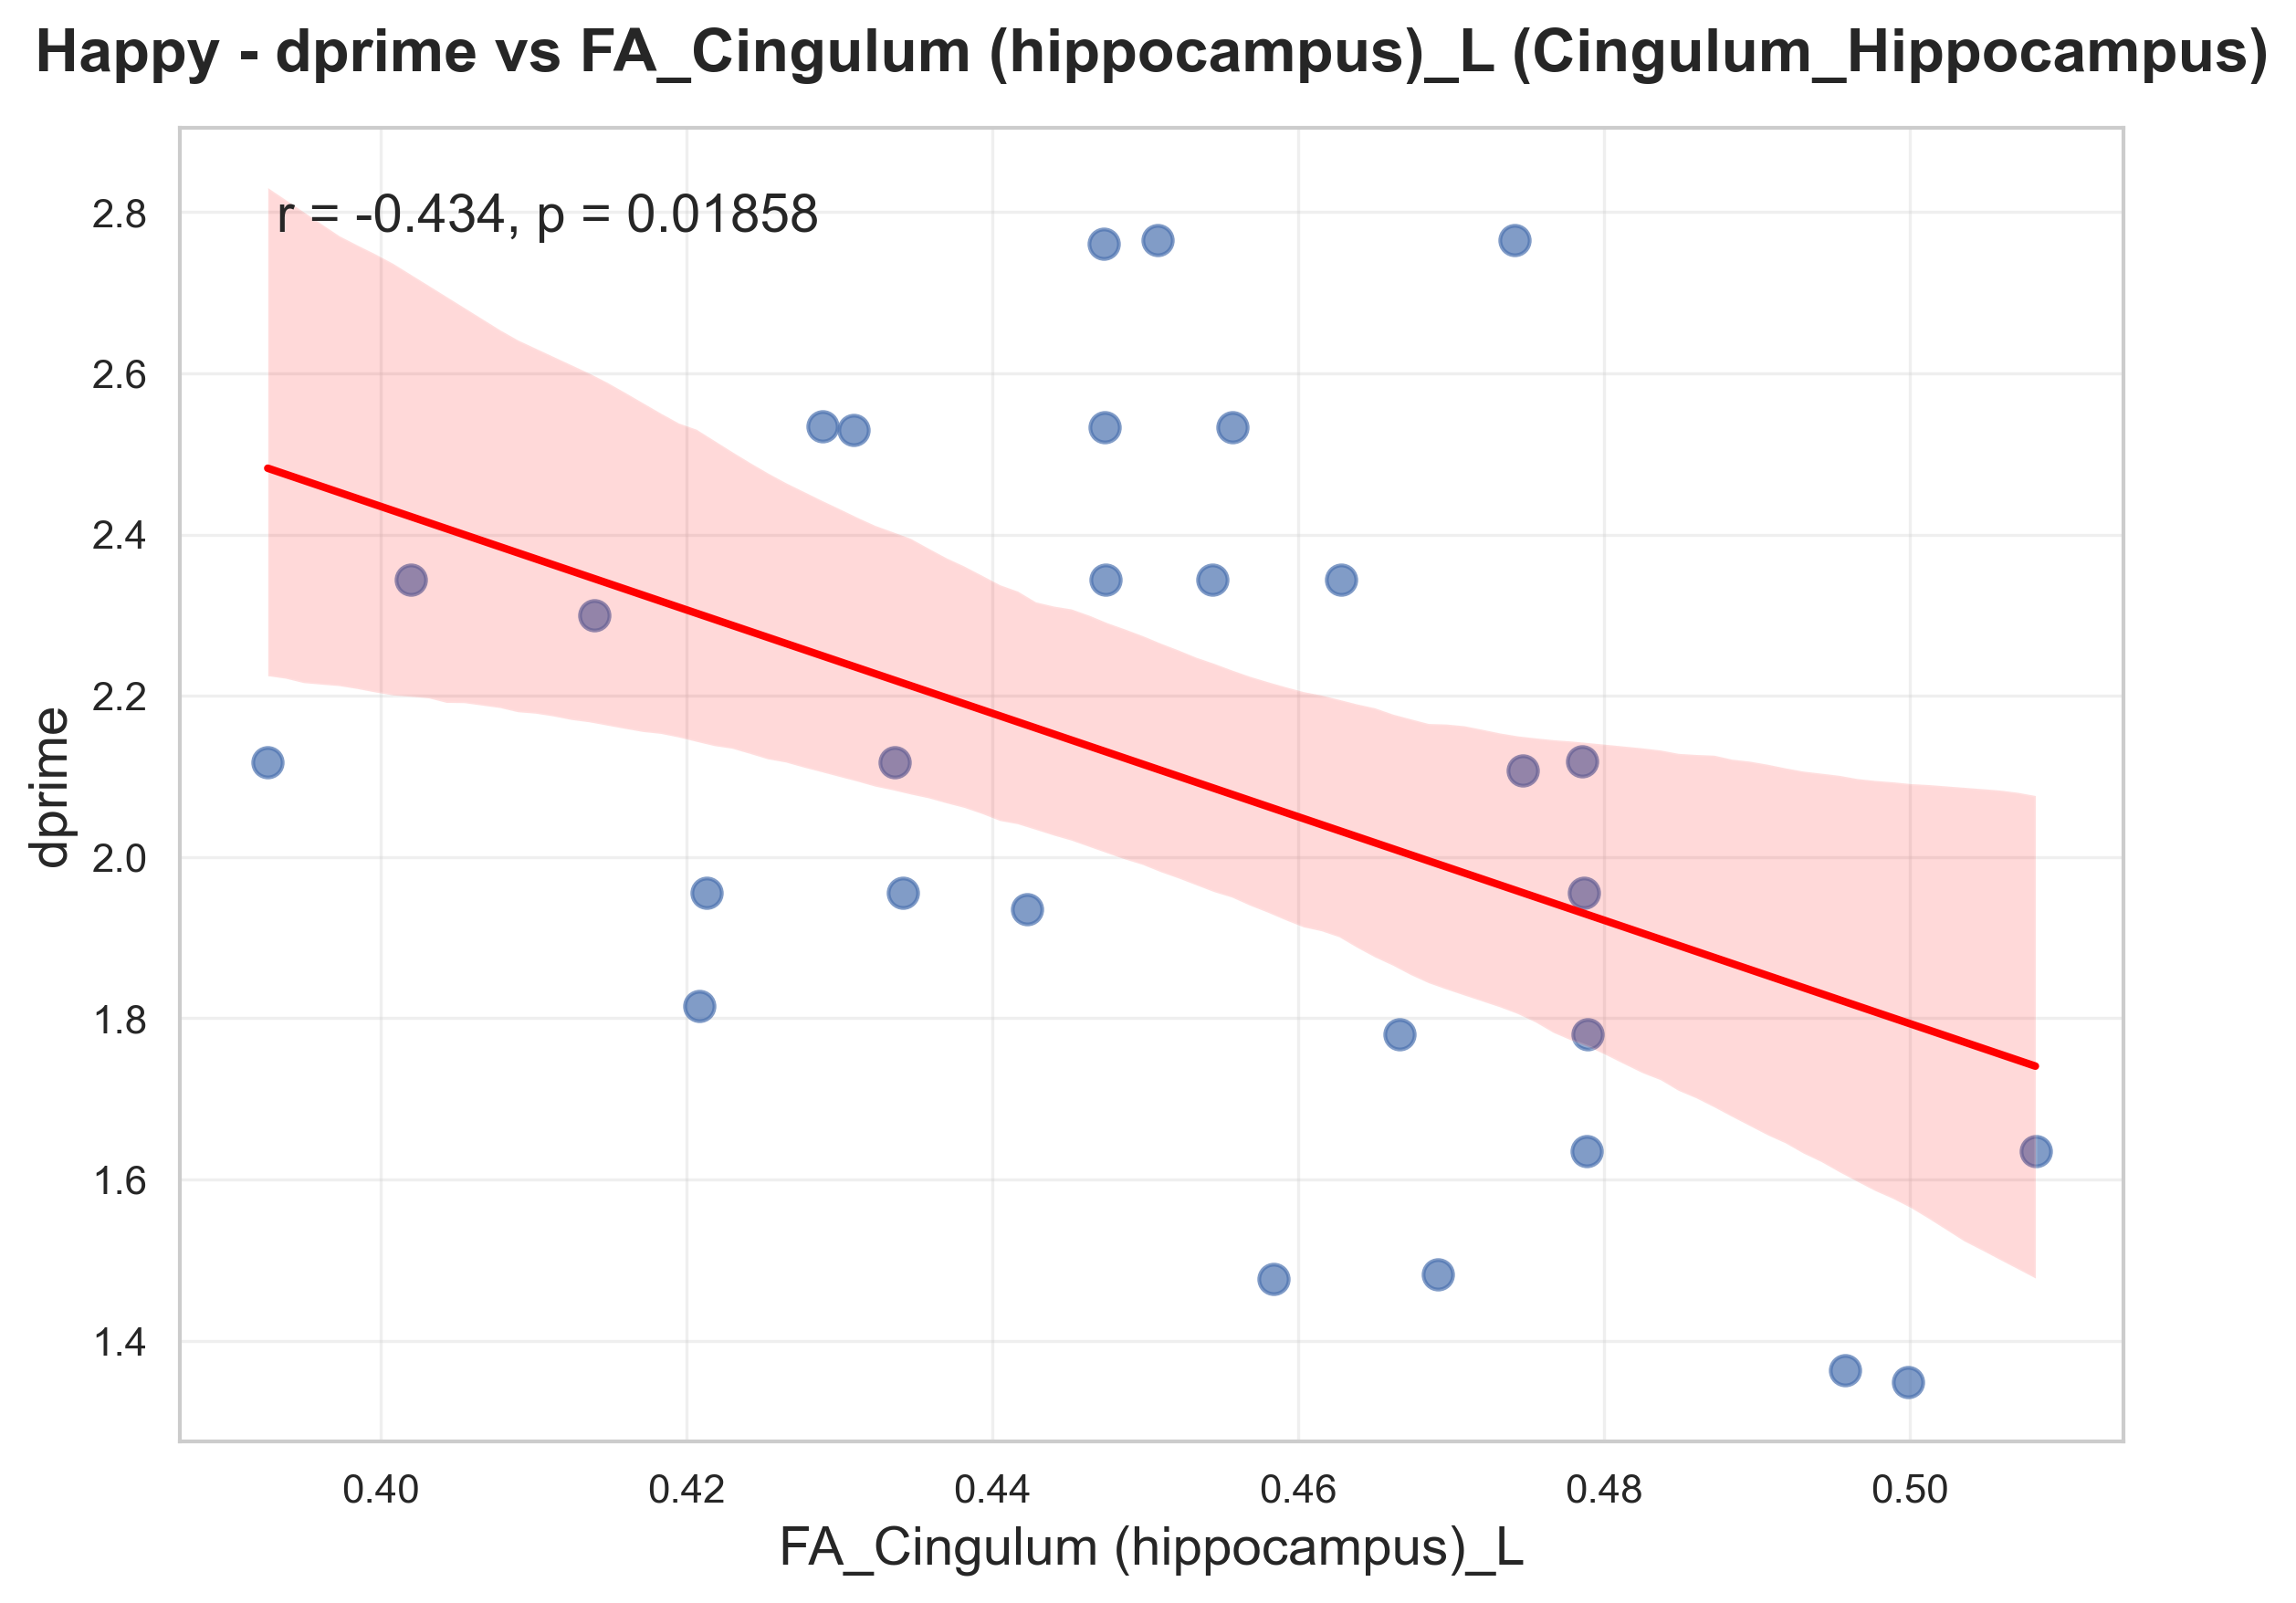

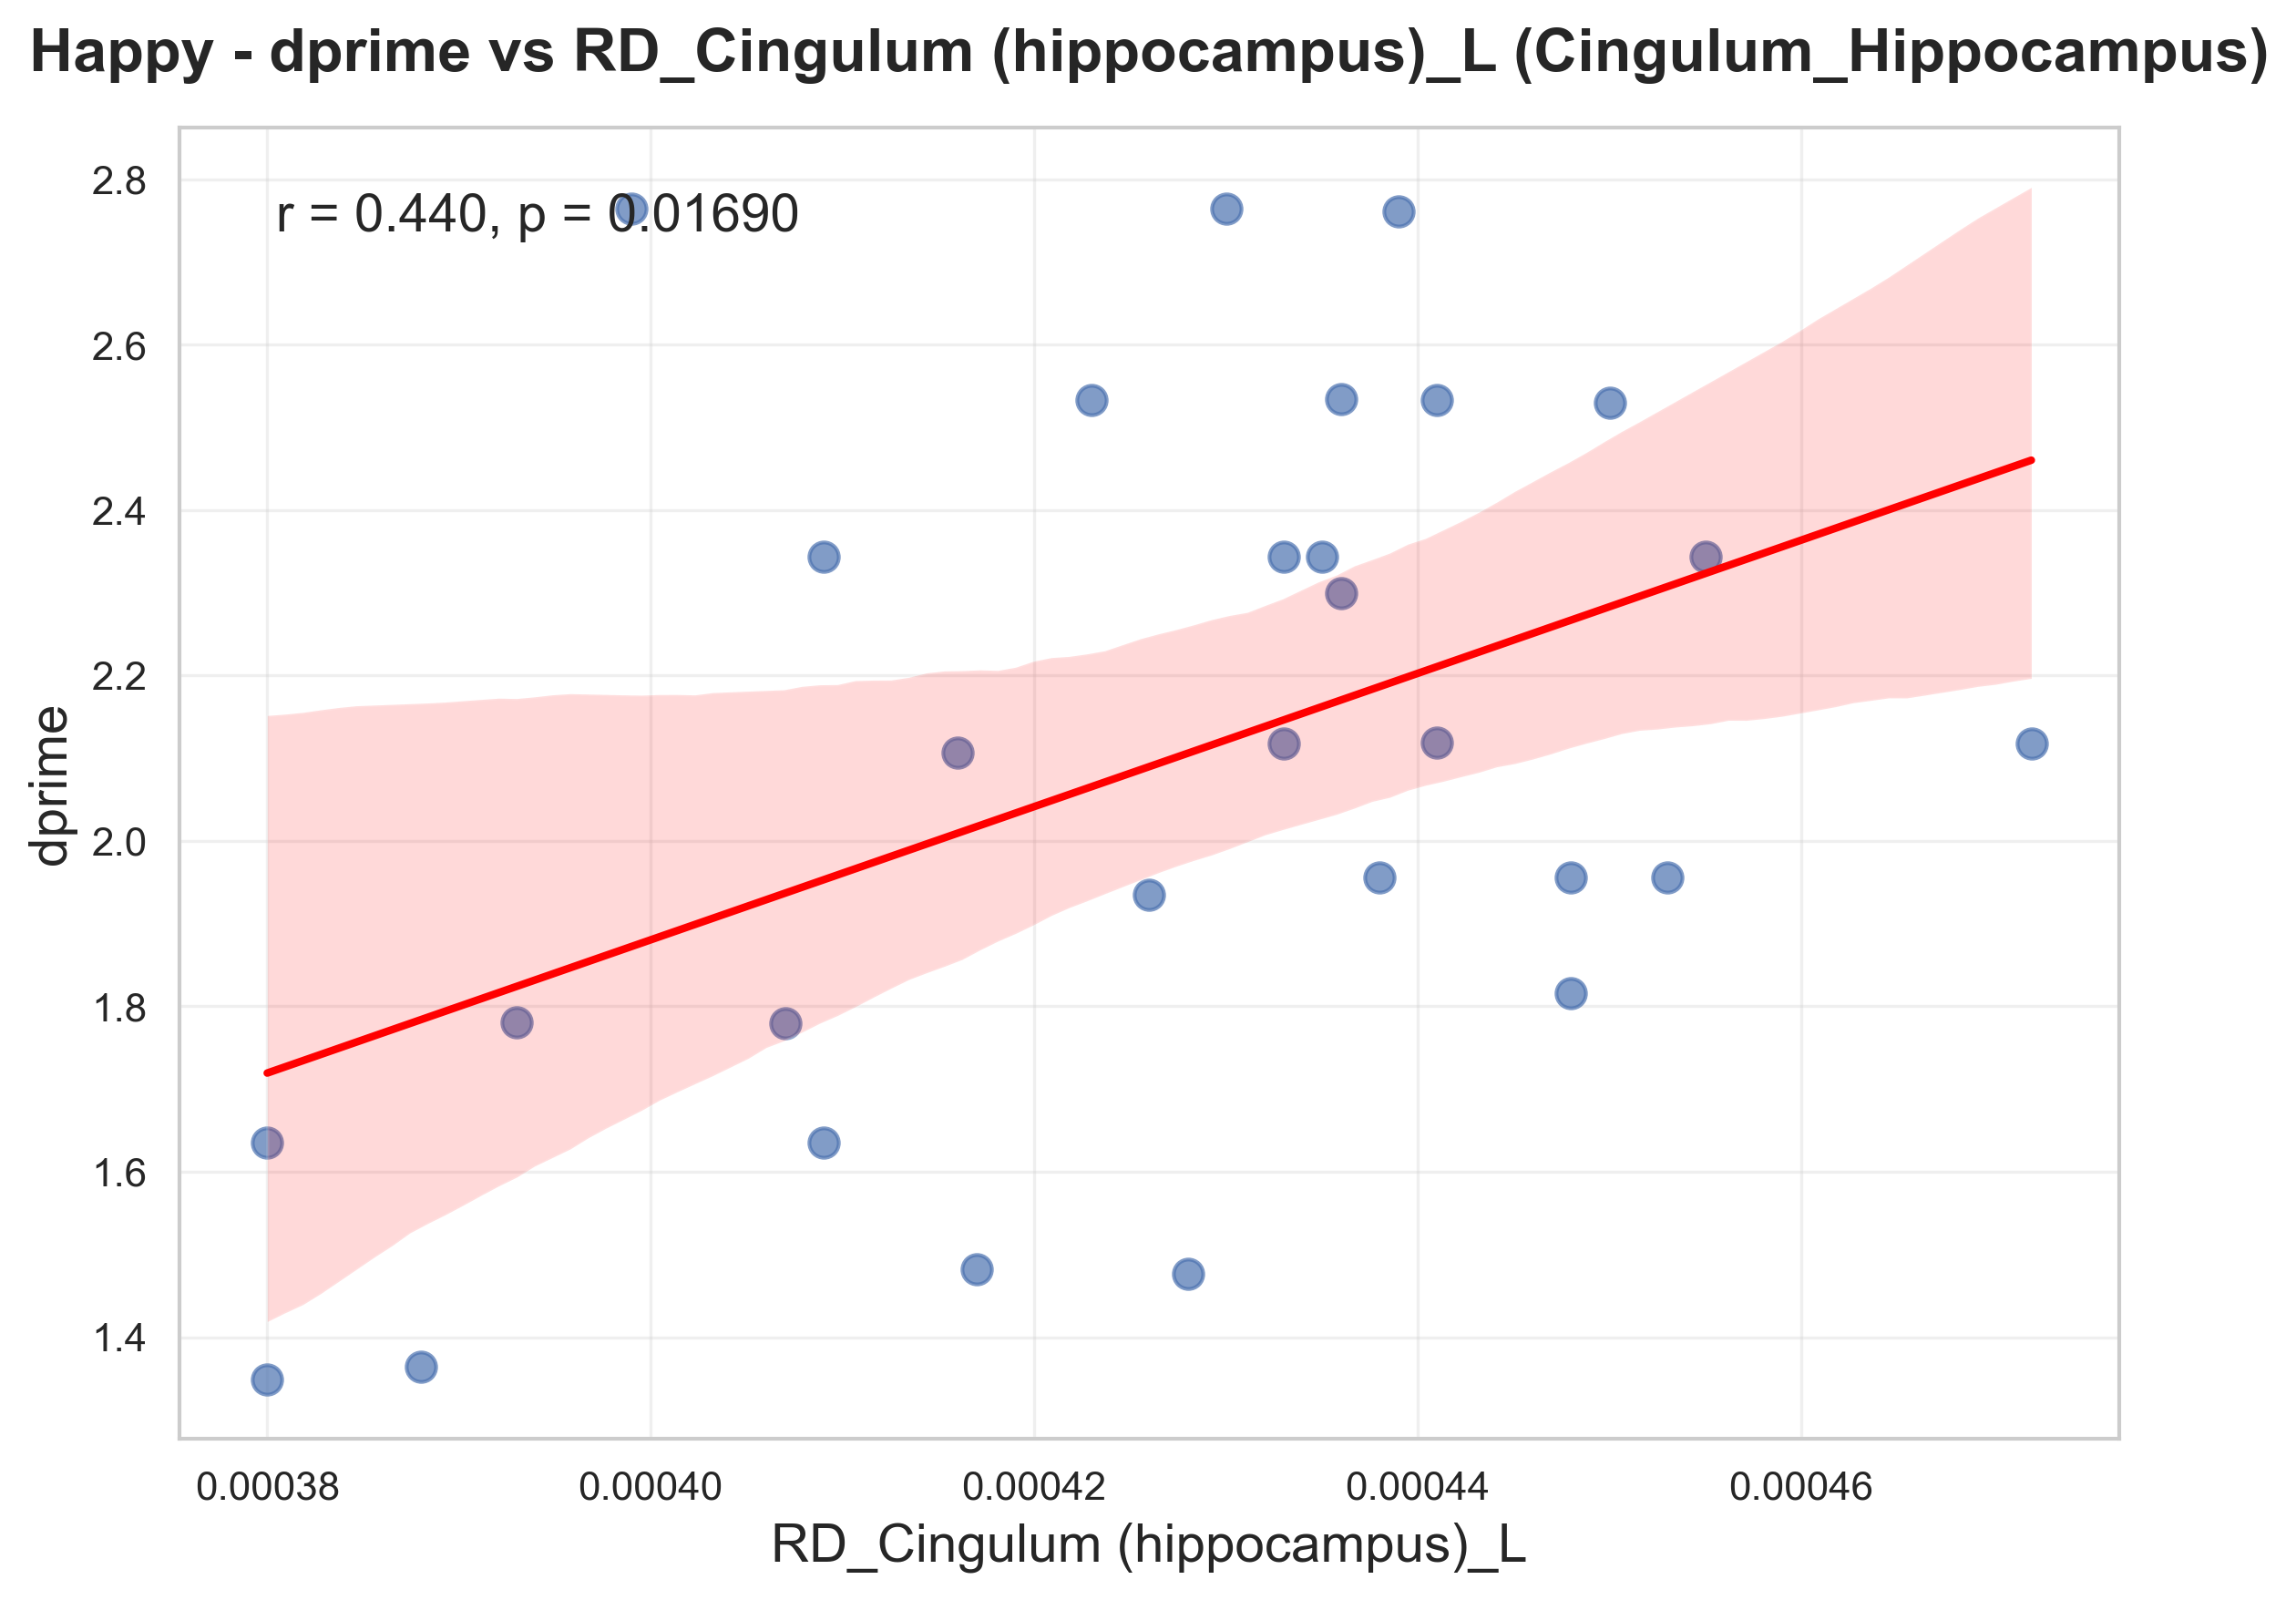

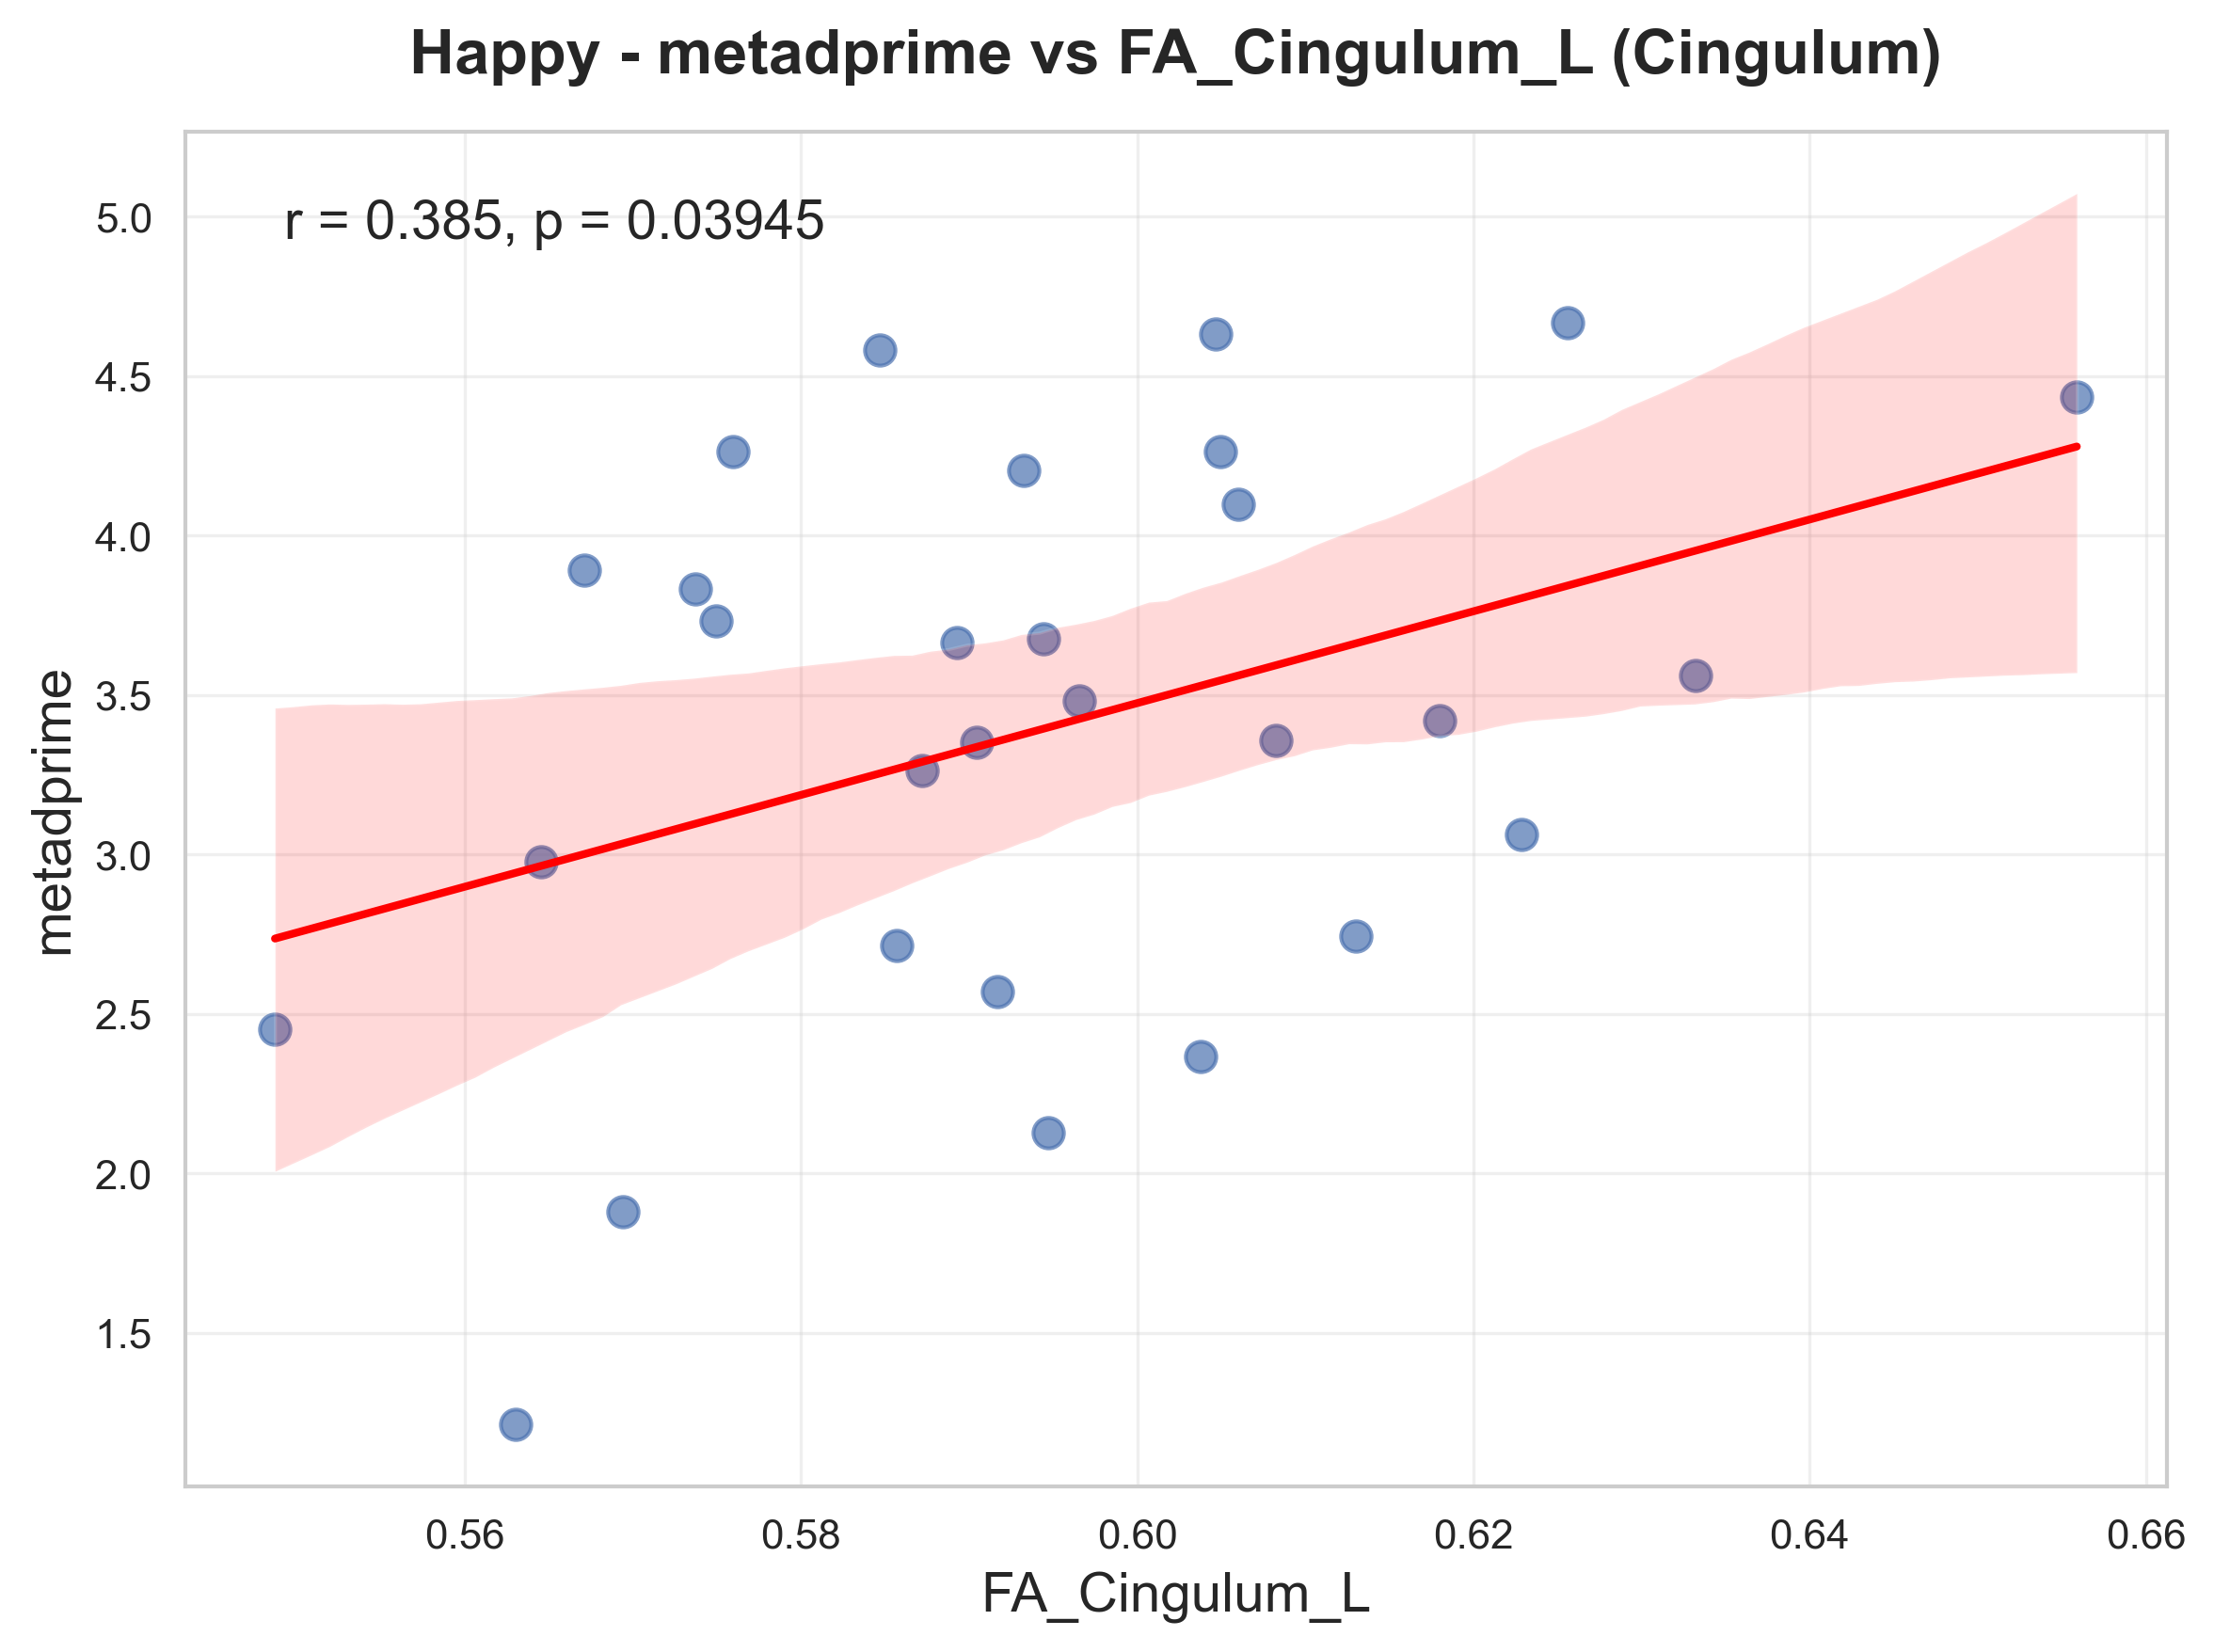

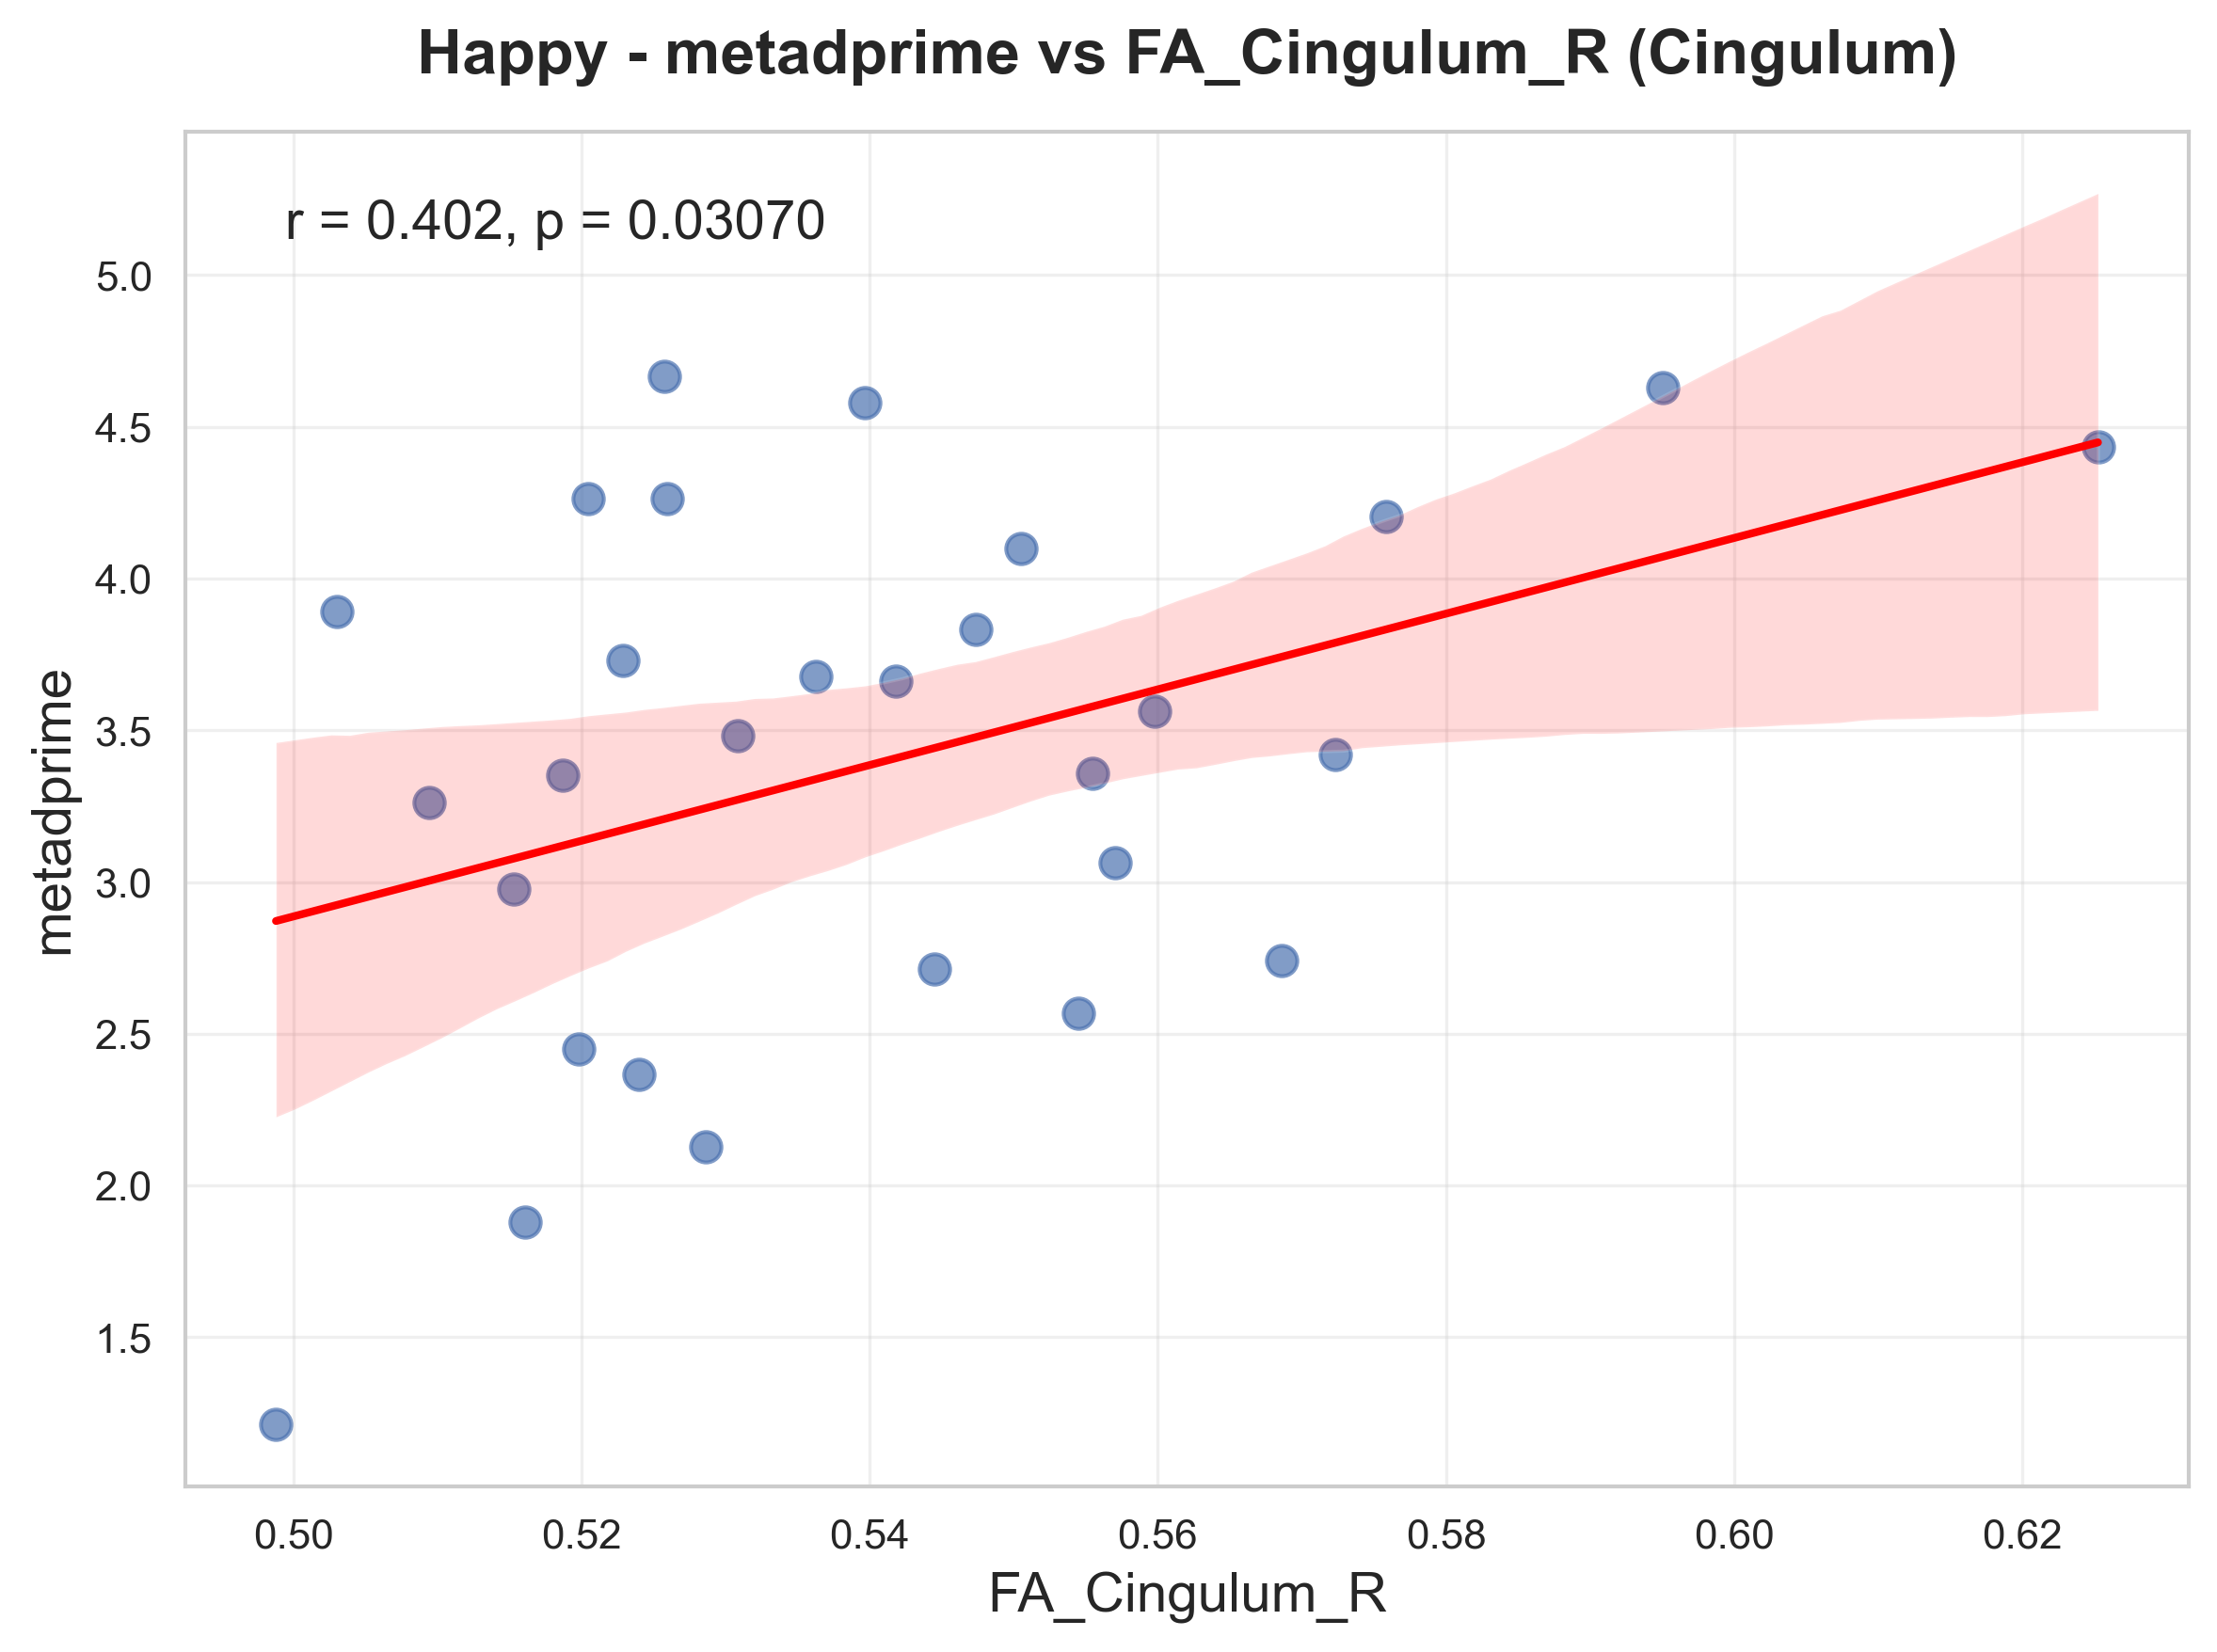

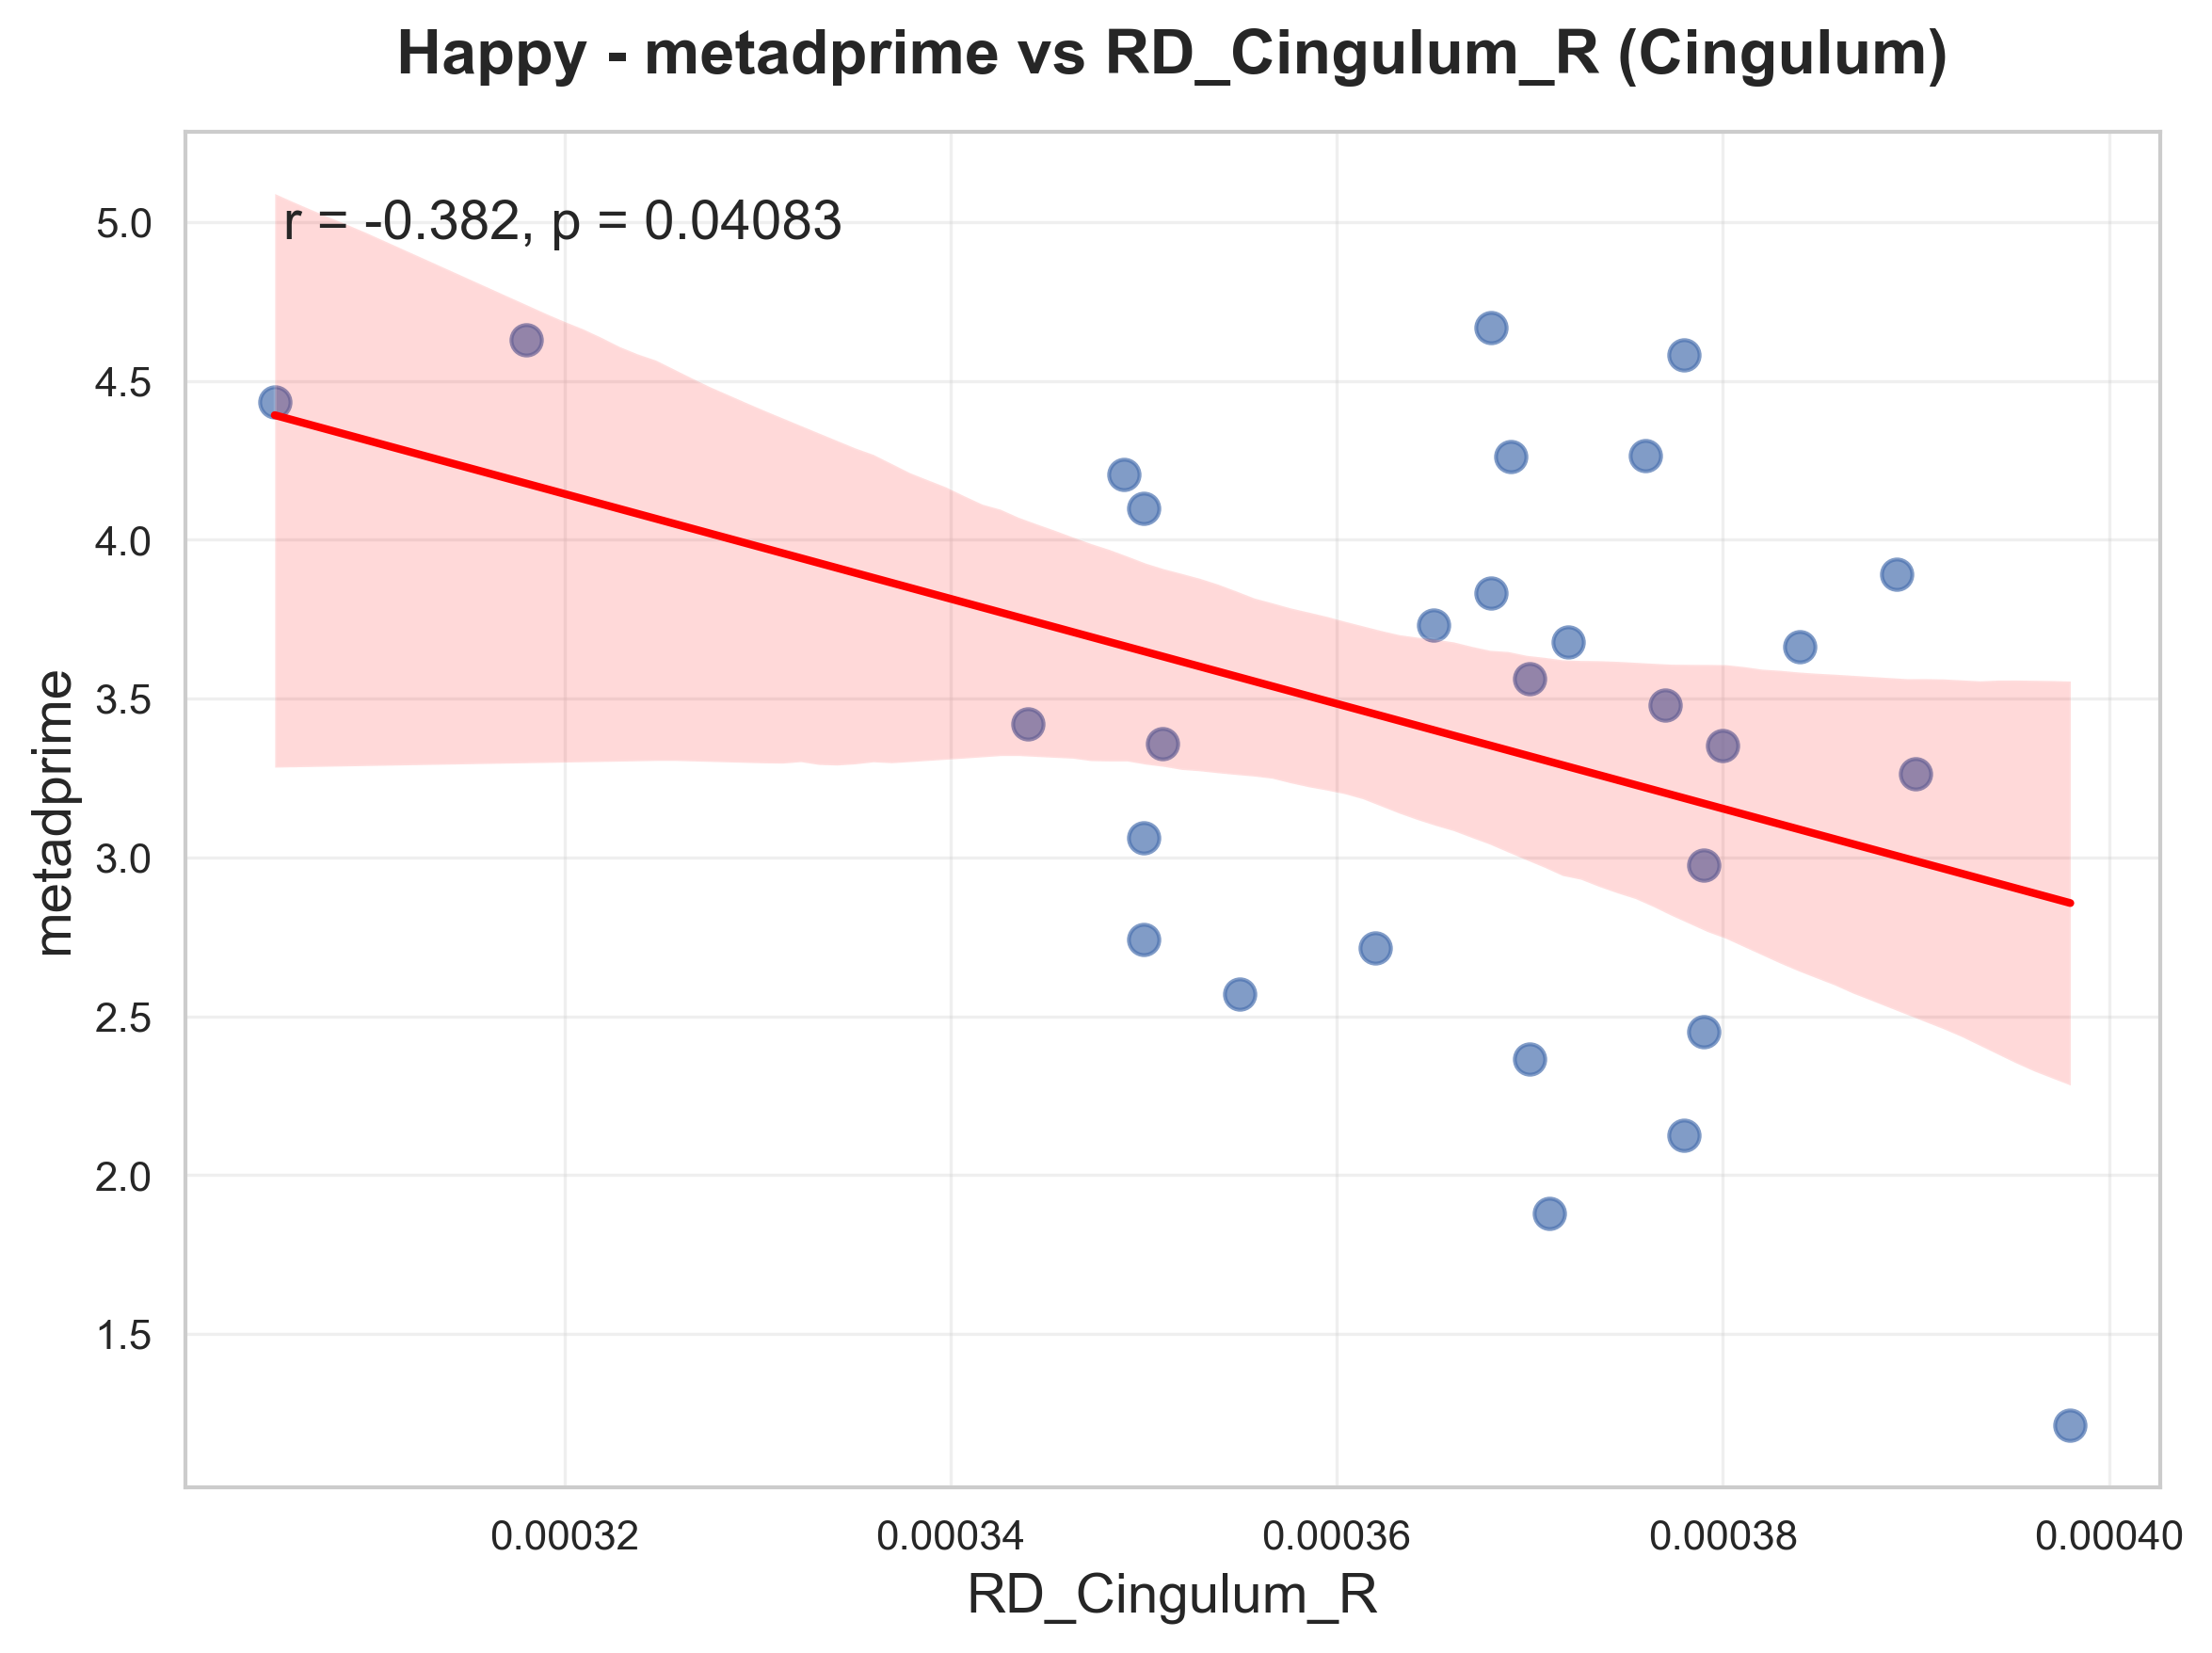

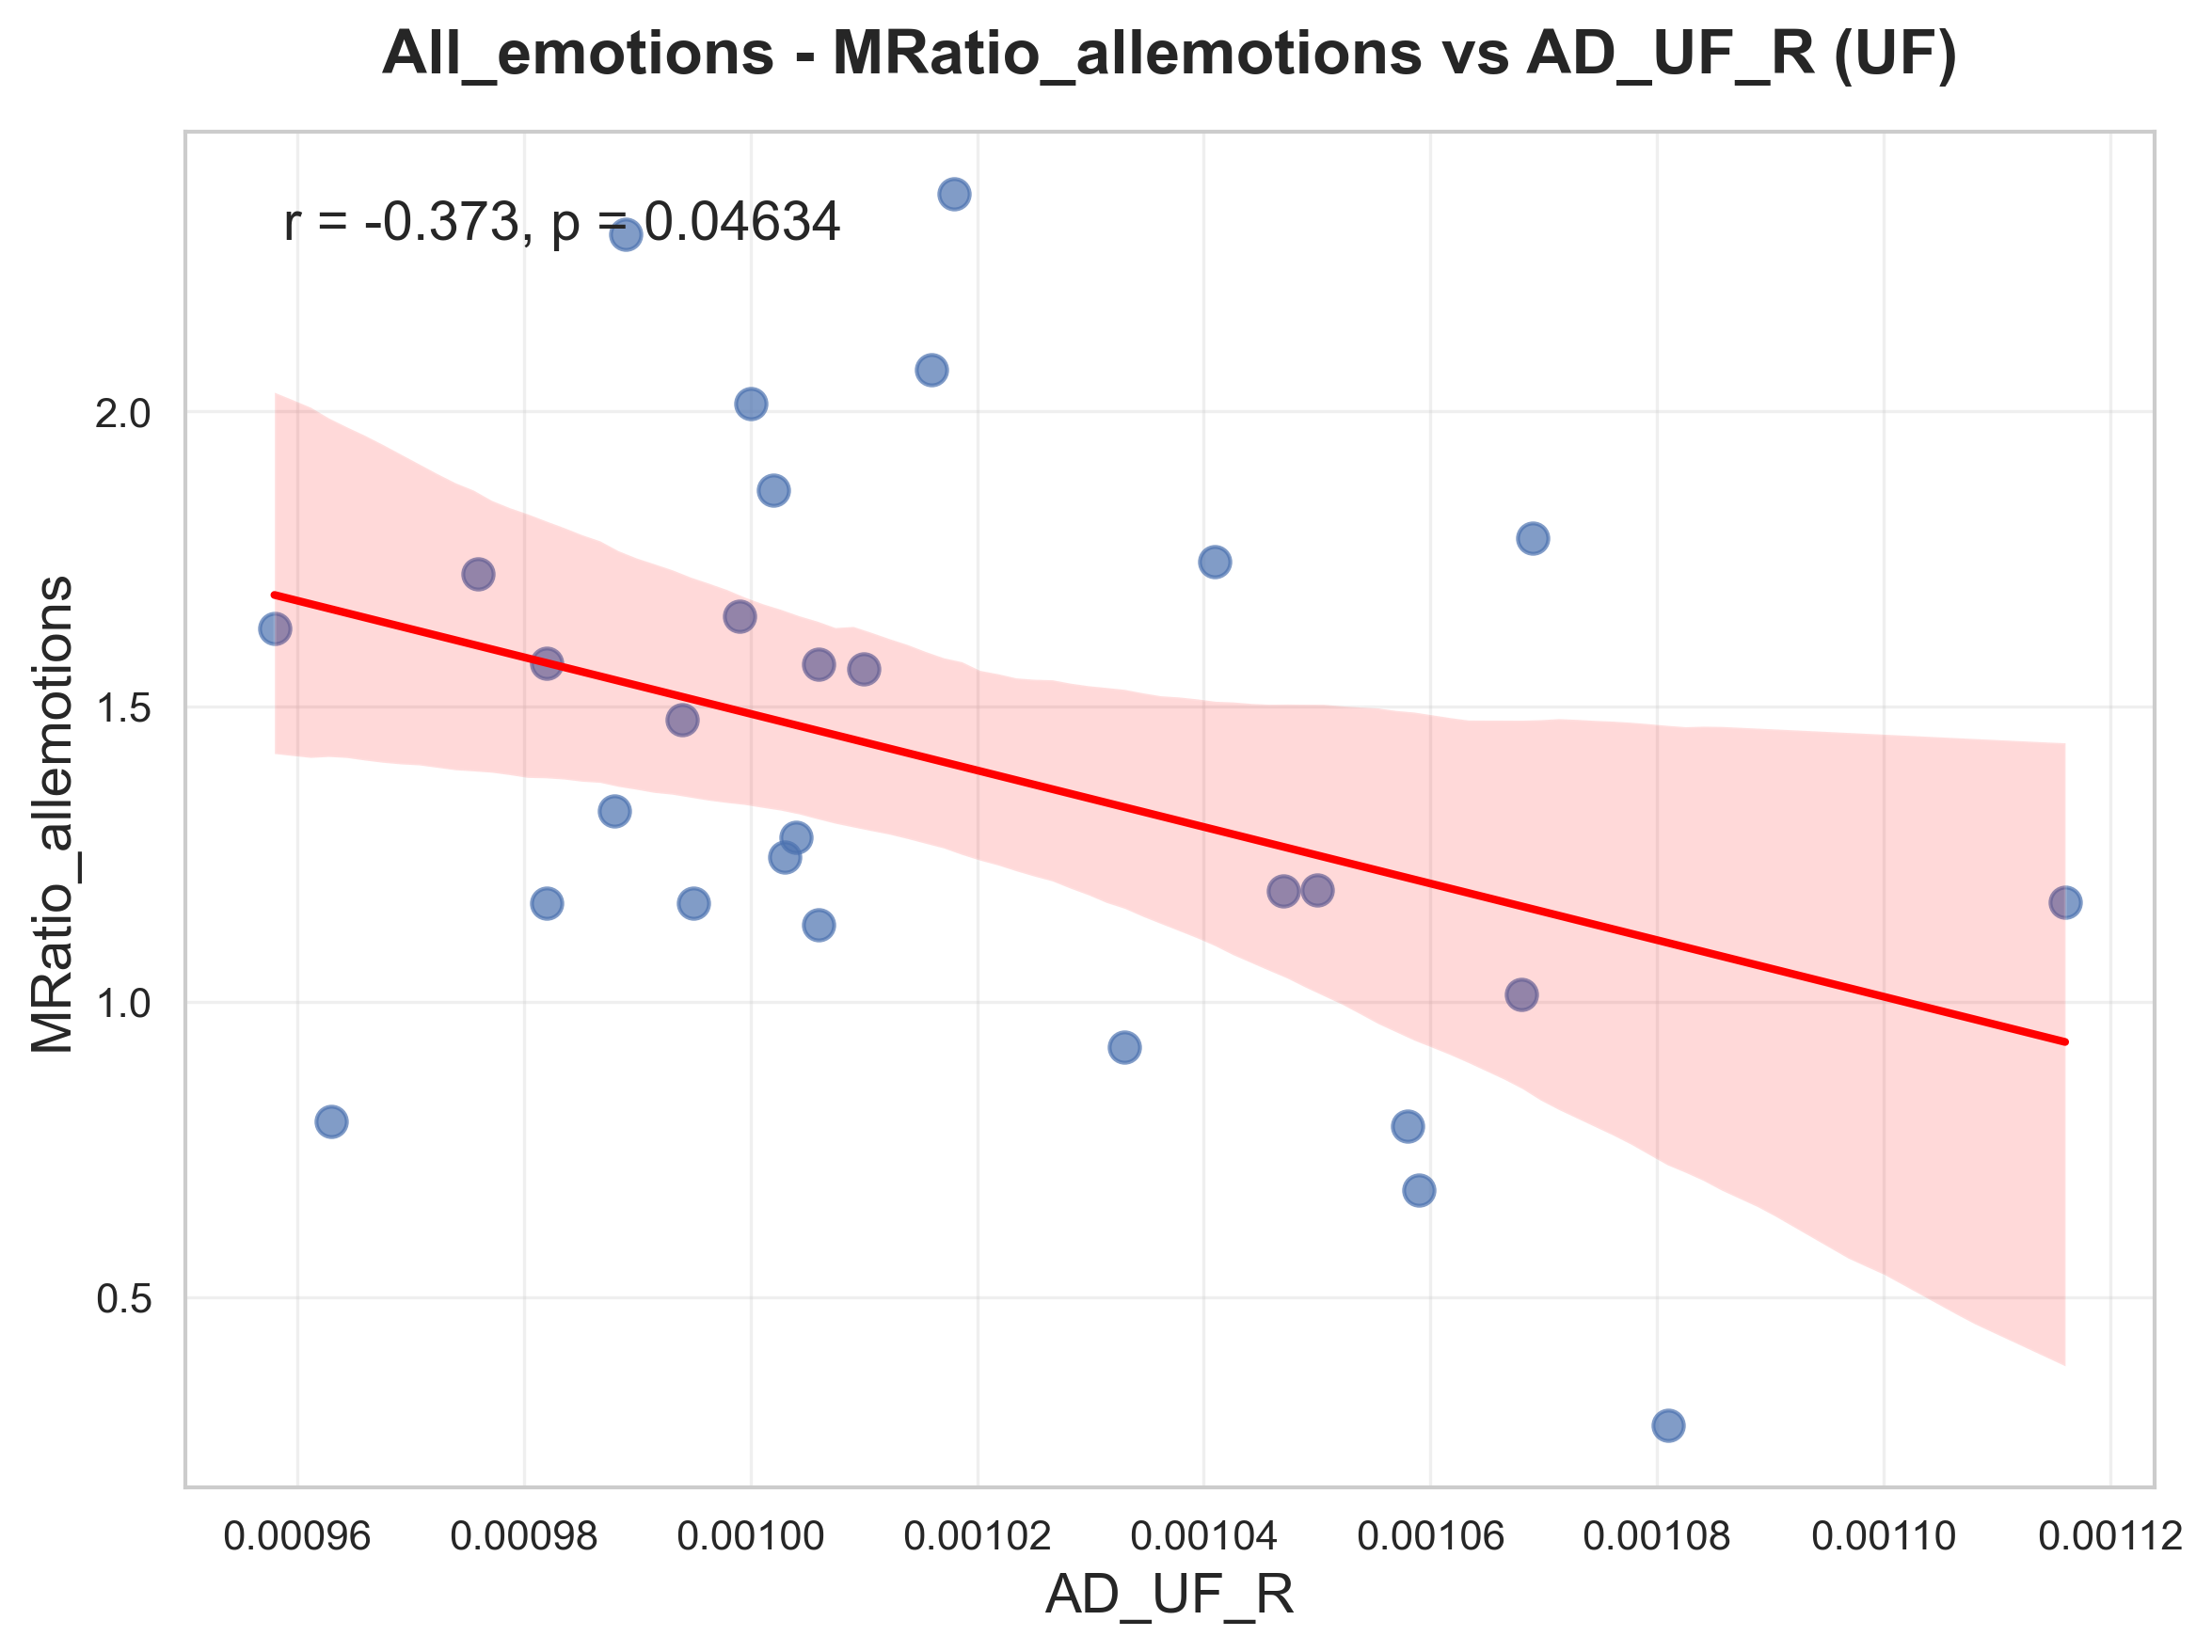

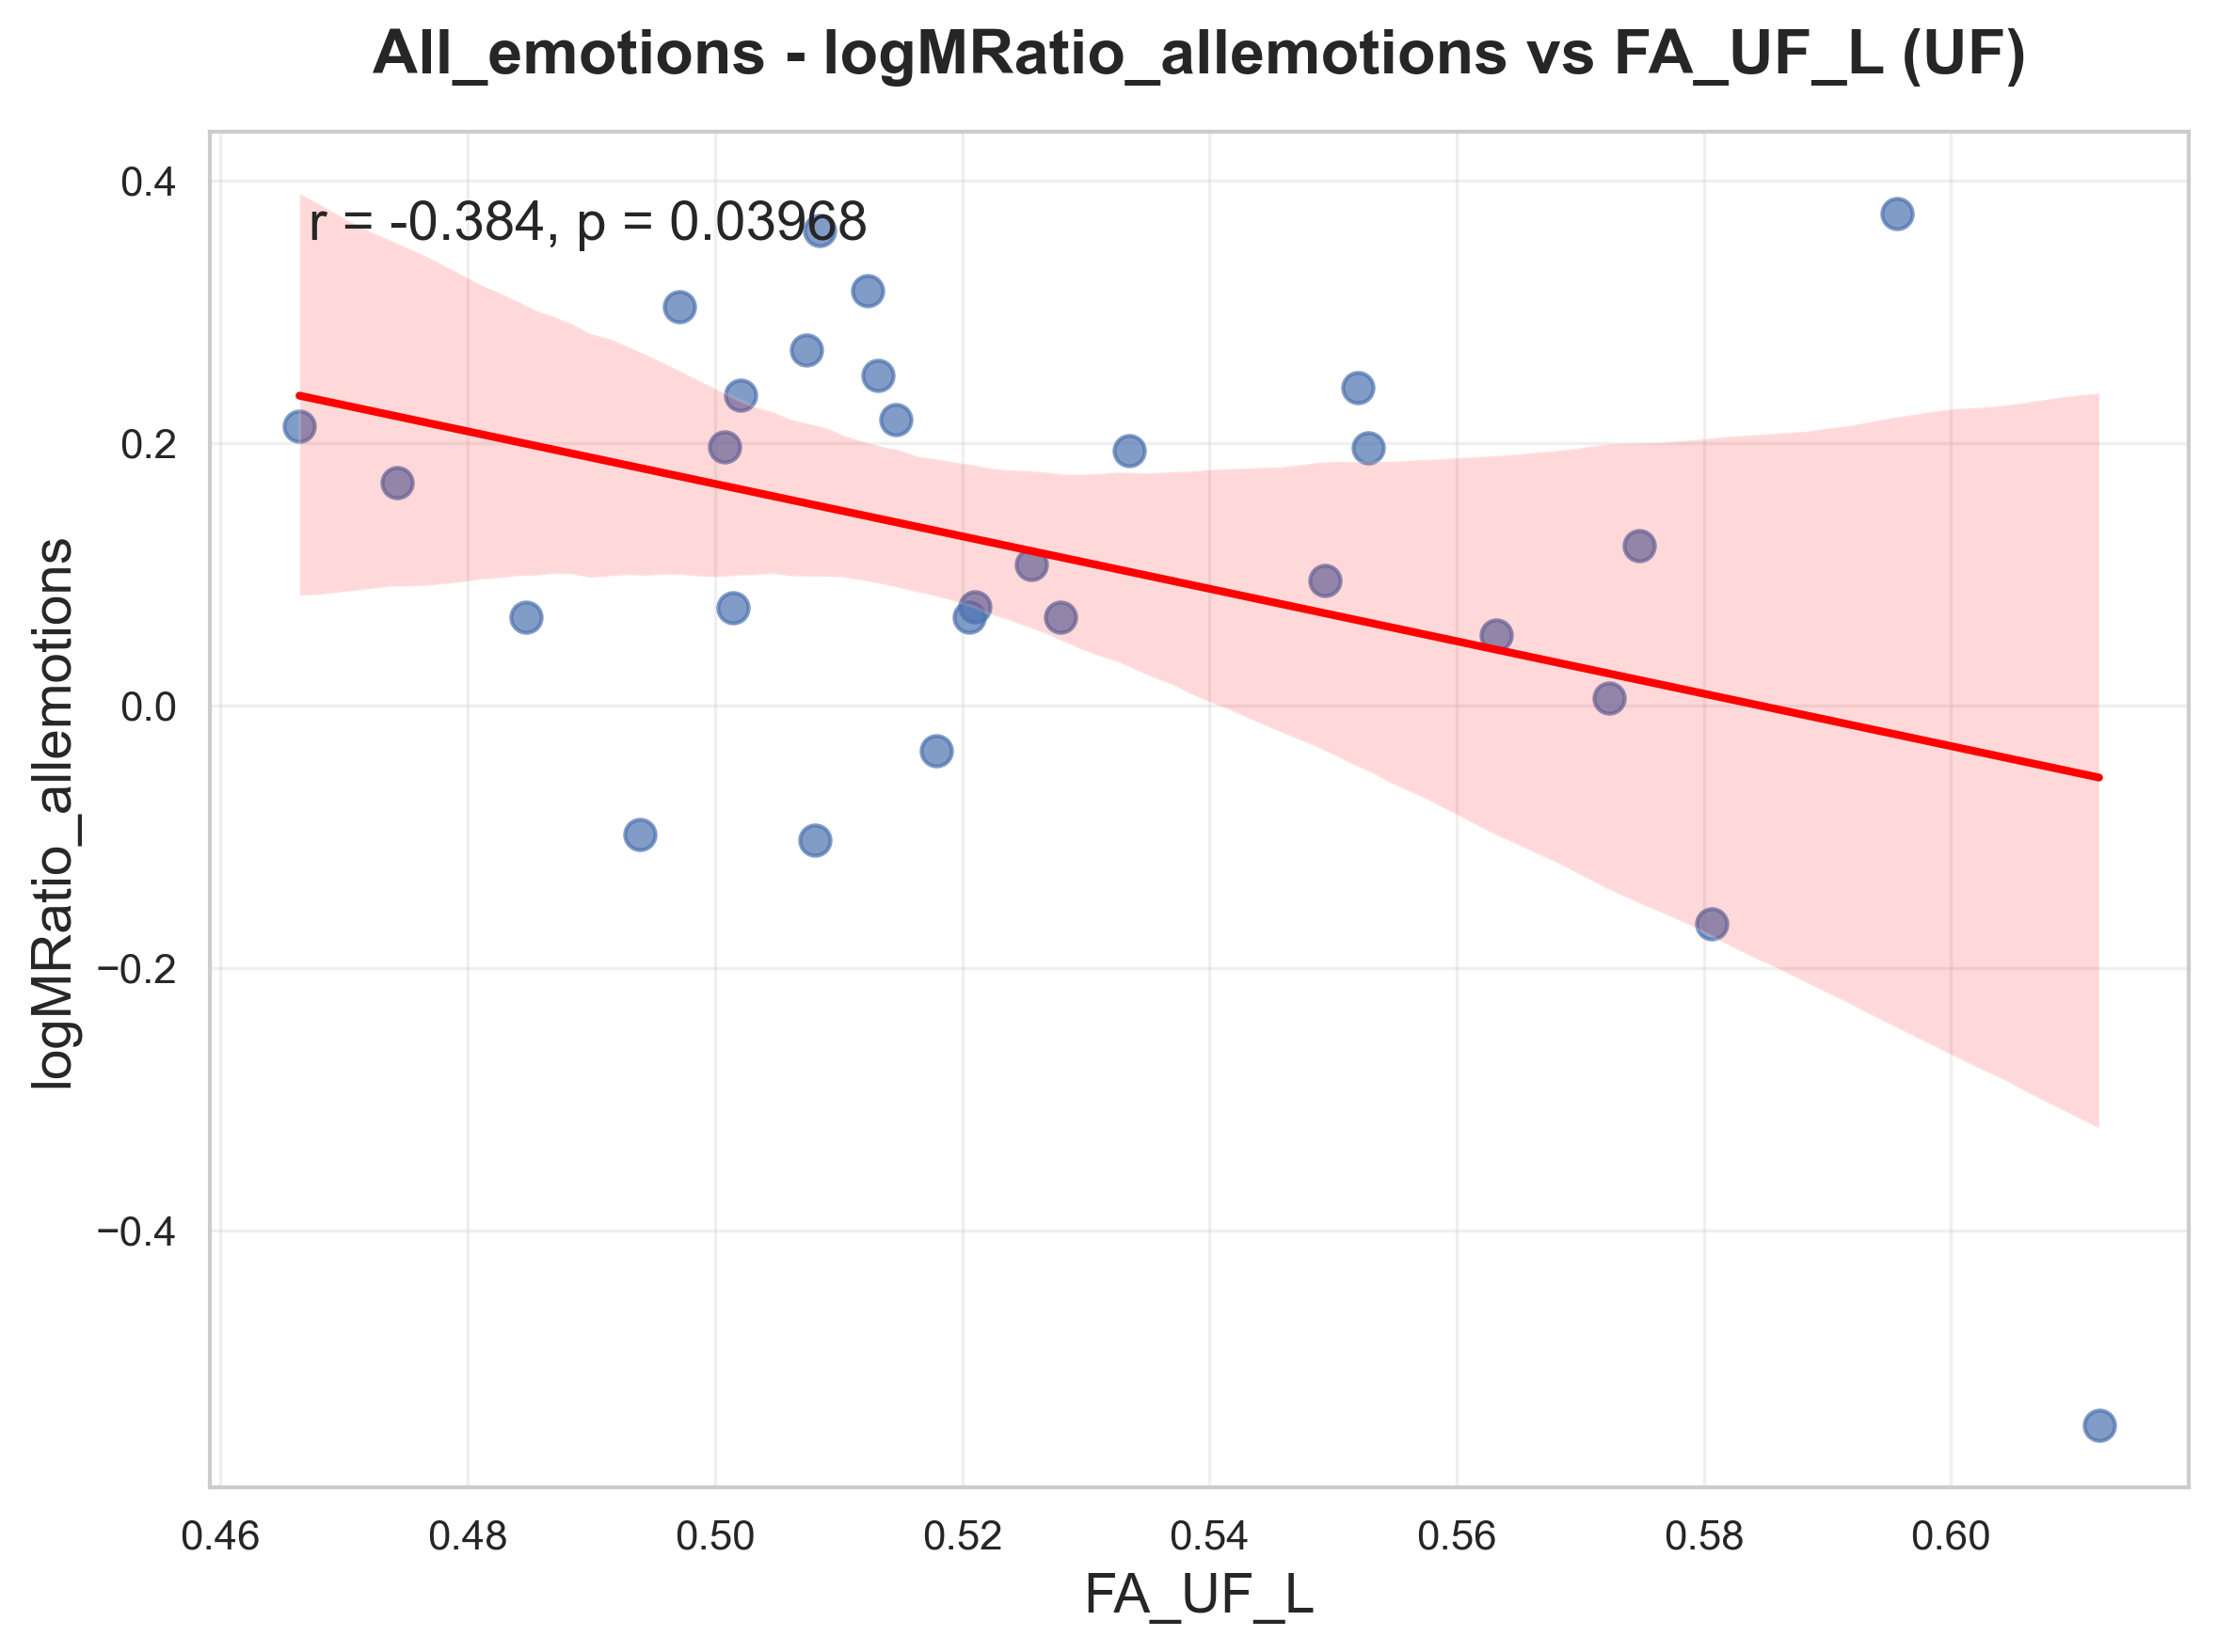

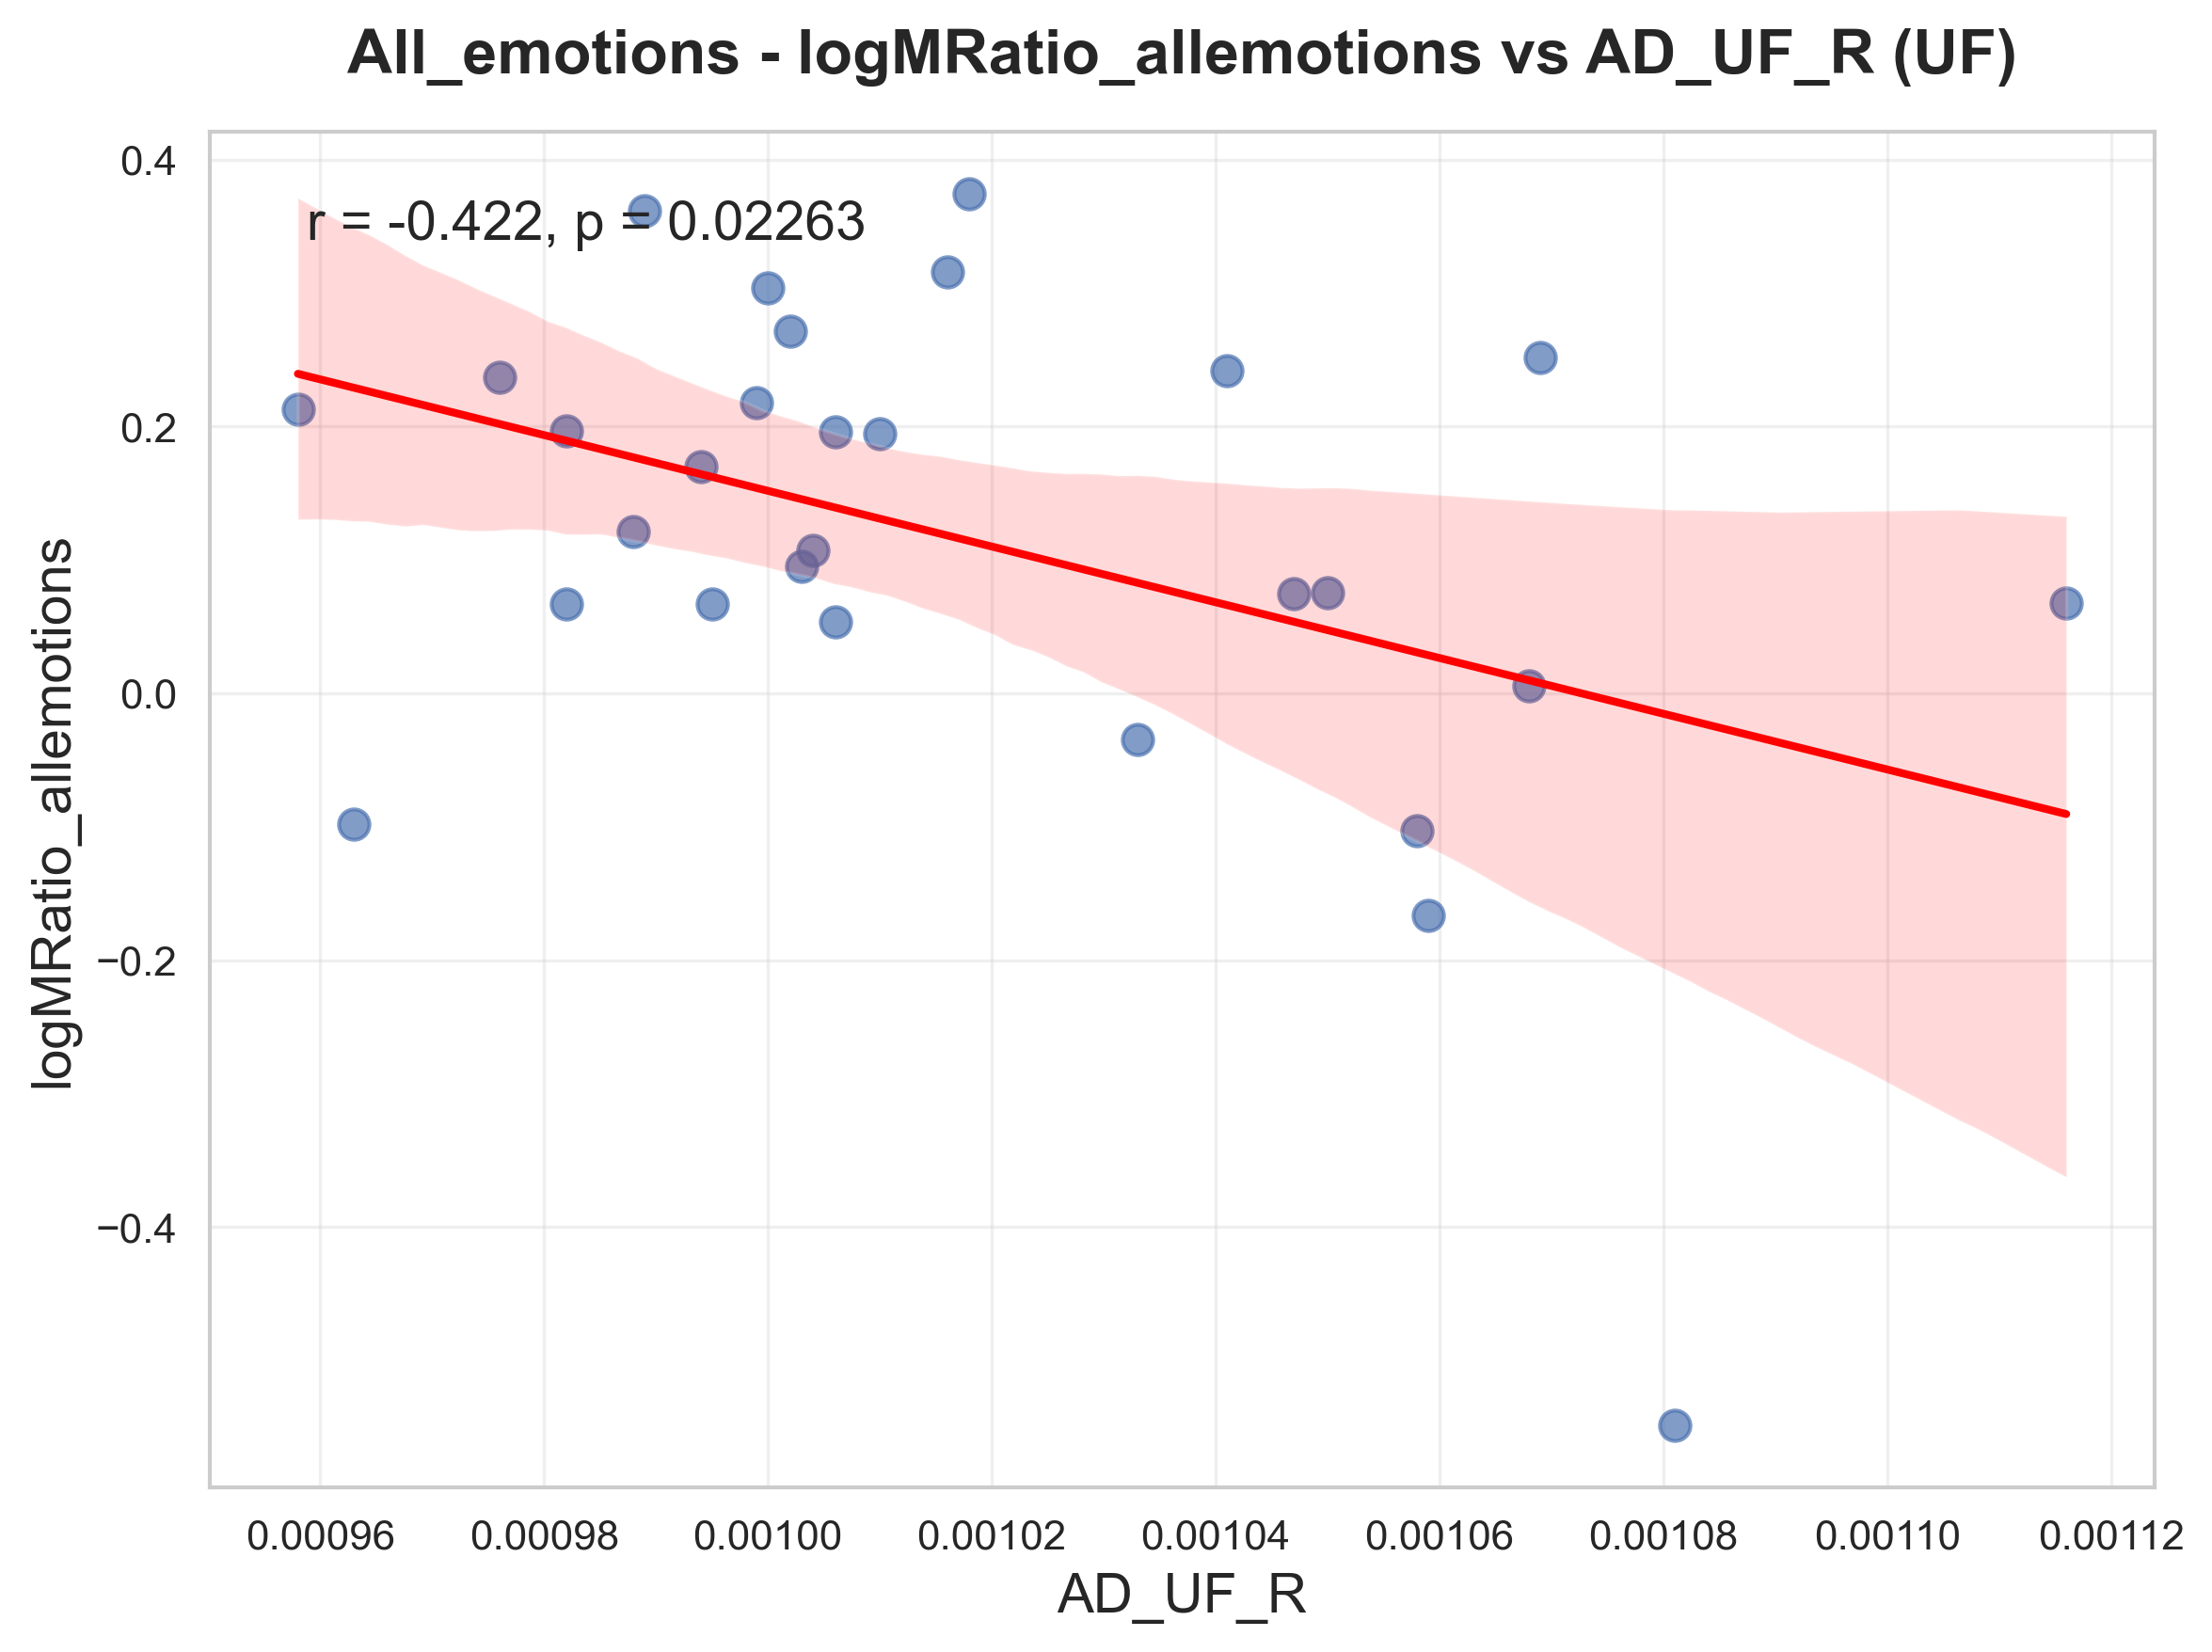

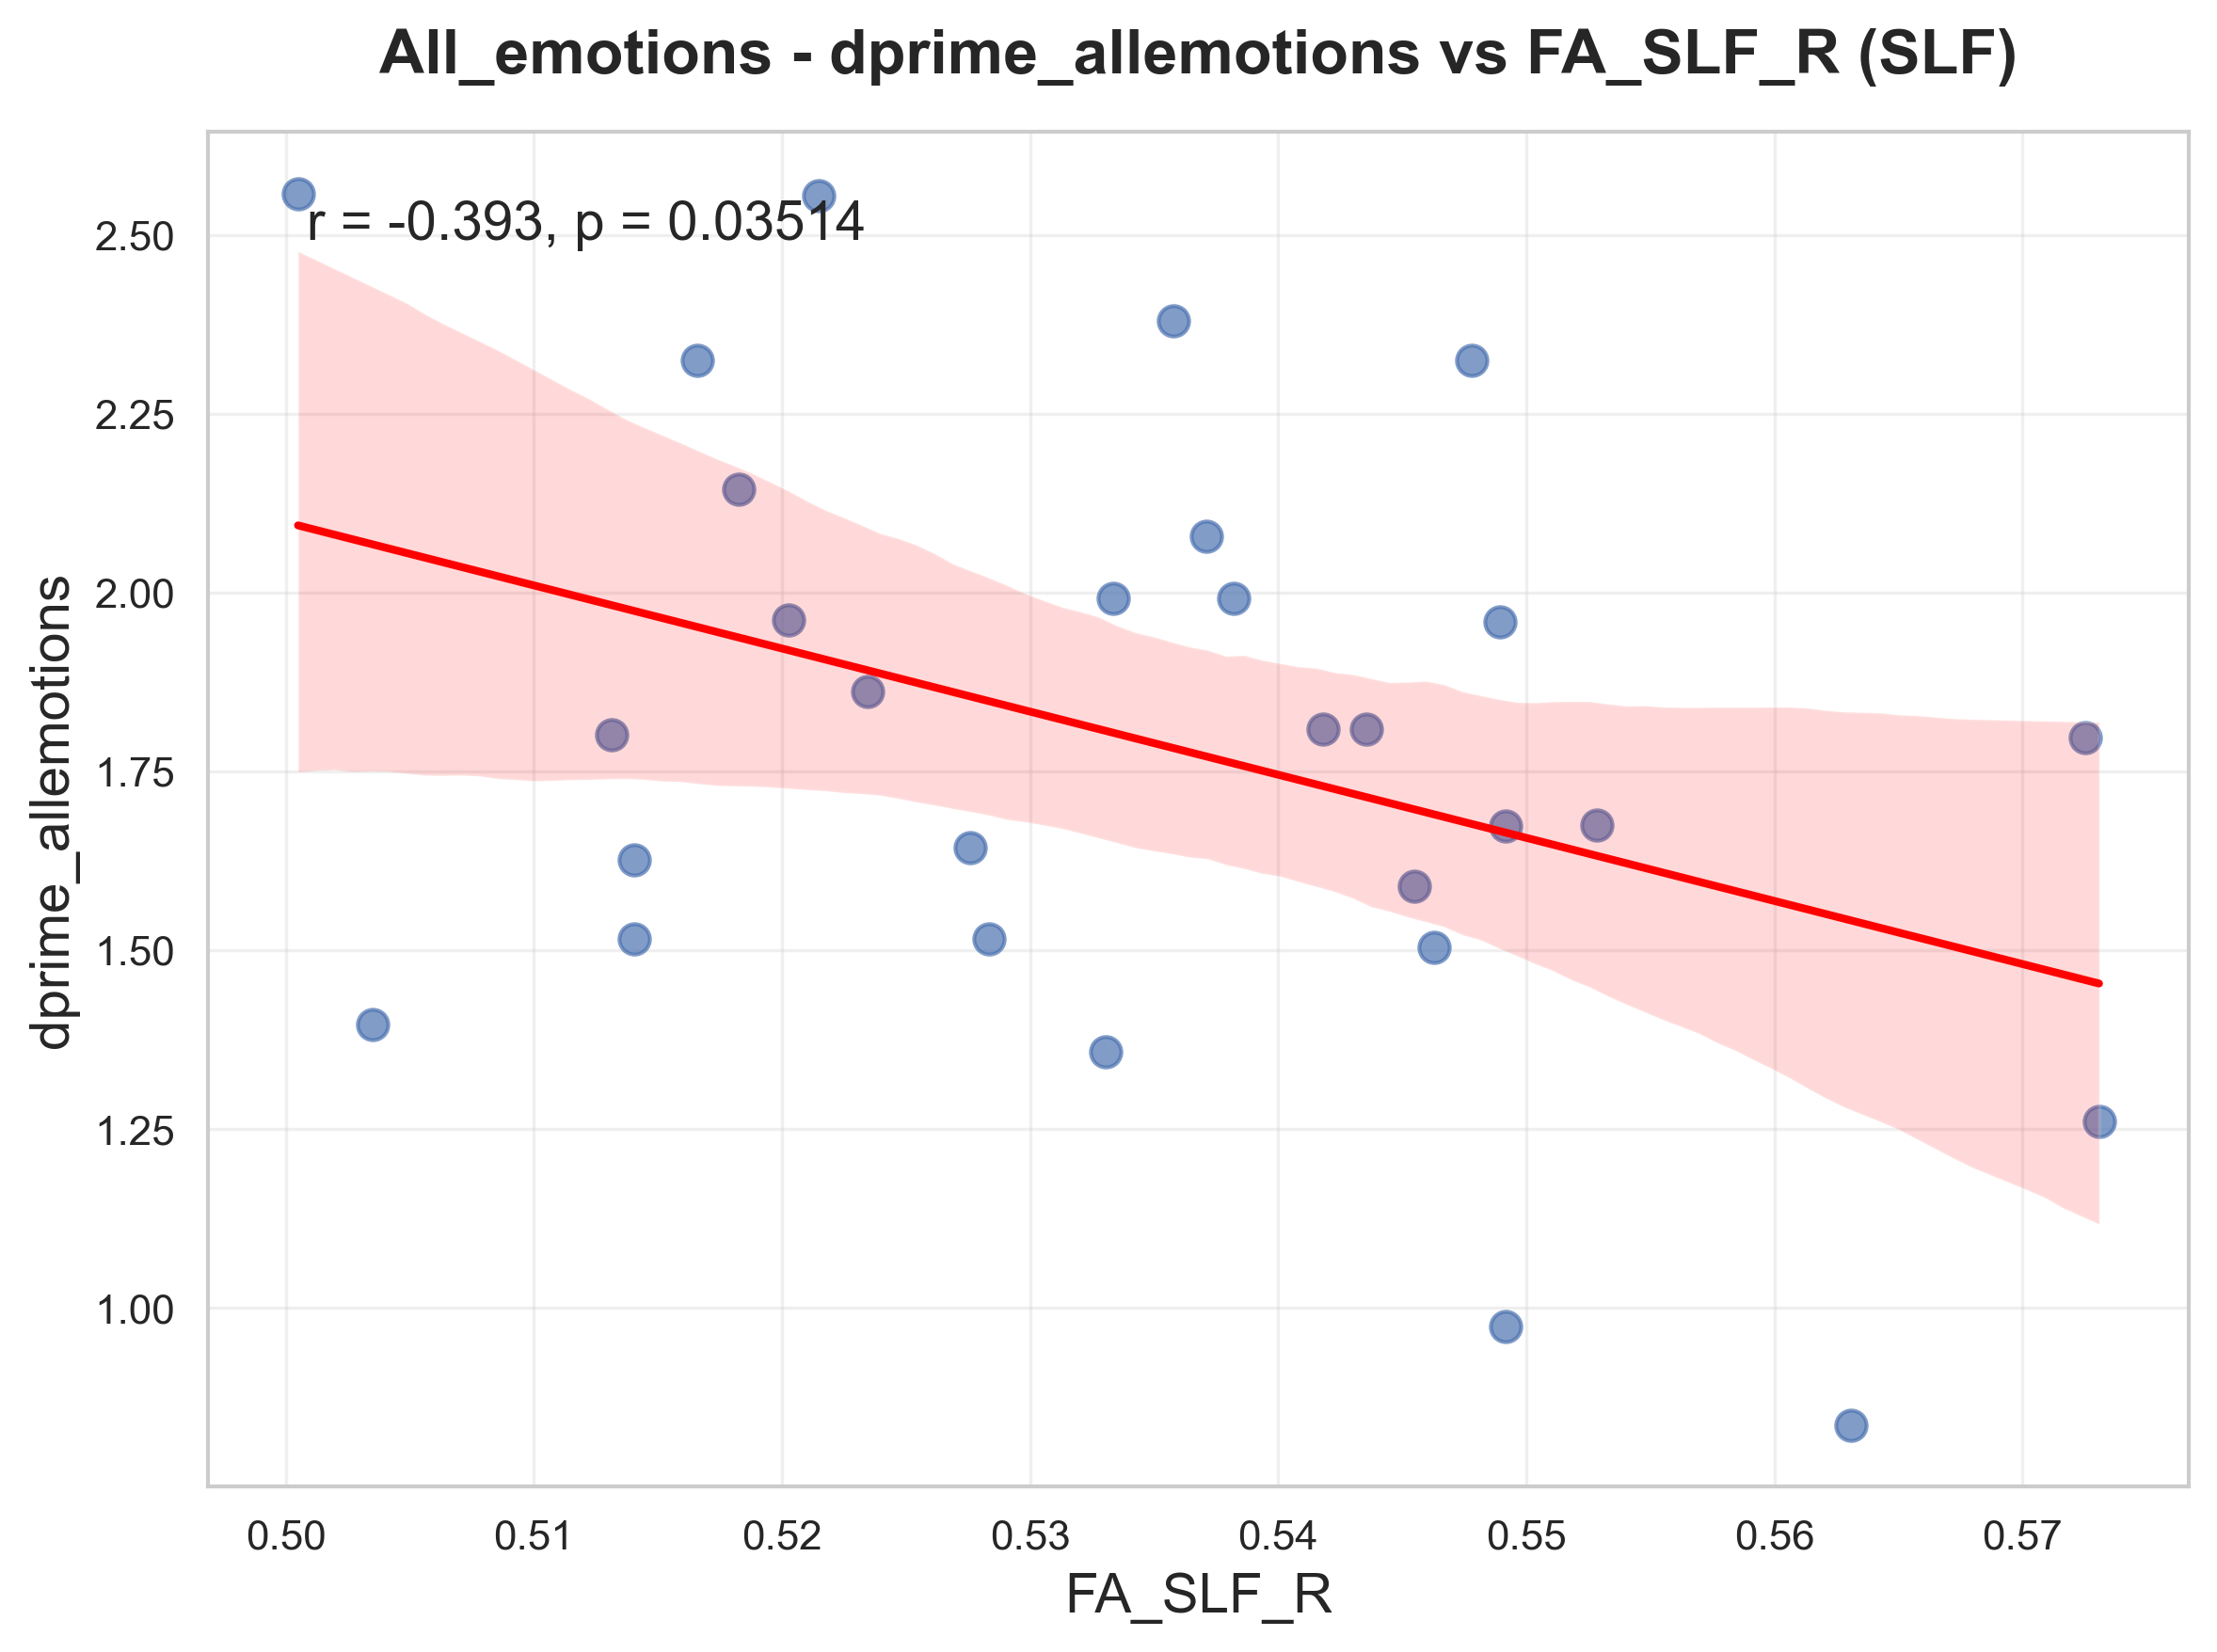

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global publication-ready formatting before the loop
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.linewidth': 1.5,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.frameon': False
})
sns.set_context("paper", font_scale=1.2)
sns.set_style("whitegrid")

# Iterate through each metacognitive measure DataFrame
for measure_name, meta_df in metacog_dfs.items():
    merged_df = pd.merge(meta_df, dti_df, on='ID')
    
    if 'allemotions' in measure_name:
        col_name = f"{measure_name.replace('_allemotions', '')}_all"
        emotions = ['All_emotions']
    else:
        col_name = measure_name
        emotions = merged_df['Emotion'].unique()
    
    for emotion in emotions:
        emotion_df = merged_df if emotion == 'All_emotions' else merged_df[merged_df['Emotion'] == emotion]
        
        if col_name not in emotion_df.columns:
            print(f"⚠️ Warning: {col_name} not found in emotion_df! Available columns: {emotion_df.columns}")
            continue
        
        for tract, cols in tractdict.items():
            for col in cols:
                r, p = stats.pearsonr(emotion_df[col_name], emotion_df[col])
                
                results.append({
                    'Measure': measure_name,
                    'Emotion': emotion,
                    'DTI Metric': col,
                    'Tract': tract,
                    'Correlation Coefficient': r,
                    'p-value': p
                })
                
                # Plot significant correlations
                if p < 0.05:
                    # Create a simple scatter plot with regression line for significant correlations
                    plt.figure(figsize=(8, 6), dpi=300)
                    
                    sns.regplot(
                        x=emotion_df[col], 
                        y=emotion_df[col_name], 
                        scatter_kws={'alpha': 0.7, 's': 60}, 
                        line_kws={'color': 'red', 'lw': 2}
                    )
                    
                    # Add title and labels with publication-ready formatting
                    plt.title(f'{emotion} - {measure_name} vs {col} ({tract})', fontsize=16, fontweight='bold', pad=15)
                    plt.xlabel(f'{col}', fontsize=14)
                    plt.ylabel(f'{measure_name}', fontsize=14)
                    
                    # Add correlation information as text on the plot
                    plt.annotate(f'r = {r:.3f}, p = {p:.5f}', 
                                 xy=(0.05, 0.95), xycoords='axes fraction',
                                 fontsize=14, ha='left', va='top')
                    
                    # Add grid and horizontal reference line at y=0
                    #plt.axhline(0, color='black', linestyle='--', linewidth=1)
                    plt.grid(alpha=0.3)
                    
                    # Save the plot as PNG and PDF for publication
                    filename_base = f"{emotion}_{measure_name}_{col}_{tract}"
                    plt.tight_layout()
                    plt.savefig(os.path.join(path_paper_results, f"{filename_base}.png"), dpi=300, format="tiff", bbox_inches="tight")
                                        
                    # Show the plot
                    plt.show()
